# Importar as bibliotecas necessárias

In [1]:
#import matplotlib as mpl
# import seaborn as sns
import datetime
# import sklearn
# from sklearn.impute import SimpleImputer
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.decomposition import KernelPCA
import numpy as np
import pandas as pd
# import math
# import keras
import matplotlib.pyplot as plt
import tensorflow as tf
# import seaborn as sns
import json
# Time library to know how much time things take
import time
import random

2025-04-14 20:42:01.237950: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Configurar execução

In [2]:
run_start = time.time()
# run date isoformat
run_date = datetime.datetime.now()
print(run_date.isoformat())
print(run_date.strftime("%Y-%m-%d %H:%M:%S.%f"))

2025-04-14T20:42:05.686796
2025-04-14 20:42:05.686796


In [3]:
NUMBER_OF_SUB_EXPERIMENT = 8
MODEL_TO_USE = 2

# COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - Spread %']
COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - Spread %']
COLUMN_TO_PREDICT = 'IBOVESPA - Close'

# Dataframe constants
# Train, val and test split
START_ON_FIRST_VALID_DATE = True
START_DATE = None # '1995-01-02' # None
END_DATE = None # '2016-04-22' # None
TYPE_OF_UNIT = 'customDays'
# csv have 7993 data rows
TRAINING_SIZE = '1994-01-03'
VALIDATION_SIZE = '2023-10-01'
TESTING_SIZE = '2024-10-01'
FILE = 'data/2 - processed/normalized_data.csv'

# Keras config constants
BATCH_SIZE = 32
MAX_EPOCHS = 500
LEARNING_RATE = 0.01
LEARNING_DECAY = 0.9
DECAY_STEPS = 1000
PATIENCE = 10
# DECAY_EVERY_EPOCHS = 2
NUM_FEATURES = 10 # None # 100
RANDOM_SEED = 453
INPUT_WINDOW_SIZE = 4
OUTPUT_WINDOW_SIZE = 1
# Model constantsNUM_FEATURE
LOSS_FUNCTION = 'MAE'
MISMATCH_PENALITY = 2

# Save data constants
RUN_MOMENT = "2025-04-14 20:41:58"
SAVE_FILE_PATH = 'results/experiment_1'

# Comment to help Orquestrator to find the variables

In [4]:
# # define columns to use and columns to predict
# if NUMBER_OF_SUB_EXPERIMENT == 1:
#     COLUMNS_TO_USE = ['IBOVESPA - Close']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 2:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Spread']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 3:'DXY - Close', 'Gold - Close', 'Brent Crude Oil - Close'
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 5:
#     COLUMNS_TO_USE = ['IBOVESPA - Close %', 'IBOVESPA - Spread %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 6:
#     COLUMNS_TO_USE = ['IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 7:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 8:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - Spread %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 9:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'

In [5]:
MODEL_NAME = ''
if MODEL_TO_USE == 1:
    MODEL_NAME = 'Model_1'
elif MODEL_TO_USE == 2:
    MODEL_NAME = 'Model_2'
elif MODEL_TO_USE == 3:
    MODEL_NAME = 'Model_3'
else:
    # throw error
    raise ValueError("MODEL_TO_USE must be 1, 2 or 3")

In [6]:
# Config fix seed
tf.random.set_seed(RANDOM_SEED)
random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)

In [7]:
save_file_name = f"{RUN_MOMENT}-s{NUMBER_OF_SUB_EXPERIMENT}-m{MODEL_TO_USE}"

In [8]:
# load normalized data from /data/2 - processed/normalized_data.csv
imported_df = pd.read_csv(FILE, index_col=0)

In [9]:
df_x_values = imported_df.copy()
# order on index
df_x_values = df_x_values.sort_index(ascending=True)
# turn index into column
df_x_values.reset_index(inplace=True)
# remove the first column (index)
df_x_values.drop(columns=['index'], inplace=True)
df_x_values.head()

,IBOVESPA - Close,IBOVESPA - High,IBOVESPA - Low,IBOVESPA - Open,Dólar - Close,Dólar - High,Dólar - Low,Dólar - Open,Dow Jones - Close,Dow Jones - High,...,IBOVESPA - Spread %,Kospi - Spread %,Minério de Ferro - Spread %,Nasdaq - Spread %,Nikkei - Spread %,Petróleo Brent - Spread %,Petróleo WTI - Spread %,S&P 500 - Spread %,STOXX 600 - Spread %,Shanghai SE - Spread %
0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.003941,0.003148,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0
1,0.000150,0.000150,0.000049,0.000034,0.0,0.0,0.0,0.0,0.004600,0.003605,...,0.036606,0.0,0.0,0.029525,0.000000,0.0,0.0,0.084905,0.0,0.0
2,0.000299,0.000406,0.000200,0.000183,0.0,0.0,0.0,0.0,0.004961,0.003965,...,0.020442,0.0,0.0,0.119266,0.201590,0.0,0.0,0.065165,0.0,0.0
3,0.000468,0.000484,0.000350,0.000333,0.0,0.0,0.0,0.0,0.005083,0.004311,...,0.008583,0.0,0.0,0.056198,0.049836,0.0,0.0,0.095393,0.0,0.0
4,0.000703,0.000704,0.000519,0.000502,0.0,0.0,0.0,0.0,0.005490,0.004630,...,0.015204,0.0,0.0,0.182793,0.129181,0.0,0.0,0.162195,0.0,0.0


Verificar correlação dos dados

In [10]:
corr = df_x_values.corr()[COLUMN_TO_PREDICT]
corr = corr.sort_values()
print(corr.to_string())

Meta Selic                    -0.258086
IPCA                          -0.183215
INPC                          -0.181477
Taxa acumulada no período     -0.181264
IBOVESPA - High %             -0.028419
IBOVESPA - Low %              -0.025172
IBOVESPA - Close %            -0.023741
IBOVESPA - Open %             -0.023504
HanSeng Index - Spread %      -0.015235
IBOVESPA - Spread %           -0.014234
Dow Jones - Spread %          -0.011542
S&P 500 - Spread %            -0.011357
Nasdaq - Spread %             -0.009685
Nikkei - Spread %             -0.003974
FTSE 100 - Spread %           -0.003755
Minério de Ferro - Spread %    0.000635
HanSeng Index - Open %         0.002705
HanSeng Index - Low %          0.002773
HanSeng Index - Close %        0.002917
HanSeng Index - High %         0.003144
DAX - Spread %                 0.004029
CAC 40 - Spread %              0.004522
Dow Jones - Open %             0.004659
CAC 40 - Open %                0.004786
Dow Jones - Low %              0.004847


In [11]:
corr.index

Index(['Meta Selic', 'IPCA', 'INPC', 'Taxa acumulada no período',
       'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Close %',
       'IBOVESPA - Open %', 'HanSeng Index - Spread %', 'IBOVESPA - Spread %',
       ...
       'Kospi - High', 'ASX 200 - Open', 'ASX 200 - Low', 'ASX 200 - Close',
       'ASX 200 - High', 'PIB', 'IBOVESPA - Open', 'IBOVESPA - High',
       'IBOVESPA - Low', 'IBOVESPA - Close'],
      dtype='object', length=200)

In [12]:
df_x_values = df_x_values[COLUMNS_TO_USE]

array([<Axes: >, <Axes: >, <Axes: >], dtype=object)

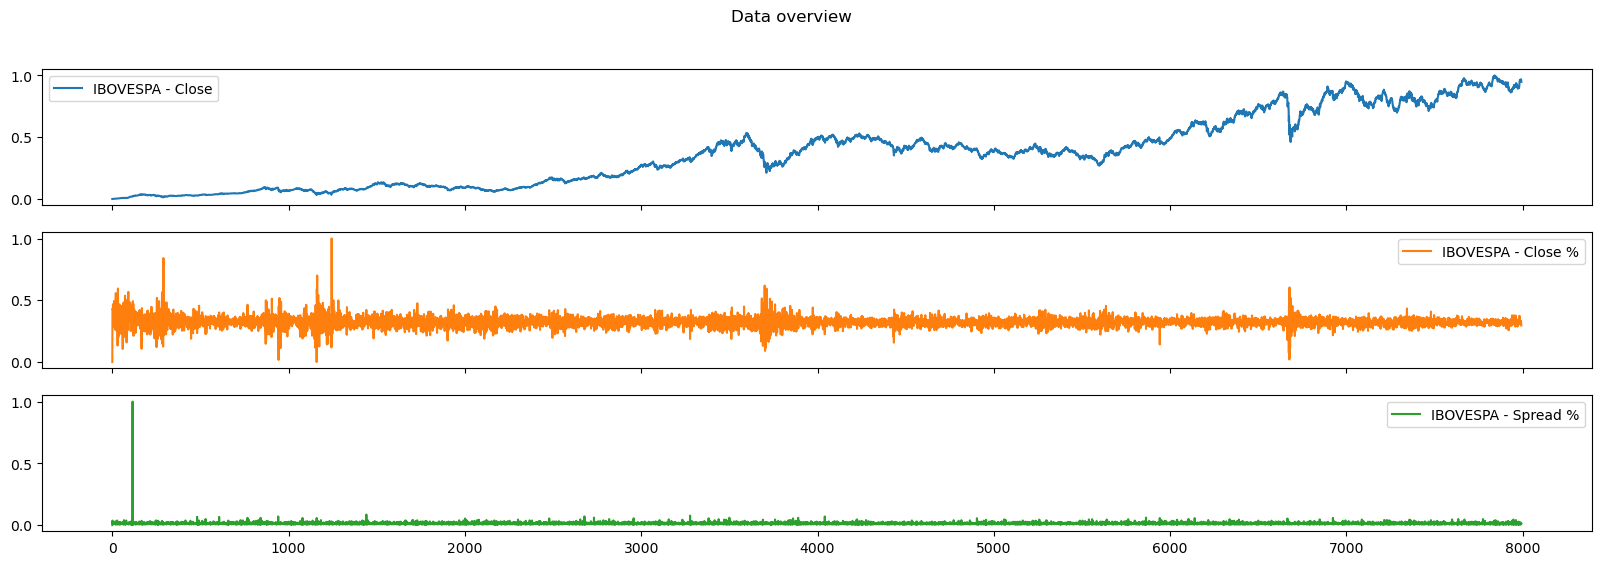

In [13]:
df_x_values.plot(subplots=True, figsize=(20, 2*len(df_x_values.columns)), title="Data overview") 

array([<Axes: >, <Axes: >, <Axes: >], dtype=object)

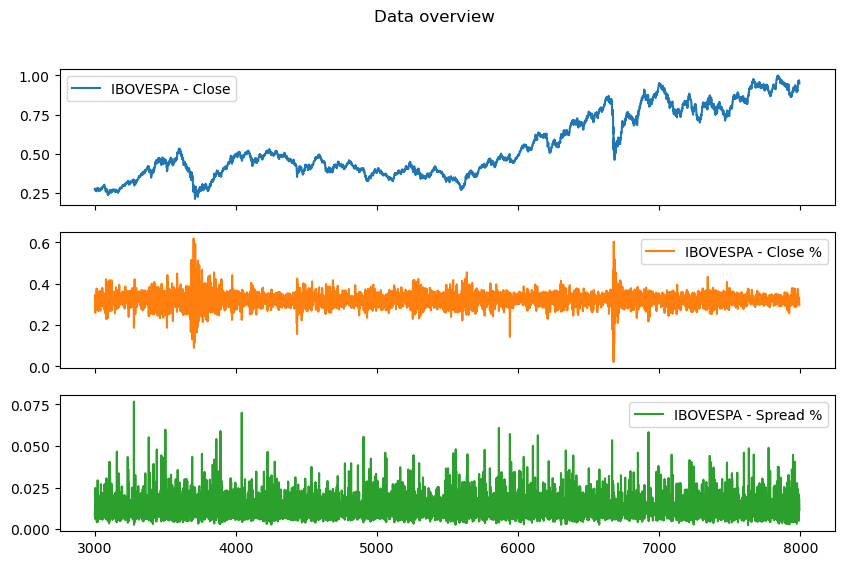

In [14]:
df_x_values[3000:].plot(subplots=True, figsize=(10, 2*len(df_x_values.columns)), title="Data overview") 

In [15]:
imported_df_cpy = imported_df.copy()
# remove the first column (index)
imported_df_cpy.reset_index(inplace=True)
# find date (index) of the 3050th row
print(imported_df_cpy.loc[3700, 'index'])
print(imported_df_cpy.loc[4860, 'index'])

2008-10-13
2013-03-27


Dividir os dados em treino e teste

In [16]:
valid_indexes = pd.read_csv('data/2 - processed/valid_indexes.csv', index_col=0)
valid_indexes.head()
# find the first valid date for each column
# the index is the column name and the value is the value in "First Valid Index" column
valid_indexes_dict = valid_indexes.to_dict()['First Valid Index']
valid_indexes_dict

{'IBOVESPA - Close': '1994-01-03',
 'IBOVESPA - High': '1994-01-03',
 'IBOVESPA - Low': '1994-01-03',
 'IBOVESPA - Open': '1994-01-03',
 'Dólar - Close': '2003-12-01',
 'Dólar - High': '2003-12-01',
 'Dólar - Low': '2003-12-01',
 'Dólar - Open': '2003-12-01',
 'Dow Jones - Close': '1994-01-03',
 'Dow Jones - High': '1994-01-03',
 'Dow Jones - Low': '1994-01-03',
 'Dow Jones - Open': '1994-01-03',
 'S&P 500 - Close': '1994-01-03',
 'S&P 500 - High': '1994-01-03',
 'S&P 500 - Low': '1994-01-03',
 'S&P 500 - Open': '1994-01-03',
 'Nasdaq - Close': '1994-01-03',
 'Nasdaq - High': '1994-01-03',
 'Nasdaq - Low': '1994-01-03',
 'Nasdaq - Open': '1994-01-03',
 'Shanghai SE - Close': '1997-07-02',
 'Shanghai SE - High': '1997-07-02',
 'Shanghai SE - Low': '1997-07-02',
 'Shanghai SE - Open': '1997-07-02',
 'Nikkei - Close': '1994-01-04',
 'Nikkei - High': '1994-01-04',
 'Nikkei - Low': '1994-01-04',
 'Nikkei - Open': '1994-01-04',
 'HanSeng Index - Close': '1994-01-03',
 'HanSeng Index - High':

In [17]:
if START_ON_FIRST_VALID_DATE:
    # get valid indexes 
    valid_indexes = pd.read_csv('data/2 - processed/valid_indexes.csv', index_col=0)
    valid_indexes_dict = valid_indexes.to_dict()['First Valid Index']
    valid_indexes_dict
    biggest_valid_index = min(valid_indexes_dict.values())
    for col in df_x_values.columns:
        # get the first valid index for each column
        first_valid_index = valid_indexes_dict[col]
        # check if the first valid index is greater than the biggest valid index
        if first_valid_index > biggest_valid_index:
            biggest_valid_index = first_valid_index
    # filter the dataframe to start on the first valid index, first finding the numeric index searching imported_df
    imported_df_cp = imported_df.copy()
    # reset the index
    imported_df_cp.reset_index(inplace=True)
    # find the first valid index
    first_valid_index = imported_df_cp[imported_df_cp['index'] == biggest_valid_index].index[0]
    print(f"First valid index: {first_valid_index}")

if START_DATE is not None:
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # find the index of the START_DATE
    start_index = imported_df_cp[imported_df_cp['index'] == START_DATE].index[0]

if END_DATE is not None:
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # find the index of the END_DATE
    end_index = imported_df_cp[imported_df_cp['index'] == END_DATE].index[0]

# crop the dataframe to start on the first valid index
if START_ON_FIRST_VALID_DATE and START_DATE is not None:
    if first_valid_index > start_index:
        # crop the dataframe to start on the first valid index
        df_x_values = df_x_values[first_valid_index:]
    else:
        # crop the dataframe to start on the START_DATE
        df_x_values = df_x_values[start_index:]
elif START_ON_FIRST_VALID_DATE:
    # crop the dataframe to start on the first valid index
    df_x_values = df_x_values[first_valid_index:]
elif START_DATE is not None:
    # crop the dataframe to start on the START_DATE
    df_x_values = df_x_values[start_index:]

# crop the dataframe to end on the END_DATE
if END_DATE is not None:
    # crop the dataframe to end on the END_DATE
    df_x_values = df_x_values[:end_index]
    # crop imported_df_cp to end on the END_DATE
    imported_df_cp = imported_df_cp[:end_index]

# calculate de size of training, validation and testing data
if TYPE_OF_UNIT == "percentual":
    train_size = int(len(df_x_values) * TRAINING_SIZE)
    validation_size = int(len(df_x_values) * VALIDATION_SIZE)
    test_size = int(len(df_x_values) * TESTING_SIZE)
elif TYPE_OF_UNIT == "days":
    train_size = TRAINING_SIZE
    validation_size = VALIDATION_SIZE
    test_size = TESTING_SIZE
elif TYPE_OF_UNIT == "weeks":
    train_size = TRAINING_SIZE * 7
    validation_size = VALIDATION_SIZE * 7
    test_size = TESTING_SIZE * 7
elif TYPE_OF_UNIT == "months":
    train_size = TRAINING_SIZE * 30
    validation_size = VALIDATION_SIZE * 30
    test_size = TESTING_SIZE * 30
elif TYPE_OF_UNIT == "customDays":
    # if iported_df_cp is not defined, define it
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # if TRAINING_SIZE is not in imported_df_cp, find the next closest date
    if TRAINING_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > TRAINING_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Training date not found. Closest date to {TRAINING_SIZE} is {closest_date}")
        # set TRAINING_SIZE to the closest date
        TRAINING_SIZE = closest_date
    # if VALIDATION_SIZE is not in imported_df_cp, find the next closest date
    if VALIDATION_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > VALIDATION_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Validation date not found. Closest date to {VALIDATION_SIZE} is {closest_date}")
        # set VALIDATION_SIZE to the closest date
        VALIDATION_SIZE = closest_date
    # if TESTING_SIZE is not in imported_df_cp, find the next closest date
    if TESTING_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > TESTING_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Testing date not found. Closest date to {TESTING_SIZE} is {closest_date}")
        # set TESTING_SIZE to the closest date
        TESTING_SIZE = closest_date
    
    # if VALIDATION_SIZE is not in imported_df_cp, throw error
    # get the index of TRAINING_SIZE date
    train_index = imported_df_cp[imported_df_cp['index'] == TRAINING_SIZE].index[0]
    # get the index of VALIDATION_SIZE date
    validation_index = imported_df_cp[imported_df_cp['index'] == VALIDATION_SIZE].index[0]
    # get the index of TESTING_SIZE date
    test_index = imported_df_cp[imported_df_cp['index'] == TESTING_SIZE].index[0] 
    # throw error if some of the indexes is not valid
    if train_index < 0 or validation_index < 0 or test_index < 0:
        raise ValueError("Some of the indexes are not valid.")
    # thow error if the indexes are not in the same order
    if train_index > validation_index or validation_index > test_index:
        raise ValueError("The indexes are not in the same order.")
    # calculate the size of the training, validation and testing data
    train_size = len(imported_df_cp[train_index:validation_index])
    validation_size = len(imported_df_cp[validation_index:test_index])
    test_size = len(imported_df_cp[test_index:])
else:
    raise ValueError("Invalid type_of_unit. Must be 'days', 'weeks', 'months' or 'percentual'.")

if START_ON_FIRST_VALID_DATE:
    # if train_size+validation_size+test_size is greater than the size of the dataframe, adjust train_size
    # to be the size of the dataframe minus validation_size and test_size
    if train_size + validation_size + test_size > len(df_x_values):
        # adjust train_size to be the size of the dataframe minus validation_size and test_size
        train_size = len(df_x_values) - validation_size - test_size
        print(f"Adjusted train size: {train_size}")
    # check if train_size is less than 0
    if train_size < 0:
        raise ValueError("Train size is less than 0. Please check the sizes of the data.")

# check if sum of sizes is less than the size of the dataframe
if train_size + validation_size + test_size > len(df_x_values):
    raise ValueError("Sum of train, validate and test sizes is greater than the size of the dataframe.")

# create the train, validation and test dataframes
train_df = df_x_values[-(train_size + test_size + validation_size):-(test_size + validation_size)]
val_df = df_x_values[-(test_size + validation_size):-test_size]
test_df = df_x_values[-(test_size):]

# check the size of the data
print(f"Training data size: {len(train_df)}")
print(f"Validating data size: {len(val_df)}")
print(f"Testing data size: {len(test_df)}")


First valid index: 1
Validation date not found. Closest date to 2023-10-01 is 2023-10-02
Adjusted train size: 7602
Training data size: 7602
Validating data size: 261
Testing data size: 129


array([<Axes: >, <Axes: >, <Axes: >], dtype=object)

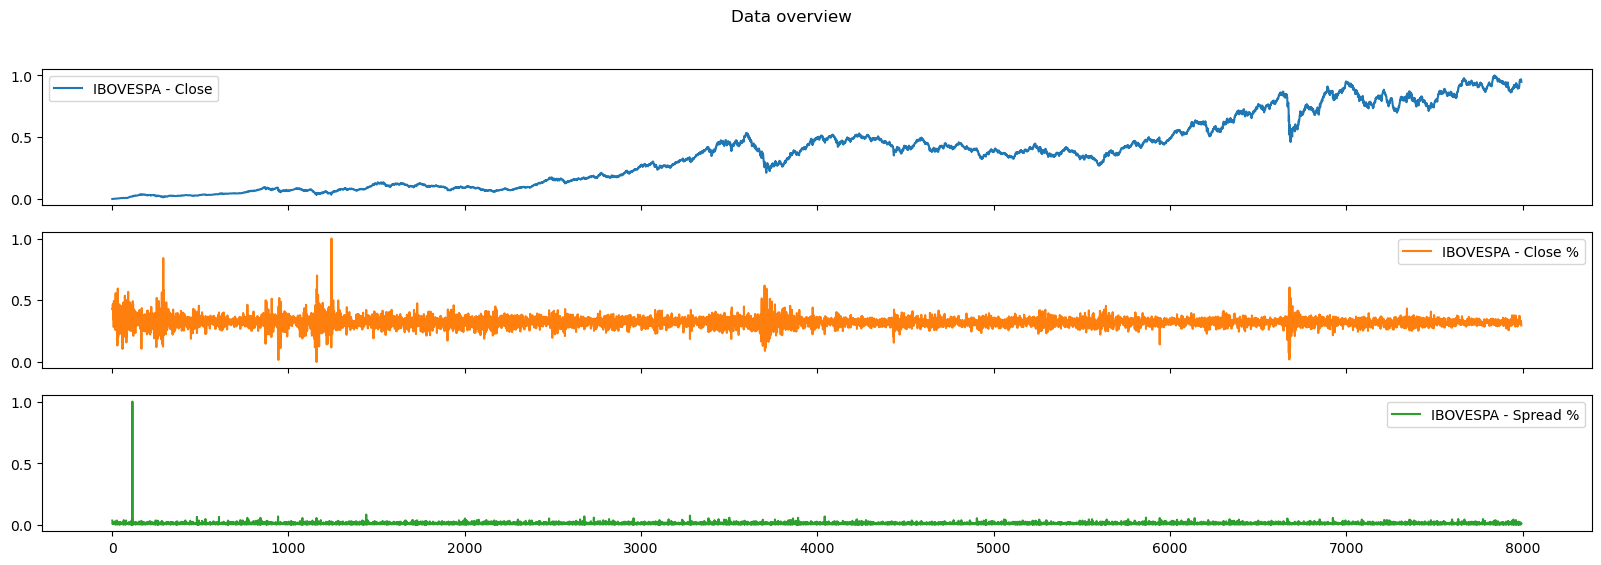

In [18]:
df_x_values.plot(subplots=True, figsize=(20, 2*len(df_x_values.columns)), title="Data overview") 

In [19]:
len(train_df), len(val_df), len(test_df), len(df_x_values)

(7602, 261, 129, 7992)

Criar a classe/função geradora das janelas

In [20]:
class WindowGenerator():
  def __init__(self, INPUT_WINDOW_SIZE, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.INPUT_WINDOW_SIZE = INPUT_WINDOW_SIZE
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = INPUT_WINDOW_SIZE + shift

    self.input_slice = slice(0, INPUT_WINDOW_SIZE)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])
  
  def split_window(self, features):
    inputs = features[:, self.input_slice, :]
    labels = features[:, self.labels_slice, :]
    if self.label_columns is not None:
      labels = tf.stack(
          [labels[:, :, self.column_indices[name]] for name in self.label_columns],
          axis=-1)

    # Slicing doesn't preserve static shape information, so set the shapes
    # manually. This way the `tf.data.Datasets` are easier to inspect.
    inputs.set_shape([None, self.INPUT_WINDOW_SIZE, None])
    labels.set_shape([None, self.label_width, None])

    return inputs, labels

  def plot(self, model=None, plot_col='IBOVESPA - Close', max_subplots=3):
    inputs, labels = self.example
    plt.figure(figsize=(12, 8))
    plot_col_index = self.column_indices[plot_col]
    max_n = min(max_subplots, len(inputs))
    for i in range(max_n):
      n = i#random.randint(0, len(inputs)-1)
      plt.subplot(max_n, 1, i+1)
      plt.ylabel(f'{plot_col} ({n}) [normed]')
      plt.plot(self.input_indices, inputs[n, :, plot_col_index],
              label='Inputs', marker='.', zorder=-10)

      if self.label_columns:
        label_col_index = self.label_columns_indices.get(plot_col, None)
      else:
        label_col_index = plot_col_index

      if label_col_index is None:
        continue

      plt.scatter(self.label_indices, labels[n, :, label_col_index],
                  edgecolors='k', label='Labels', c='#2ca02c', s=64)
      if model is not None:
        predictions = model(inputs)
        plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                    marker='X', edgecolors='k', label='Predictions',
                    c='#ff7f0e', s=64)

      if n == 0:
        plt.legend()

    plt.xlabel('Time [day]')

  def make_dataset(self, data):
    data = np.array(data, dtype=np.float32)
    ds = tf.keras.utils.timeseries_dataset_from_array(
        data=data,
        targets=None,
        sequence_length=self.total_window_size,
        sequence_stride=1,
        shuffle=False,
        # shuffle=True,
        seed=RANDOM_SEED,
        batch_size=BATCH_SIZE,)

    ds = ds.map(self.split_window)

    return ds

  @property
  def train(self):
    return self.make_dataset(self.train_df)

  @property
  def val(self):
    return self.make_dataset(self.val_df)

  @property
  def test(self):
    return self.make_dataset(self.test_df)
  
  @property
  def example(self):
    """Get and cache an example batch of `inputs, labels` for plotting."""
    result = getattr(self, '_example', None)
    if result is None:
      # No example batch was found, so get one from the `.train` dataset
      result = next(iter(self.test))
      # And cache it for next time
      self._example = result
    return result

Criar função de erro customizado, aumentando o peso de previsões na direção incorreta

In [21]:
import keras.backend as K
import tensorflow as tf

def custom_loss(y_true, y_pred):
    threshold = 0.5955062488  # Define the threshold

    # Calculate the error between the true and predicted values
    error = y_true - y_pred
    
    # Determine the direction (increase or decrease) for both true and predicted values
    true_direction = tf.cast(tf.greater(y_true, threshold), tf.float32)  # 1 if true value is above threshold (increase), 0 if below (decrease)
    pred_direction = tf.cast(tf.greater(y_pred, threshold), tf.float32)  # 1 if predicted value is above threshold (increase), 0 if below (decrease)
    
    # Check for mismatches: wrong direction between true and predicted
    direction_mismatch = tf.abs(true_direction - pred_direction)  # 1 if directions mismatch, 0 if they match
    
    # Calculate the weighted error: apply a higher penalty when directions mismatch
    loss = tf.square(error) * (1 + MISMATCH_PENALITY * direction_mismatch)  # 5x penalty for mismatch, adjust factor as needed
    
    # Return the mean of the loss over all samples
    return tf.reduce_mean(loss)


Total window size: 5
Input indices: [0 1 2 3]
Label indices: [4]
Label column name(s): ['IBOVESPA - Close']

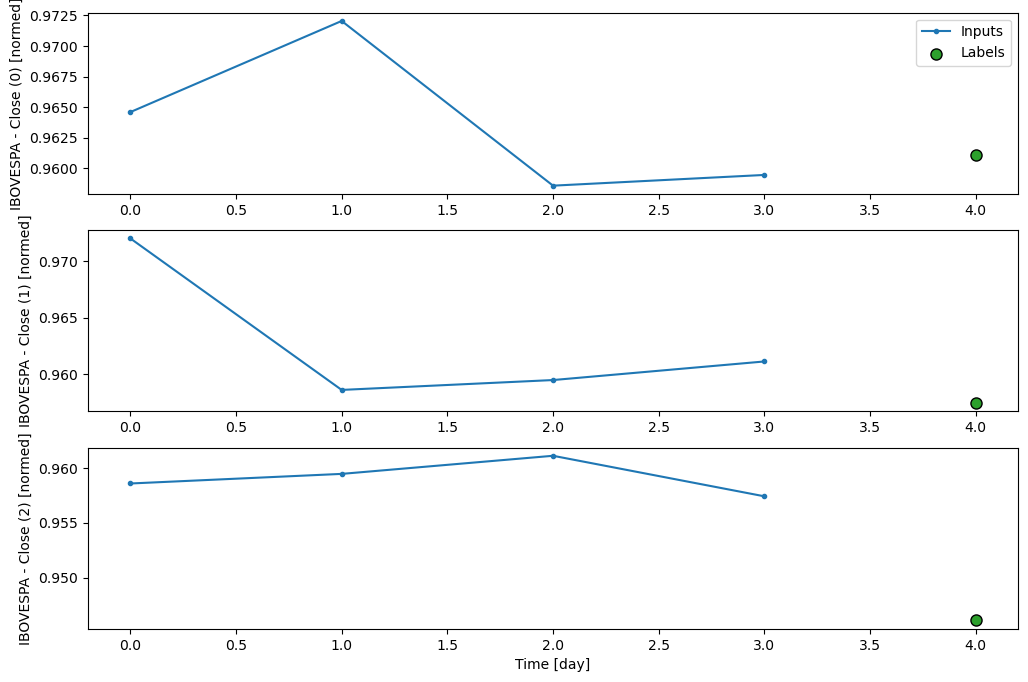

In [22]:
multi_window = WindowGenerator(INPUT_WINDOW_SIZE=INPUT_WINDOW_SIZE,
                               label_width=OUTPUT_WINDOW_SIZE,
                               shift=OUTPUT_WINDOW_SIZE, label_columns=[COLUMN_TO_PREDICT])

multi_window.plot(plot_col=COLUMN_TO_PREDICT)
multi_window

Criação da função de treino da rede

In [23]:
def compile_and_fit(model, window, PATIENCE=2, MAX_EPOCHS=150, LEARNING_RATE=0.00001):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=PATIENCE,
                                                    mode='min')
  
  # optimizer using learning rate schedule 
  lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=LEARNING_RATE,
    decay_steps=DECAY_STEPS,
    decay_rate=LEARNING_DECAY)

  # config optimizer
  optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
  
  # callback to print the learning rate and add it to the history
  class PrintLR(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
      lr = float(tf.keras.backend.get_value(self.model.optimizer.learning_rate))
      # print(f'Learning rate at epoch {epoch + 1}: {lr:.6f}')
      # add the learning rate to the history
      logs['lr'] = lr
  printlr = PrintLR()
  
  # config loss function
  if LOSS_FUNCTION == 'MAE':
    loss_function = tf.keras.losses.MeanAbsoluteError()
  elif LOSS_FUNCTION == 'MSE':
    loss_function = tf.keras.losses.MeanSquaredError()
  # elif LOSS_FUNCTION == 'CUSTOM':
  #   loss_function = custom_loss

  # model.compile(loss=tf.keras.losses.MeanAbsoluteError(),
  # model.compile(loss=tf.keras.losses.MeanSquaredError(),
  # model.compile(loss=custom_loss,
  model.compile(
                loss=loss_function,
                optimizer=optimizer,
                metrics=[
                  tf.keras.metrics.MeanAbsoluteError(),
                  tf.keras.metrics.MeanSquaredError(),
                  tf.keras.metrics.MeanAbsolutePercentageError(),
                  tf.keras.metrics.RootMeanSquaredError(),
                  # tf.keras.metrics.R2Score()
                  ]
              )

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[printlr, early_stopping])
  return history

Definir modelo da rede e realizar o treinamento

In [24]:
multi_window.train

<_MapDataset element_spec=(TensorSpec(shape=(None, 4, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 1, 1), dtype=tf.float32, name=None))>

# Definir modelos

In [25]:
num_features = df_x_values.shape[1]

num_features

3

In [26]:
def get_model():
    if NUM_FEATURES is not None:
        num_features = NUM_FEATURES
    else:
        num_features = df_x_values.shape[1]
    
    if MODEL_TO_USE == 1:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(50, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model
    
    elif MODEL_TO_USE == 2:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(50, return_sequences=True), 
                    tf.keras.layers.LSTM(50, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model
    
    elif MODEL_TO_USE == 3:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(100, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model

Calculate metrics

In [27]:
# create dataframe for "hard" predictions
def create_df_repeat_prediction(data):        
    # predictions = data[COLUMN_TO_PREDICT].values[:-1]
    # labels = data[COLUMN_TO_PREDICT].values[1:]
    predictions, labels = None, None
    for part in iter(data):
        # print(part)
        if predictions is None:
            labels = part[1]
        else:
            labels = np.concatenate((labels, part[1]), axis=0)
    labels = labels[:, :, 0]
    # convert labels to 1D array
    # print(labels.shape)
    # print(labels)
    predictions = labels
    for i, label in enumerate(labels[:-1]):
        # if i == 3:
        #     break
        for j in range(len(label)):
            # replace values of predictions[i] with the first value of label
            predictions = tf.tensor_scatter_nd_update(
                predictions, 
                [[i, j]], 
                [label[0]]
            )
        # print(f"Label {i}: {label}")
        # print(f"Prediction {i}: {predictions[i]}")
    predictions = predictions[:-1]    
    labels = labels[1:]
    return {"predictions": predictions, "labels": labels}
    predictions_df = pd.DataFrame({"predictions": predictions, "labels": labels})
    predictions_df = predictions_df.dropna()
    return predictions_df

In [28]:
def make_repeat_predictions_metrics(data):
    predictions = create_df_repeat_prediction(data)
    mae = tf.keras.metrics.MeanAbsoluteError()
    mae.update_state(predictions["labels"], predictions["predictions"])
    mse = tf.keras.metrics.MeanSquaredError()
    mse.update_state(predictions["labels"], predictions["predictions"])
    mape = tf.keras.metrics.MeanAbsolutePercentageError()
    mape.update_state(predictions["labels"], predictions["predictions"])
    rmse = tf.keras.metrics.RootMeanSquaredError()
    rmse.update_state(predictions["labels"], predictions["predictions"])
    print(f"MAE: {mae.result()} - MSE: {mse.result()} - MAPE: {mape.result()} - RMSE: {rmse.result()}")
    return {
            "Loss": None,
            "MAE": float(mae.result()),
            "MSE": float(mse.result()),
            "MAPE": float(mape.result()),
            "RMSE": float(rmse.result()),
        }


In [29]:
def make_model_predictions_metrics(model, data):
    loss, mae, mse, mape, rmse = model.evaluate(data)
    print(f"Loss: {loss} - MAE: {mae} - MSE: {mse} - MAPE: {mape} - RMSE: {rmse}")
    return {
            "Loss": loss,
            "MAE": mae,
            "MSE": mse,
            "MAPE": mape,
            "RMSE": rmse,
        }

Treinar modelos

In [30]:
# record start time
training_start = time.time()

model = get_model()

history = compile_and_fit(model, multi_window, PATIENCE, MAX_EPOCHS, LEARNING_RATE)

# record end time
training_end = time.time()

Epoch 1/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 18:53 5s/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 100.0000 - mean_squared_error: 1.0882e-05 - root_mean_squared_error: 0.0033

  7/238 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 71.6830 - mean_squared_error: 4.6310e-05 - root_mean_squared_error: 0.0065   

 17/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 59.8414 - mean_squared_error: 9.2547e-05 - root_mean_squared_error: 0.0092

 26/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 51.7280 - mean_squared_error: 9.1902e-05 - root_mean_squared_error: 0.0093

 35/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 46.2650 - mean_squared_error: 9.9694e-05 - root_mean_squared_error: 0.0098

 43/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 42.9815 - mean_squared_error: 1.0939e-04 - root_mean_squared_error: 0.0102

 53/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 40.0555 - mean_squared_error: 1.2903e-04 - root_mean_squared_error: 0.0111

 63/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 37.6800 - mean_squared_error: 1.4548e-04 - root_mean_squared_error: 0.0117

 73/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 35.7122 - mean_squared_error: 1.5636e-04 - root_mean_squared_error: 0.0122

 83/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 34.2829 - mean_squared_error: 1.8079e-04 - root_mean_squared_error: 0.0130

 92/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 33.2059 - mean_squared_error: 2.0730e-04 - root_mean_squared_error: 0.0138

101/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 32.2183 - mean_squared_error: 2.3366e-04 - root_mean_squared_error: 0.0146

110/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 31.3373 - mean_squared_error: 2.6984e-04 - root_mean_squared_error: 0.0155

119/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 30.5508 - mean_squared_error: 3.2535e-04 - root_mean_squared_error: 0.0167

127/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 29.9874 - mean_squared_error: 4.2898e-04 - root_mean_squared_error: 0.0184

136/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 29.4784 - mean_squared_error: 6.3603e-04 - root_mean_squared_error: 0.0211

144/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 29.0630 - mean_squared_error: 8.1423e-04 - root_mean_squared_error: 0.0234

152/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 28.6625 - mean_squared_error: 9.7461e-04 - root_mean_squared_error: 0.0255

159/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 28.3232 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0270    

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 27.9486 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0287

175/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 27.5927 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0302

183/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 27.2574 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0315

191/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 26.9439 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0328

198/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0233 - mean_absolute_error: 0.0233 - mean_absolute_percentage_error: 26.6836 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0339

203/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0238 - mean_absolute_error: 0.0238 - mean_absolute_percentage_error: 26.4997 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0346

207/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0242 - mean_absolute_error: 0.0242 - mean_absolute_percentage_error: 26.3530 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0352

213/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0248 - mean_absolute_error: 0.0248 - mean_absolute_percentage_error: 26.1435 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0361

221/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0256 - mean_absolute_error: 0.0256 - mean_absolute_percentage_error: 25.8813 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0374

228/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0264 - mean_absolute_error: 0.0264 - mean_absolute_percentage_error: 25.6617 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0386

233/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0270 - mean_absolute_error: 0.0270 - mean_absolute_percentage_error: 25.5084 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0394

238/238 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - loss: 0.0276 - mean_absolute_error: 0.0276 - mean_absolute_percentage_error: 25.3276 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0403 - val_loss: 0.1977 - val_mean_absolute_error: 0.1977 - val_mean_absolute_percentage_error: 21.2378 - val_mean_squared_error: 0.0406 - val_root_mean_squared_error: 0.2015 - lr: 0.0098


Epoch 2/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 11s 49ms/step - loss: 0.7192 - mean_absolute_error: 0.7192 - mean_absolute_percentage_error: 31008.9023 - mean_squared_error: 0.5173 - root_mean_squared_error: 0.7192

  9/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.6835 - mean_absolute_error: 0.6835 - mean_absolute_percentage_error: 13666.4453 - mean_squared_error: 0.4691 - root_mean_squared_error: 0.6844  

 18/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.6214 - mean_absolute_error: 0.6214 - mean_absolute_percentage_error: 9395.4443 - mean_squared_error: 0.4021 - root_mean_squared_error: 0.6310 

 27/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.5453 - mean_absolute_error: 0.5453 - mean_absolute_percentage_error: 7340.8428 - mean_squared_error: 0.3394 - root_mean_squared_error: 0.5747

 34/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.4971 - mean_absolute_error: 0.4971 - mean_absolute_percentage_error: 6325.9019 - mean_squared_error: 0.3024 - root_mean_squared_error: 0.5386

 41/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.4574 - mean_absolute_error: 0.4574 - mean_absolute_percentage_error: 5583.9785 - mean_squared_error: 0.2732 - root_mean_squared_error: 0.5084

 49/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.4196 - mean_absolute_error: 0.4196 - mean_absolute_percentage_error: 4943.5791 - mean_squared_error: 0.2464 - root_mean_squared_error: 0.4794

 57/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.3880 - mean_absolute_error: 0.3880 - mean_absolute_percentage_error: 4448.1660 - mean_squared_error: 0.2249 - root_mean_squared_error: 0.4550

 65/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.3611 - mean_absolute_error: 0.3611 - mean_absolute_percentage_error: 4052.1399 - mean_squared_error: 0.2072 - root_mean_squared_error: 0.4340

 73/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.3382 - mean_absolute_error: 0.3382 - mean_absolute_percentage_error: 3727.6272 - mean_squared_error: 0.1924 - root_mean_squared_error: 0.4158

 82/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.3162 - mean_absolute_error: 0.3162 - mean_absolute_percentage_error: 3425.3894 - mean_squared_error: 0.1783 - root_mean_squared_error: 0.3979

 91/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2973 - mean_absolute_error: 0.2973 - mean_absolute_percentage_error: 3173.0835 - mean_squared_error: 0.1663 - root_mean_squared_error: 0.3822

100/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2810 - mean_absolute_error: 0.2810 - mean_absolute_percentage_error: 2958.9216 - mean_squared_error: 0.1560 - root_mean_squared_error: 0.3684

109/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2670 - mean_absolute_error: 0.2670 - mean_absolute_percentage_error: 2774.6130 - mean_squared_error: 0.1471 - root_mean_squared_error: 0.3560

117/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2561 - mean_absolute_error: 0.2561 - mean_absolute_percentage_error: 2630.9417 - mean_squared_error: 0.1401 - root_mean_squared_error: 0.3461

122/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2501 - mean_absolute_error: 0.2501 - mean_absolute_percentage_error: 2549.3250 - mean_squared_error: 0.1361 - root_mean_squared_error: 0.3405

127/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2445 - mean_absolute_error: 0.2445 - mean_absolute_percentage_error: 2473.1589 - mean_squared_error: 0.1325 - root_mean_squared_error: 0.3352

135/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2362 - mean_absolute_error: 0.2362 - mean_absolute_percentage_error: 2361.2568 - mean_squared_error: 0.1270 - root_mean_squared_error: 0.3272

145/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2269 - mean_absolute_error: 0.2269 - mean_absolute_percentage_error: 2236.2119 - mean_squared_error: 0.1209 - root_mean_squared_error: 0.3181

154/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2193 - mean_absolute_error: 0.2193 - mean_absolute_percentage_error: 2135.5630 - mean_squared_error: 0.1159 - root_mean_squared_error: 0.3106

164/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2116 - mean_absolute_error: 0.2116 - mean_absolute_percentage_error: 2034.8403 - mean_squared_error: 0.1109 - root_mean_squared_error: 0.3028

173/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2052 - mean_absolute_error: 0.2052 - mean_absolute_percentage_error: 1952.7506 - mean_squared_error: 0.1068 - root_mean_squared_error: 0.2963

182/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1994 - mean_absolute_error: 0.1994 - mean_absolute_percentage_error: 1877.6638 - mean_squared_error: 0.1030 - root_mean_squared_error: 0.2903

186/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1969 - mean_absolute_error: 0.1969 - mean_absolute_percentage_error: 1846.3051 - mean_squared_error: 0.1014 - root_mean_squared_error: 0.2877

190/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1946 - mean_absolute_error: 0.1946 - mean_absolute_percentage_error: 1816.0878 - mean_squared_error: 0.0999 - root_mean_squared_error: 0.2853

197/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1908 - mean_absolute_error: 0.1908 - mean_absolute_percentage_error: 1765.7700 - mean_squared_error: 0.0973 - root_mean_squared_error: 0.2812

204/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1873 - mean_absolute_error: 0.1873 - mean_absolute_percentage_error: 1718.4481 - mean_squared_error: 0.0950 - root_mean_squared_error: 0.2773

213/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1831 - mean_absolute_error: 0.1831 - mean_absolute_percentage_error: 1661.5790 - mean_squared_error: 0.0921 - root_mean_squared_error: 0.2726

221/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1797 - mean_absolute_error: 0.1797 - mean_absolute_percentage_error: 1614.4083 - mean_squared_error: 0.0898 - root_mean_squared_error: 0.2687

226/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1777 - mean_absolute_error: 0.1777 - mean_absolute_percentage_error: 1586.3970 - mean_squared_error: 0.0884 - root_mean_squared_error: 0.2663

233/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1750 - mean_absolute_error: 0.1750 - mean_absolute_percentage_error: 1548.9338 - mean_squared_error: 0.0865 - root_mean_squared_error: 0.2632

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.1728 - mean_absolute_error: 0.1728 - mean_absolute_percentage_error: 1518.3503 - mean_squared_error: 0.0850 - root_mean_squared_error: 0.2606 - val_loss: 0.1413 - val_mean_absolute_error: 0.1413 - val_mean_absolute_percentage_error: 15.1304 - val_mean_squared_error: 0.0214 - val_root_mean_squared_error: 0.1464 - lr: 0.0095


Epoch 3/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 11s 49ms/step - loss: 0.6766 - mean_absolute_error: 0.6766 - mean_absolute_percentage_error: 29163.8730 - mean_squared_error: 0.4578 - root_mean_squared_error: 0.6766

  7/238 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.6659 - mean_absolute_error: 0.6659 - mean_absolute_percentage_error: 14689.5244 - mean_squared_error: 0.4438 - root_mean_squared_error: 0.6661  

 13/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.6431 - mean_absolute_error: 0.6431 - mean_absolute_percentage_error: 10711.7246 - mean_squared_error: 0.4158 - root_mean_squared_error: 0.6443

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.6065 - mean_absolute_error: 0.6065 - mean_absolute_percentage_error: 8466.0059 - mean_squared_error: 0.3777 - root_mean_squared_error: 0.6125 

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.5501 - mean_absolute_error: 0.5501 - mean_absolute_percentage_error: 6922.9326 - mean_squared_error: 0.3329 - root_mean_squared_error: 0.5716

 32/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.5233 - mean_absolute_error: 0.5233 - mean_absolute_percentage_error: 6364.7861 - mean_squared_error: 0.3134 - root_mean_squared_error: 0.5527

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.4935 - mean_absolute_error: 0.4935 - mean_absolute_percentage_error: 5796.1714 - mean_squared_error: 0.2920 - root_mean_squared_error: 0.5312

 44/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.4579 - mean_absolute_error: 0.4579 - mean_absolute_percentage_error: 5170.0859 - mean_squared_error: 0.2668 - root_mean_squared_error: 0.5048

 53/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.4195 - mean_absolute_error: 0.4195 - mean_absolute_percentage_error: 4558.0718 - mean_squared_error: 0.2405 - root_mean_squared_error: 0.4759

 62/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.3874 - mean_absolute_error: 0.3874 - mean_absolute_percentage_error: 4088.5859 - mean_squared_error: 0.2193 - root_mean_squared_error: 0.4515

 71/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.3604 - mean_absolute_error: 0.3604 - mean_absolute_percentage_error: 3716.0249 - mean_squared_error: 0.2019 - root_mean_squared_error: 0.4305

 80/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.3375 - mean_absolute_error: 0.3375 - mean_absolute_percentage_error: 3412.3381 - mean_squared_error: 0.1873 - root_mean_squared_error: 0.4124

 88/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.3198 - mean_absolute_error: 0.3198 - mean_absolute_percentage_error: 3185.2805 - mean_squared_error: 0.1762 - root_mean_squared_error: 0.3981

 96/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.3040 - mean_absolute_error: 0.3040 - mean_absolute_percentage_error: 2989.4941 - mean_squared_error: 0.1665 - root_mean_squared_error: 0.3852

104/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2899 - mean_absolute_error: 0.2899 - mean_absolute_percentage_error: 2818.7222 - mean_squared_error: 0.1579 - root_mean_squared_error: 0.3736

113/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2757 - mean_absolute_error: 0.2757 - mean_absolute_percentage_error: 2650.7466 - mean_squared_error: 0.1493 - root_mean_squared_error: 0.3617

122/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2632 - mean_absolute_error: 0.2632 - mean_absolute_percentage_error: 2503.6016 - mean_squared_error: 0.1418 - root_mean_squared_error: 0.3510

131/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2521 - mean_absolute_error: 0.2521 - mean_absolute_percentage_error: 2373.5386 - mean_squared_error: 0.1350 - root_mean_squared_error: 0.3412

139/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2432 - mean_absolute_error: 0.2432 - mean_absolute_percentage_error: 2269.8879 - mean_squared_error: 0.1296 - root_mean_squared_error: 0.3332

148/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2341 - mean_absolute_error: 0.2341 - mean_absolute_percentage_error: 2164.6487 - mean_squared_error: 0.1241 - root_mean_squared_error: 0.3249

157/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2259 - mean_absolute_error: 0.2259 - mean_absolute_percentage_error: 2069.6836 - mean_squared_error: 0.1191 - root_mean_squared_error: 0.3172

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2184 - mean_absolute_error: 0.2184 - mean_absolute_percentage_error: 1983.5139 - mean_squared_error: 0.1145 - root_mean_squared_error: 0.3101

175/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2115 - mean_absolute_error: 0.2115 - mean_absolute_percentage_error: 1904.9216 - mean_squared_error: 0.1103 - root_mean_squared_error: 0.3035

184/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2051 - mean_absolute_error: 0.2051 - mean_absolute_percentage_error: 1832.9261 - mean_squared_error: 0.1064 - root_mean_squared_error: 0.2973

193/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1993 - mean_absolute_error: 0.1993 - mean_absolute_percentage_error: 1766.7131 - mean_squared_error: 0.1028 - root_mean_squared_error: 0.2915

199/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1957 - mean_absolute_error: 0.1957 - mean_absolute_percentage_error: 1725.4341 - mean_squared_error: 0.1006 - root_mean_squared_error: 0.2878

204/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1928 - mean_absolute_error: 0.1928 - mean_absolute_percentage_error: 1692.6279 - mean_squared_error: 0.0988 - root_mean_squared_error: 0.2849

211/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1890 - mean_absolute_error: 0.1890 - mean_absolute_percentage_error: 1648.9493 - mean_squared_error: 0.0965 - root_mean_squared_error: 0.2809

218/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1855 - mean_absolute_error: 0.1855 - mean_absolute_percentage_error: 1607.7048 - mean_squared_error: 0.0943 - root_mean_squared_error: 0.2773

225/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1822 - mean_absolute_error: 0.1822 - mean_absolute_percentage_error: 1568.6761 - mean_squared_error: 0.0922 - root_mean_squared_error: 0.2738

231/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1795 - mean_absolute_error: 0.1795 - mean_absolute_percentage_error: 1536.8485 - mean_squared_error: 0.0905 - root_mean_squared_error: 0.2709

237/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1769 - mean_absolute_error: 0.1769 - mean_absolute_percentage_error: 1506.4127 - mean_squared_error: 0.0888 - root_mean_squared_error: 0.2681

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.1761 - mean_absolute_error: 0.1761 - mean_absolute_percentage_error: 1496.5730 - mean_squared_error: 0.0883 - root_mean_squared_error: 0.2672 - val_loss: 0.1102 - val_mean_absolute_error: 0.1102 - val_mean_absolute_percentage_error: 11.7600 - val_mean_squared_error: 0.0136 - val_root_mean_squared_error: 0.1165 - lr: 0.0093


Epoch 4/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 11s 47ms/step - loss: 0.4853 - mean_absolute_error: 0.4853 - mean_absolute_percentage_error: 20926.1133 - mean_squared_error: 0.2356 - root_mean_squared_error: 0.4854

  7/238 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.4625 - mean_absolute_error: 0.4625 - mean_absolute_percentage_error: 10452.2266 - mean_squared_error: 0.2150 - root_mean_squared_error: 0.4633  

 14/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.4134 - mean_absolute_error: 0.4134 - mean_absolute_percentage_error: 7194.2295 - mean_squared_error: 0.1797 - root_mean_squared_error: 0.4212 

 22/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.3656 - mean_absolute_error: 0.3656 - mean_absolute_percentage_error: 5503.2441 - mean_squared_error: 0.1510 - root_mean_squared_error: 0.3833

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.3288 - mean_absolute_error: 0.3288 - mean_absolute_percentage_error: 4615.5933 - mean_squared_error: 0.1320 - root_mean_squared_error: 0.3556

 33/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.3108 - mean_absolute_error: 0.3108 - mean_absolute_percentage_error: 4238.8062 - mean_squared_error: 0.1232 - root_mean_squared_error: 0.3421

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.2913 - mean_absolute_error: 0.2913 - mean_absolute_percentage_error: 3855.4443 - mean_squared_error: 0.1139 - root_mean_squared_error: 0.3271

 40/238 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.2842 - mean_absolute_error: 0.2842 - mean_absolute_percentage_error: 3723.2053 - mean_squared_error: 0.1105 - root_mean_squared_error: 0.3217

 43/238 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.2743 - mean_absolute_error: 0.2743 - mean_absolute_percentage_error: 3542.9617 - mean_squared_error: 0.1060 - root_mean_squared_error: 0.3140

 49/238 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.2565 - mean_absolute_error: 0.2565 - mean_absolute_percentage_error: 3235.4656 - mean_squared_error: 0.0979 - root_mean_squared_error: 0.3002

 53/238 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.2460 - mean_absolute_error: 0.2460 - mean_absolute_percentage_error: 3061.5767 - mean_squared_error: 0.0933 - root_mean_squared_error: 0.2920

 55/238 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.2411 - mean_absolute_error: 0.2411 - mean_absolute_percentage_error: 2982.2583 - mean_squared_error: 0.0912 - root_mean_squared_error: 0.2881

 57/238 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.2364 - mean_absolute_error: 0.2364 - mean_absolute_percentage_error: 2907.4221 - mean_squared_error: 0.0891 - root_mean_squared_error: 0.2844

 58/238 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.2342 - mean_absolute_error: 0.2342 - mean_absolute_percentage_error: 2871.5615 - mean_squared_error: 0.0882 - root_mean_squared_error: 0.2826

 60/238 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.2298 - mean_absolute_error: 0.2298 - mean_absolute_percentage_error: 2802.7402 - mean_squared_error: 0.0863 - root_mean_squared_error: 0.2791

 62/238 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.2256 - mean_absolute_error: 0.2256 - mean_absolute_percentage_error: 2737.5229 - mean_squared_error: 0.0845 - root_mean_squared_error: 0.2758

 66/238 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.2177 - mean_absolute_error: 0.2177 - mean_absolute_percentage_error: 2616.7686 - mean_squared_error: 0.0811 - root_mean_squared_error: 0.2694

 70/238 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.2104 - mean_absolute_error: 0.2104 - mean_absolute_percentage_error: 2507.3452 - mean_squared_error: 0.0781 - root_mean_squared_error: 0.2635

 73/238 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.2052 - mean_absolute_error: 0.2052 - mean_absolute_percentage_error: 2431.7566 - mean_squared_error: 0.0759 - root_mean_squared_error: 0.2593

 77/238 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.1988 - mean_absolute_error: 0.1988 - mean_absolute_percentage_error: 2338.5381 - mean_squared_error: 0.0733 - root_mean_squared_error: 0.2540

 80/238 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.1943 - mean_absolute_error: 0.1943 - mean_absolute_percentage_error: 2273.6860 - mean_squared_error: 0.0714 - root_mean_squared_error: 0.2503

 84/238 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.1887 - mean_absolute_error: 0.1887 - mean_absolute_percentage_error: 2193.2021 - mean_squared_error: 0.0691 - root_mean_squared_error: 0.2456

 89/238 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.1821 - mean_absolute_error: 0.1821 - mean_absolute_percentage_error: 2101.0908 - mean_squared_error: 0.0665 - root_mean_squared_error: 0.2401

 94/238 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.1761 - mean_absolute_error: 0.1761 - mean_absolute_percentage_error: 2017.1958 - mean_squared_error: 0.0640 - root_mean_squared_error: 0.2349

100/238 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.1695 - mean_absolute_error: 0.1695 - mean_absolute_percentage_error: 1925.8539 - mean_squared_error: 0.0613 - root_mean_squared_error: 0.2292

107/238 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.1626 - mean_absolute_error: 0.1626 - mean_absolute_percentage_error: 1830.2632 - mean_squared_error: 0.0585 - root_mean_squared_error: 0.2230

114/238 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.1564 - mean_absolute_error: 0.1564 - mean_absolute_percentage_error: 1744.6364 - mean_squared_error: 0.0560 - root_mean_squared_error: 0.2174

121/238 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.1509 - mean_absolute_error: 0.1509 - mean_absolute_percentage_error: 1667.4541 - mean_squared_error: 0.0537 - root_mean_squared_error: 0.2122

128/238 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.1459 - mean_absolute_error: 0.1459 - mean_absolute_percentage_error: 1597.5068 - mean_squared_error: 0.0516 - root_mean_squared_error: 0.2074

135/238 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.1415 - mean_absolute_error: 0.1415 - mean_absolute_percentage_error: 1533.7782 - mean_squared_error: 0.0497 - root_mean_squared_error: 0.2030

142/238 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.1374 - mean_absolute_error: 0.1374 - mean_absolute_percentage_error: 1475.4373 - mean_squared_error: 0.0480 - root_mean_squared_error: 0.1989

149/238 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.1337 - mean_absolute_error: 0.1337 - mean_absolute_percentage_error: 1421.7999 - mean_squared_error: 0.0464 - root_mean_squared_error: 0.1951

156/238 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.1301 - mean_absolute_error: 0.1301 - mean_absolute_percentage_error: 1372.2971 - mean_squared_error: 0.0449 - root_mean_squared_error: 0.1915

162/238 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.1273 - mean_absolute_error: 0.1273 - mean_absolute_percentage_error: 1332.7938 - mean_squared_error: 0.0437 - root_mean_squared_error: 0.1885

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1250 - mean_absolute_error: 0.1250 - mean_absolute_percentage_error: 1301.7396 - mean_squared_error: 0.0427 - root_mean_squared_error: 0.1862

174/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1220 - mean_absolute_error: 0.1220 - mean_absolute_percentage_error: 1260.8485 - mean_squared_error: 0.0415 - root_mean_squared_error: 0.1830

181/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1192 - mean_absolute_error: 0.1192 - mean_absolute_percentage_error: 1222.6906 - mean_squared_error: 0.0403 - root_mean_squared_error: 0.1801

188/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1165 - mean_absolute_error: 0.1165 - mean_absolute_percentage_error: 1186.9916 - mean_squared_error: 0.0392 - root_mean_squared_error: 0.1772

195/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1140 - mean_absolute_error: 0.1140 - mean_absolute_percentage_error: 1153.5166 - mean_squared_error: 0.0382 - root_mean_squared_error: 0.1746

202/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1117 - mean_absolute_error: 0.1117 - mean_absolute_percentage_error: 1122.0573 - mean_squared_error: 0.0372 - root_mean_squared_error: 0.1720

211/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1089 - mean_absolute_error: 0.1089 - mean_absolute_percentage_error: 1084.2816 - mean_squared_error: 0.0360 - root_mean_squared_error: 0.1689

220/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1064 - mean_absolute_error: 0.1064 - mean_absolute_percentage_error: 1049.2188 - mean_squared_error: 0.0350 - root_mean_squared_error: 0.1661

228/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1043 - mean_absolute_error: 0.1043 - mean_absolute_percentage_error: 1020.0828 - mean_squared_error: 0.0341 - root_mean_squared_error: 0.1638

238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1020 - mean_absolute_error: 0.1020 - mean_absolute_percentage_error: 986.0734 - mean_squared_error: 0.0331 - root_mean_squared_error: 0.1610 

238/238 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.1017 - mean_absolute_error: 0.1017 - mean_absolute_percentage_error: 982.8144 - mean_squared_error: 0.0330 - root_mean_squared_error: 0.1608 - val_loss: 0.0645 - val_mean_absolute_error: 0.0645 - val_mean_absolute_percentage_error: 6.8590 - val_mean_squared_error: 0.0050 - val_root_mean_squared_error: 0.0705 - lr: 0.0090


Epoch 5/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.2936 - mean_absolute_error: 0.2936 - mean_absolute_percentage_error: 12669.2500 - mean_squared_error: 0.0862 - root_mean_squared_error: 0.2936

  9/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2606 - mean_absolute_error: 0.2606 - mean_absolute_percentage_error: 5500.3140 - mean_squared_error: 0.0699 - root_mean_squared_error: 0.2633  

 18/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2143 - mean_absolute_error: 0.2143 - mean_absolute_percentage_error: 3670.0891 - mean_squared_error: 0.0529 - root_mean_squared_error: 0.2261

 27/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1865 - mean_absolute_error: 0.1865 - mean_absolute_percentage_error: 2840.2693 - mean_squared_error: 0.0433 - root_mean_squared_error: 0.2025

 36/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1658 - mean_absolute_error: 0.1658 - mean_absolute_percentage_error: 2345.3455 - mean_squared_error: 0.0370 - root_mean_squared_error: 0.1853

 45/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1492 - mean_absolute_error: 0.1492 - mean_absolute_percentage_error: 2010.8844 - mean_squared_error: 0.0324 - root_mean_squared_error: 0.1719

 54/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1360 - mean_absolute_error: 0.1360 - mean_absolute_percentage_error: 1767.9285 - mean_squared_error: 0.0289 - root_mean_squared_error: 0.1611

 63/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1251 - mean_absolute_error: 0.1251 - mean_absolute_percentage_error: 1582.4384 - mean_squared_error: 0.0261 - root_mean_squared_error: 0.1522

 72/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1162 - mean_absolute_error: 0.1162 - mean_absolute_percentage_error: 1435.6998 - mean_squared_error: 0.0239 - root_mean_squared_error: 0.1446

 81/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1086 - mean_absolute_error: 0.1086 - mean_absolute_percentage_error: 1316.3513 - mean_squared_error: 0.0221 - root_mean_squared_error: 0.1381

 89/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1027 - mean_absolute_error: 0.1027 - mean_absolute_percentage_error: 1227.3285 - mean_squared_error: 0.0207 - root_mean_squared_error: 0.1331

 97/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0976 - mean_absolute_error: 0.0976 - mean_absolute_percentage_error: 1150.7194 - mean_squared_error: 0.0195 - root_mean_squared_error: 0.1286

106/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0928 - mean_absolute_error: 0.0928 - mean_absolute_percentage_error: 1076.3324 - mean_squared_error: 0.0184 - root_mean_squared_error: 0.1242

115/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0888 - mean_absolute_error: 0.0888 - mean_absolute_percentage_error: 1011.9308 - mean_squared_error: 0.0174 - root_mean_squared_error: 0.1203

124/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0855 - mean_absolute_error: 0.0855 - mean_absolute_percentage_error: 955.6000 - mean_squared_error: 0.0165 - root_mean_squared_error: 0.1170 

133/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0826 - mean_absolute_error: 0.0826 - mean_absolute_percentage_error: 905.8343 - mean_squared_error: 0.0158 - root_mean_squared_error: 0.1141

142/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0801 - mean_absolute_error: 0.0801 - mean_absolute_percentage_error: 861.4945 - mean_squared_error: 0.0151 - root_mean_squared_error: 0.1115

151/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0778 - mean_absolute_error: 0.0778 - mean_absolute_percentage_error: 821.7009 - mean_squared_error: 0.0145 - root_mean_squared_error: 0.1090

160/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0756 - mean_absolute_error: 0.0756 - mean_absolute_percentage_error: 785.7623 - mean_squared_error: 0.0139 - root_mean_squared_error: 0.1067

169/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0736 - mean_absolute_error: 0.0736 - mean_absolute_percentage_error: 753.1288 - mean_squared_error: 0.0134 - root_mean_squared_error: 0.1045

177/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0719 - mean_absolute_error: 0.0719 - mean_absolute_percentage_error: 726.5308 - mean_squared_error: 0.0130 - root_mean_squared_error: 0.1027

186/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0702 - mean_absolute_error: 0.0702 - mean_absolute_percentage_error: 698.9871 - mean_squared_error: 0.0126 - root_mean_squared_error: 0.1008

194/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0688 - mean_absolute_error: 0.0688 - mean_absolute_percentage_error: 676.3676 - mean_squared_error: 0.0122 - root_mean_squared_error: 0.0992

199/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0679 - mean_absolute_error: 0.0679 - mean_absolute_percentage_error: 663.0312 - mean_squared_error: 0.0120 - root_mean_squared_error: 0.0983

204/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0671 - mean_absolute_error: 0.0671 - mean_absolute_percentage_error: 650.2616 - mean_squared_error: 0.0118 - root_mean_squared_error: 0.0973

210/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0661 - mean_absolute_error: 0.0661 - mean_absolute_percentage_error: 635.6357 - mean_squared_error: 0.0116 - root_mean_squared_error: 0.0963

215/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0654 - mean_absolute_error: 0.0654 - mean_absolute_percentage_error: 623.9946 - mean_squared_error: 0.0114 - root_mean_squared_error: 0.0955

221/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0646 - mean_absolute_error: 0.0646 - mean_absolute_percentage_error: 610.6331 - mean_squared_error: 0.0112 - root_mean_squared_error: 0.0945

226/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0640 - mean_absolute_error: 0.0640 - mean_absolute_percentage_error: 599.9724 - mean_squared_error: 0.0110 - root_mean_squared_error: 0.0938

230/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0635 - mean_absolute_error: 0.0635 - mean_absolute_percentage_error: 591.7347 - mean_squared_error: 0.0109 - root_mean_squared_error: 0.0932

234/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0630 - mean_absolute_error: 0.0630 - mean_absolute_percentage_error: 583.7432 - mean_squared_error: 0.0108 - root_mean_squared_error: 0.0926

238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0625 - mean_absolute_error: 0.0625 - mean_absolute_percentage_error: 575.9868 - mean_squared_error: 0.0106 - root_mean_squared_error: 0.0921

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0624 - mean_absolute_error: 0.0624 - mean_absolute_percentage_error: 574.0860 - mean_squared_error: 0.0106 - root_mean_squared_error: 0.0920 - val_loss: 0.0168 - val_mean_absolute_error: 0.0168 - val_mean_absolute_percentage_error: 1.8159 - val_mean_squared_error: 4.6476e-04 - val_root_mean_squared_error: 0.0216 - lr: 0.0088


Epoch 6/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.3260 - mean_absolute_error: 0.3260 - mean_absolute_percentage_error: 14065.3887 - mean_squared_error: 0.1063 - root_mean_squared_error: 0.3260

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.3060 - mean_absolute_error: 0.3060 - mean_absolute_percentage_error: 6552.8359 - mean_squared_error: 0.0943 - root_mean_squared_error: 0.3067  

 15/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.2766 - mean_absolute_error: 0.2766 - mean_absolute_percentage_error: 4659.0405 - mean_squared_error: 0.0802 - root_mean_squared_error: 0.2814

 22/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.2452 - mean_absolute_error: 0.2452 - mean_absolute_percentage_error: 3697.9775 - mean_squared_error: 0.0681 - root_mean_squared_error: 0.2573

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.2197 - mean_absolute_error: 0.2197 - mean_absolute_percentage_error: 3098.3926 - mean_squared_error: 0.0593 - root_mean_squared_error: 0.2380

 35/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.2016 - mean_absolute_error: 0.2016 - mean_absolute_percentage_error: 2733.7295 - mean_squared_error: 0.0534 - root_mean_squared_error: 0.2243

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.1912 - mean_absolute_error: 0.1912 - mean_absolute_percentage_error: 2539.8567 - mean_squared_error: 0.0502 - root_mean_squared_error: 0.2164

 44/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.1798 - mean_absolute_error: 0.1798 - mean_absolute_percentage_error: 2337.1831 - mean_squared_error: 0.0467 - root_mean_squared_error: 0.2077

 49/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.1700 - mean_absolute_error: 0.1700 - mean_absolute_percentage_error: 2167.8103 - mean_squared_error: 0.0437 - root_mean_squared_error: 0.1999

 53/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.1629 - mean_absolute_error: 0.1629 - mean_absolute_percentage_error: 2050.8828 - mean_squared_error: 0.0416 - root_mean_squared_error: 0.1944

 59/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.1535 - mean_absolute_error: 0.1535 - mean_absolute_percentage_error: 1899.7281 - mean_squared_error: 0.0388 - root_mean_squared_error: 0.1869 

 63/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.1479 - mean_absolute_error: 0.1479 - mean_absolute_percentage_error: 1812.0732 - mean_squared_error: 0.0372 - root_mean_squared_error: 0.1823

 68/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.1416 - mean_absolute_error: 0.1416 - mean_absolute_percentage_error: 1714.4963 - mean_squared_error: 0.0354 - root_mean_squared_error: 0.1771

 73/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.1359 - mean_absolute_error: 0.1359 - mean_absolute_percentage_error: 1628.0531 - mean_squared_error: 0.0338 - root_mean_squared_error: 0.1724

 78/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.1308 - mean_absolute_error: 0.1308 - mean_absolute_percentage_error: 1550.8694 - mean_squared_error: 0.0323 - root_mean_squared_error: 0.1680

 82/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.1271 - mean_absolute_error: 0.1271 - mean_absolute_percentage_error: 1494.7683 - mean_squared_error: 0.0312 - root_mean_squared_error: 0.1647

 87/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.1227 - mean_absolute_error: 0.1227 - mean_absolute_percentage_error: 1430.7083 - mean_squared_error: 0.0300 - root_mean_squared_error: 0.1609

 92/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.1188 - mean_absolute_error: 0.1188 - mean_absolute_percentage_error: 1372.4850 - mean_squared_error: 0.0289 - root_mean_squared_error: 0.1574

 99/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.1137 - mean_absolute_error: 0.1137 - mean_absolute_percentage_error: 1299.2826 - mean_squared_error: 0.0274 - root_mean_squared_error: 0.1528

107/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.1085 - mean_absolute_error: 0.1085 - mean_absolute_percentage_error: 1225.5425 - mean_squared_error: 0.0260 - root_mean_squared_error: 0.1481

116/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.1033 - mean_absolute_error: 0.1033 - mean_absolute_percentage_error: 1152.9159 - mean_squared_error: 0.0245 - root_mean_squared_error: 0.1433

125/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0987 - mean_absolute_error: 0.0987 - mean_absolute_percentage_error: 1089.2123 - mean_squared_error: 0.0233 - root_mean_squared_error: 0.1390 

134/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0946 - mean_absolute_error: 0.0946 - mean_absolute_percentage_error: 1032.8280 - mean_squared_error: 0.0221 - root_mean_squared_error: 0.1350

143/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0909 - mean_absolute_error: 0.0909 - mean_absolute_percentage_error: 982.5297 - mean_squared_error: 0.0211 - root_mean_squared_error: 0.1314 

151/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0879 - mean_absolute_error: 0.0879 - mean_absolute_percentage_error: 942.1442 - mean_squared_error: 0.0203 - root_mean_squared_error: 0.1284

160/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0848 - mean_absolute_error: 0.0848 - mean_absolute_percentage_error: 900.8679 - mean_squared_error: 0.0195 - root_mean_squared_error: 0.1253

169/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0819 - mean_absolute_error: 0.0819 - mean_absolute_percentage_error: 863.3882 - mean_squared_error: 0.0187 - root_mean_squared_error: 0.1224

174/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0804 - mean_absolute_error: 0.0804 - mean_absolute_percentage_error: 844.0128 - mean_squared_error: 0.0183 - root_mean_squared_error: 0.1209

179/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0790 - mean_absolute_error: 0.0790 - mean_absolute_percentage_error: 825.5726 - mean_squared_error: 0.0179 - root_mean_squared_error: 0.1195

184/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0776 - mean_absolute_error: 0.0776 - mean_absolute_percentage_error: 807.9991 - mean_squared_error: 0.0176 - root_mean_squared_error: 0.1181

190/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0761 - mean_absolute_error: 0.0761 - mean_absolute_percentage_error: 787.9681 - mean_squared_error: 0.0171 - root_mean_squared_error: 0.1165

196/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0746 - mean_absolute_error: 0.0746 - mean_absolute_percentage_error: 769.0003 - mean_squared_error: 0.0168 - root_mean_squared_error: 0.1149

202/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0732 - mean_absolute_error: 0.0732 - mean_absolute_percentage_error: 751.0112 - mean_squared_error: 0.0164 - root_mean_squared_error: 0.1134

206/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0723 - mean_absolute_error: 0.0723 - mean_absolute_percentage_error: 739.5241 - mean_squared_error: 0.0161 - root_mean_squared_error: 0.1125

210/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0714 - mean_absolute_error: 0.0714 - mean_absolute_percentage_error: 728.4180 - mean_squared_error: 0.0159 - root_mean_squared_error: 0.1116

214/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0706 - mean_absolute_error: 0.0706 - mean_absolute_percentage_error: 717.6753 - mean_squared_error: 0.0157 - root_mean_squared_error: 0.1107

216/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0702 - mean_absolute_error: 0.0702 - mean_absolute_percentage_error: 712.4341 - mean_squared_error: 0.0156 - root_mean_squared_error: 0.1102

221/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0693 - mean_absolute_error: 0.0693 - mean_absolute_percentage_error: 699.6945 - mean_squared_error: 0.0153 - root_mean_squared_error: 0.1092

226/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0684 - mean_absolute_error: 0.0684 - mean_absolute_percentage_error: 687.4484 - mean_squared_error: 0.0151 - root_mean_squared_error: 0.1082

232/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0674 - mean_absolute_error: 0.0674 - mean_absolute_percentage_error: 673.3619 - mean_squared_error: 0.0148 - root_mean_squared_error: 0.1070

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0663 - mean_absolute_error: 0.0663 - mean_absolute_percentage_error: 657.7142 - mean_squared_error: 0.0145 - root_mean_squared_error: 0.1058 - val_loss: 0.0370 - val_mean_absolute_error: 0.0370 - val_mean_absolute_percentage_error: 3.9383 - val_mean_squared_error: 0.0016 - val_root_mean_squared_error: 0.0406 - lr: 0.0086


Epoch 7/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - loss: 0.1963 - mean_absolute_error: 0.1963 - mean_absolute_percentage_error: 8488.6709 - mean_squared_error: 0.0385 - root_mean_squared_error: 0.1963

  7/238 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1783 - mean_absolute_error: 0.1783 - mean_absolute_percentage_error: 4186.3701 - mean_squared_error: 0.0324 - root_mean_squared_error: 0.1795 

 14/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1489 - mean_absolute_error: 0.1489 - mean_absolute_percentage_error: 2831.2710 - mean_squared_error: 0.0250 - root_mean_squared_error: 0.1559

 21/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1286 - mean_absolute_error: 0.1286 - mean_absolute_percentage_error: 2200.9202 - mean_squared_error: 0.0205 - root_mean_squared_error: 0.1394

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1136 - mean_absolute_error: 0.1136 - mean_absolute_percentage_error: 1821.9912 - mean_squared_error: 0.0174 - root_mean_squared_error: 0.1273

 35/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1025 - mean_absolute_error: 0.1025 - mean_absolute_percentage_error: 1565.5278 - mean_squared_error: 0.0152 - root_mean_squared_error: 0.1180

 42/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0938 - mean_absolute_error: 0.0938 - mean_absolute_percentage_error: 1379.1295 - mean_squared_error: 0.0136 - root_mean_squared_error: 0.1107

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0898 - mean_absolute_error: 0.0898 - mean_absolute_percentage_error: 1293.6355 - mean_squared_error: 0.0129 - root_mean_squared_error: 0.1071

 50/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0861 - mean_absolute_error: 0.0861 - mean_absolute_percentage_error: 1219.2578 - mean_squared_error: 0.0122 - root_mean_squared_error: 0.1039

 54/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0829 - mean_absolute_error: 0.0829 - mean_absolute_percentage_error: 1153.9417 - mean_squared_error: 0.0116 - root_mean_squared_error: 0.1010

 58/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0800 - mean_absolute_error: 0.0800 - mean_absolute_percentage_error: 1096.0475 - mean_squared_error: 0.0111 - root_mean_squared_error: 0.0984

 63/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0767 - mean_absolute_error: 0.0767 - mean_absolute_percentage_error: 1032.2557 - mean_squared_error: 0.0105 - root_mean_squared_error: 0.0954

 70/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0726 - mean_absolute_error: 0.0726 - mean_absolute_percentage_error: 955.7443 - mean_squared_error: 0.0098 - root_mean_squared_error: 0.0916 

 75/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0700 - mean_absolute_error: 0.0700 - mean_absolute_percentage_error: 908.4747 - mean_squared_error: 0.0093 - root_mean_squared_error: 0.0892

 80/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0677 - mean_absolute_error: 0.0677 - mean_absolute_percentage_error: 866.1669 - mean_squared_error: 0.0089 - root_mean_squared_error: 0.0870

 84/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0660 - mean_absolute_error: 0.0660 - mean_absolute_percentage_error: 835.3970 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0853

 89/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0641 - mean_absolute_error: 0.0641 - mean_absolute_percentage_error: 800.2167 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0835

 94/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0623 - mean_absolute_error: 0.0623 - mean_absolute_percentage_error: 768.1995 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0817

 99/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0607 - mean_absolute_error: 0.0607 - mean_absolute_percentage_error: 738.9205 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0801

104/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0592 - mean_absolute_error: 0.0592 - mean_absolute_percentage_error: 712.0336 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0786

109/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0579 - mean_absolute_error: 0.0579 - mean_absolute_percentage_error: 687.2374 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0771

115/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0564 - mean_absolute_error: 0.0564 - mean_absolute_percentage_error: 659.9001 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0755

122/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0547 - mean_absolute_error: 0.0547 - mean_absolute_percentage_error: 630.9106 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0738

129/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0533 - mean_absolute_error: 0.0533 - mean_absolute_percentage_error: 604.6281 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0723

136/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0520 - mean_absolute_error: 0.0520 - mean_absolute_percentage_error: 580.6672 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0709

141/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0512 - mean_absolute_error: 0.0512 - mean_absolute_percentage_error: 564.7991 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0699

147/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0502 - mean_absolute_error: 0.0502 - mean_absolute_percentage_error: 546.9797 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0688

154/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0491 - mean_absolute_error: 0.0491 - mean_absolute_percentage_error: 527.6992 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0676

161/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0481 - mean_absolute_error: 0.0481 - mean_absolute_percentage_error: 509.8631 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0664

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0473 - mean_absolute_error: 0.0473 - mean_absolute_percentage_error: 495.6023 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0655

171/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0467 - mean_absolute_error: 0.0467 - mean_absolute_percentage_error: 486.5763 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0649

178/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0458 - mean_absolute_error: 0.0458 - mean_absolute_percentage_error: 471.6255 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0639

184/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0452 - mean_absolute_error: 0.0452 - mean_absolute_percentage_error: 459.6008 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0631

191/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 446.4019 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0622 

198/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 434.0140 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0614

205/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 422.3613 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0606

212/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 411.3804 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0598

219/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 401.0171 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0592

226/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 391.2175 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0586

233/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 381.9332 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0581

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 374.3563 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0576 - val_loss: 0.0274 - val_mean_absolute_error: 0.0274 - val_mean_absolute_percentage_error: 2.9195 - val_mean_squared_error: 9.4204e-04 - val_root_mean_squared_error: 0.0307 - lr: 0.0084


Epoch 8/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.2995 - mean_absolute_error: 0.2995 - mean_absolute_percentage_error: 12931.4336 - mean_squared_error: 0.0897 - root_mean_squared_error: 0.2995

  9/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2805 - mean_absolute_error: 0.2805 - mean_absolute_percentage_error: 5676.6685 - mean_squared_error: 0.0792 - root_mean_squared_error: 0.2810  

 18/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2524 - mean_absolute_error: 0.2524 - mean_absolute_percentage_error: 3888.5222 - mean_squared_error: 0.0666 - root_mean_squared_error: 0.2564

 27/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2223 - mean_absolute_error: 0.2223 - mean_absolute_percentage_error: 3036.3501 - mean_squared_error: 0.0560 - root_mean_squared_error: 0.2331

 36/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1993 - mean_absolute_error: 0.1993 - mean_absolute_percentage_error: 2520.7725 - mean_squared_error: 0.0485 - root_mean_squared_error: 0.2150

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1794 - mean_absolute_error: 0.1794 - mean_absolute_percentage_error: 2138.3782 - mean_squared_error: 0.0423 - root_mean_squared_error: 0.1991

 55/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1651 - mean_absolute_error: 0.1651 - mean_absolute_percentage_error: 1890.5634 - mean_squared_error: 0.0381 - root_mean_squared_error: 0.1875

 64/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1534 - mean_absolute_error: 0.1534 - mean_absolute_percentage_error: 1699.6432 - mean_squared_error: 0.0347 - root_mean_squared_error: 0.1779

 73/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1435 - mean_absolute_error: 0.1435 - mean_absolute_percentage_error: 1547.5349 - mean_squared_error: 0.0320 - root_mean_squared_error: 0.1696

 82/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1351 - mean_absolute_error: 0.1351 - mean_absolute_percentage_error: 1423.0762 - mean_squared_error: 0.0296 - root_mean_squared_error: 0.1625

 91/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1278 - mean_absolute_error: 0.1278 - mean_absolute_percentage_error: 1319.1055 - mean_squared_error: 0.0277 - root_mean_squared_error: 0.1562

 99/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1221 - mean_absolute_error: 0.1221 - mean_absolute_percentage_error: 1239.9235 - mean_squared_error: 0.0262 - root_mean_squared_error: 0.1513

108/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1164 - mean_absolute_error: 0.1164 - mean_absolute_percentage_error: 1162.5935 - mean_squared_error: 0.0247 - root_mean_squared_error: 0.1462

118/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1109 - mean_absolute_error: 0.1109 - mean_absolute_percentage_error: 1088.3171 - mean_squared_error: 0.0232 - root_mean_squared_error: 0.1413

127/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1064 - mean_absolute_error: 0.1064 - mean_absolute_percentage_error: 1029.9346 - mean_squared_error: 0.0221 - root_mean_squared_error: 0.1372

136/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1025 - mean_absolute_error: 0.1025 - mean_absolute_percentage_error: 978.1118 - mean_squared_error: 0.0211 - root_mean_squared_error: 0.1335 

145/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0989 - mean_absolute_error: 0.0989 - mean_absolute_percentage_error: 931.7548 - mean_squared_error: 0.0202 - root_mean_squared_error: 0.1302

155/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0953 - mean_absolute_error: 0.0953 - mean_absolute_percentage_error: 885.6290 - mean_squared_error: 0.0192 - root_mean_squared_error: 0.1267

164/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0923 - mean_absolute_error: 0.0923 - mean_absolute_percentage_error: 848.2247 - mean_squared_error: 0.0185 - root_mean_squared_error: 0.1238

173/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0895 - mean_absolute_error: 0.0895 - mean_absolute_percentage_error: 814.1557 - mean_squared_error: 0.0178 - root_mean_squared_error: 0.1212

182/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0869 - mean_absolute_error: 0.0869 - mean_absolute_percentage_error: 782.9818 - mean_squared_error: 0.0172 - root_mean_squared_error: 0.1187

191/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0846 - mean_absolute_error: 0.0846 - mean_absolute_percentage_error: 754.3382 - mean_squared_error: 0.0166 - root_mean_squared_error: 0.1163

200/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0824 - mean_absolute_error: 0.0824 - mean_absolute_percentage_error: 727.9171 - mean_squared_error: 0.0160 - root_mean_squared_error: 0.1141

209/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0803 - mean_absolute_error: 0.0803 - mean_absolute_percentage_error: 703.4603 - mean_squared_error: 0.0155 - root_mean_squared_error: 0.1121

218/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0785 - mean_absolute_error: 0.0785 - mean_absolute_percentage_error: 680.7521 - mean_squared_error: 0.0151 - root_mean_squared_error: 0.1102

228/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0765 - mean_absolute_error: 0.0765 - mean_absolute_percentage_error: 657.3427 - mean_squared_error: 0.0146 - root_mean_squared_error: 0.1081

238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0747 - mean_absolute_error: 0.0747 - mean_absolute_percentage_error: 635.6425 - mean_squared_error: 0.0141 - root_mean_squared_error: 0.1062

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0746 - mean_absolute_error: 0.0746 - mean_absolute_percentage_error: 633.5625 - mean_squared_error: 0.0141 - root_mean_squared_error: 0.1061 - val_loss: 0.0117 - val_mean_absolute_error: 0.0117 - val_mean_absolute_percentage_error: 1.2774 - val_mean_squared_error: 2.2587e-04 - val_root_mean_squared_error: 0.0150 - lr: 0.0082


Epoch 9/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.2624 - mean_absolute_error: 0.2624 - mean_absolute_percentage_error: 11335.4033 - mean_squared_error: 0.0689 - root_mean_squared_error: 0.2624

  9/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.2446 - mean_absolute_error: 0.2446 - mean_absolute_percentage_error: 4970.3198 - mean_squared_error: 0.0603 - root_mean_squared_error: 0.2452  

 18/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2193 - mean_absolute_error: 0.2193 - mean_absolute_percentage_error: 3400.4248 - mean_squared_error: 0.0504 - root_mean_squared_error: 0.2230

 27/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1928 - mean_absolute_error: 0.1928 - mean_absolute_percentage_error: 2653.2539 - mean_squared_error: 0.0423 - root_mean_squared_error: 0.2025

 36/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1730 - mean_absolute_error: 0.1730 - mean_absolute_percentage_error: 2202.0864 - mean_squared_error: 0.0366 - root_mean_squared_error: 0.1867

 45/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1572 - mean_absolute_error: 0.1572 - mean_absolute_percentage_error: 1895.7849 - mean_squared_error: 0.0324 - root_mean_squared_error: 0.1742

 52/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1473 - mean_absolute_error: 0.1473 - mean_absolute_percentage_error: 1716.6558 - mean_squared_error: 0.0297 - root_mean_squared_error: 0.1661

 58/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1399 - mean_absolute_error: 0.1399 - mean_absolute_percentage_error: 1590.8738 - mean_squared_error: 0.0279 - root_mean_squared_error: 0.1600

 64/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1334 - mean_absolute_error: 0.1334 - mean_absolute_percentage_error: 1484.2612 - mean_squared_error: 0.0262 - root_mean_squared_error: 0.1546

 71/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1267 - mean_absolute_error: 0.1267 - mean_absolute_percentage_error: 1378.5386 - mean_squared_error: 0.0246 - root_mean_squared_error: 0.1489

 80/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1191 - mean_absolute_error: 0.1191 - mean_absolute_percentage_error: 1265.0447 - mean_squared_error: 0.0228 - root_mean_squared_error: 0.1425

 89/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1126 - mean_absolute_error: 0.1126 - mean_absolute_percentage_error: 1170.6681 - mean_squared_error: 0.0212 - root_mean_squared_error: 0.1370

 98/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1069 - mean_absolute_error: 0.1069 - mean_absolute_percentage_error: 1090.7563 - mean_squared_error: 0.0199 - root_mean_squared_error: 0.1320

107/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1020 - mean_absolute_error: 0.1020 - mean_absolute_percentage_error: 1022.1189 - mean_squared_error: 0.0188 - root_mean_squared_error: 0.1276

116/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0975 - mean_absolute_error: 0.0975 - mean_absolute_percentage_error: 962.4371 - mean_squared_error: 0.0178 - root_mean_squared_error: 0.1237 

126/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0932 - mean_absolute_error: 0.0932 - mean_absolute_percentage_error: 904.5749 - mean_squared_error: 0.0168 - root_mean_squared_error: 0.1197

135/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0896 - mean_absolute_error: 0.0896 - mean_absolute_percentage_error: 858.7097 - mean_squared_error: 0.0160 - root_mean_squared_error: 0.1164

144/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0864 - mean_absolute_error: 0.0864 - mean_absolute_percentage_error: 817.7197 - mean_squared_error: 0.0153 - root_mean_squared_error: 0.1134

153/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0835 - mean_absolute_error: 0.0835 - mean_absolute_percentage_error: 780.8427 - mean_squared_error: 0.0147 - root_mean_squared_error: 0.1107

162/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0808 - mean_absolute_error: 0.0808 - mean_absolute_percentage_error: 747.4664 - mean_squared_error: 0.0141 - root_mean_squared_error: 0.1082

169/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0789 - mean_absolute_error: 0.0789 - mean_absolute_percentage_error: 723.6104 - mean_squared_error: 0.0137 - root_mean_squared_error: 0.1063

177/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0769 - mean_absolute_error: 0.0769 - mean_absolute_percentage_error: 698.3282 - mean_squared_error: 0.0132 - root_mean_squared_error: 0.1043

185/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0749 - mean_absolute_error: 0.0749 - mean_absolute_percentage_error: 674.9302 - mean_squared_error: 0.0128 - root_mean_squared_error: 0.1024

192/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0734 - mean_absolute_error: 0.0734 - mean_absolute_percentage_error: 655.8343 - mean_squared_error: 0.0125 - root_mean_squared_error: 0.1009

200/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0717 - mean_absolute_error: 0.0717 - mean_absolute_percentage_error: 635.4211 - mean_squared_error: 0.0121 - root_mean_squared_error: 0.0992

209/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0700 - mean_absolute_error: 0.0700 - mean_absolute_percentage_error: 614.0686 - mean_squared_error: 0.0117 - root_mean_squared_error: 0.0974

218/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0684 - mean_absolute_error: 0.0684 - mean_absolute_percentage_error: 594.2487 - mean_squared_error: 0.0114 - root_mean_squared_error: 0.0958

227/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0670 - mean_absolute_error: 0.0670 - mean_absolute_percentage_error: 575.7975 - mean_squared_error: 0.0111 - root_mean_squared_error: 0.0943

236/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0657 - mean_absolute_error: 0.0657 - mean_absolute_percentage_error: 558.5716 - mean_squared_error: 0.0108 - root_mean_squared_error: 0.0929

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0653 - mean_absolute_error: 0.0653 - mean_absolute_percentage_error: 553.0839 - mean_squared_error: 0.0107 - root_mean_squared_error: 0.0925 - val_loss: 0.0451 - val_mean_absolute_error: 0.0451 - val_mean_absolute_percentage_error: 4.8254 - val_mean_squared_error: 0.0022 - val_root_mean_squared_error: 0.0472 - lr: 0.0080


Epoch 10/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.2674 - mean_absolute_error: 0.2674 - mean_absolute_percentage_error: 11551.2109 - mean_squared_error: 0.0715 - root_mean_squared_error: 0.2674

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2480 - mean_absolute_error: 0.2480 - mean_absolute_percentage_error: 4799.4092 - mean_squared_error: 0.0620 - root_mean_squared_error: 0.2487  

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2246 - mean_absolute_error: 0.2246 - mean_absolute_percentage_error: 3372.2336 - mean_squared_error: 0.0526 - root_mean_squared_error: 0.2279

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1966 - mean_absolute_error: 0.1966 - mean_absolute_percentage_error: 2602.4558 - mean_squared_error: 0.0439 - root_mean_squared_error: 0.2063

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1779 - mean_absolute_error: 0.1779 - mean_absolute_percentage_error: 2184.0396 - mean_squared_error: 0.0384 - root_mean_squared_error: 0.1914

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1629 - mean_absolute_error: 0.1629 - mean_absolute_percentage_error: 1894.3657 - mean_squared_error: 0.0342 - root_mean_squared_error: 0.1793

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1508 - mean_absolute_error: 0.1508 - mean_absolute_percentage_error: 1679.8275 - mean_squared_error: 0.0309 - root_mean_squared_error: 0.1694

 65/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1407 - mean_absolute_error: 0.1407 - mean_absolute_percentage_error: 1513.7456 - mean_squared_error: 0.0283 - root_mean_squared_error: 0.1611

 73/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1331 - mean_absolute_error: 0.1331 - mean_absolute_percentage_error: 1394.3092 - mean_squared_error: 0.0263 - root_mean_squared_error: 0.1547

 81/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1266 - mean_absolute_error: 0.1266 - mean_absolute_percentage_error: 1294.4585 - mean_squared_error: 0.0247 - root_mean_squared_error: 0.1491

 88/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1215 - mean_absolute_error: 0.1215 - mean_absolute_percentage_error: 1219.3634 - mean_squared_error: 0.0234 - root_mean_squared_error: 0.1447

 97/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1156 - mean_absolute_error: 0.1156 - mean_absolute_percentage_error: 1135.9861 - mean_squared_error: 0.0220 - root_mean_squared_error: 0.1396

105/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1109 - mean_absolute_error: 0.1109 - mean_absolute_percentage_error: 1071.8545 - mean_squared_error: 0.0209 - root_mean_squared_error: 0.1355

113/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1067 - mean_absolute_error: 0.1067 - mean_absolute_percentage_error: 1015.2977 - mean_squared_error: 0.0199 - root_mean_squared_error: 0.1317

121/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1029 - mean_absolute_error: 0.1029 - mean_absolute_percentage_error: 965.0176 - mean_squared_error: 0.0190 - root_mean_squared_error: 0.1283 

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0992 - mean_absolute_error: 0.0992 - mean_absolute_percentage_error: 914.7146 - mean_squared_error: 0.0181 - root_mean_squared_error: 0.1249

138/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0962 - mean_absolute_error: 0.0962 - mean_absolute_percentage_error: 874.6591 - mean_squared_error: 0.0174 - root_mean_squared_error: 0.1221

147/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0932 - mean_absolute_error: 0.0932 - mean_absolute_percentage_error: 834.0155 - mean_squared_error: 0.0167 - root_mean_squared_error: 0.1192

156/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0905 - mean_absolute_error: 0.0905 - mean_absolute_percentage_error: 797.3579 - mean_squared_error: 0.0160 - root_mean_squared_error: 0.1165

165/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0879 - mean_absolute_error: 0.0879 - mean_absolute_percentage_error: 764.1125 - mean_squared_error: 0.0154 - root_mean_squared_error: 0.1141

174/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0856 - mean_absolute_error: 0.0856 - mean_absolute_percentage_error: 733.8110 - mean_squared_error: 0.0149 - root_mean_squared_error: 0.1118

183/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0835 - mean_absolute_error: 0.0835 - mean_absolute_percentage_error: 706.0696 - mean_squared_error: 0.0144 - root_mean_squared_error: 0.1096

192/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0815 - mean_absolute_error: 0.0815 - mean_absolute_percentage_error: 680.5603 - mean_squared_error: 0.0139 - root_mean_squared_error: 0.1076

200/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0799 - mean_absolute_error: 0.0799 - mean_absolute_percentage_error: 659.5378 - mean_squared_error: 0.0135 - root_mean_squared_error: 0.1059

208/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0784 - mean_absolute_error: 0.0784 - mean_absolute_percentage_error: 639.9075 - mean_squared_error: 0.0132 - root_mean_squared_error: 0.1043

217/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0768 - mean_absolute_error: 0.0768 - mean_absolute_percentage_error: 619.3177 - mean_squared_error: 0.0128 - root_mean_squared_error: 0.1027

226/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0754 - mean_absolute_error: 0.0754 - mean_absolute_percentage_error: 600.1496 - mean_squared_error: 0.0125 - root_mean_squared_error: 0.1012

233/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0744 - mean_absolute_error: 0.0744 - mean_absolute_percentage_error: 586.1295 - mean_squared_error: 0.0122 - root_mean_squared_error: 0.1001

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0737 - mean_absolute_error: 0.0737 - mean_absolute_percentage_error: 574.6846 - mean_squared_error: 0.0120 - root_mean_squared_error: 0.0993 - val_loss: 0.0312 - val_mean_absolute_error: 0.0312 - val_mean_absolute_percentage_error: 3.3153 - val_mean_squared_error: 0.0012 - val_root_mean_squared_error: 0.0351 - lr: 0.0078


Epoch 11/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.2804 - mean_absolute_error: 0.2804 - mean_absolute_percentage_error: 12116.9814 - mean_squared_error: 0.0786 - root_mean_squared_error: 0.2804

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2655 - mean_absolute_error: 0.2655 - mean_absolute_percentage_error: 5063.0928 - mean_squared_error: 0.0708 - root_mean_squared_error: 0.2659  

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2431 - mean_absolute_error: 0.2431 - mean_absolute_percentage_error: 3571.9978 - mean_squared_error: 0.0611 - root_mean_squared_error: 0.2460

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2163 - mean_absolute_error: 0.2163 - mean_absolute_percentage_error: 2824.8010 - mean_squared_error: 0.0522 - root_mean_squared_error: 0.2256

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1950 - mean_absolute_error: 0.1950 - mean_absolute_percentage_error: 2361.6130 - mean_squared_error: 0.0456 - root_mean_squared_error: 0.2092

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1783 - mean_absolute_error: 0.1783 - mean_absolute_percentage_error: 2043.8057 - mean_squared_error: 0.0406 - root_mean_squared_error: 0.1959

 51/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1704 - mean_absolute_error: 0.1704 - mean_absolute_percentage_error: 1905.6595 - mean_squared_error: 0.0383 - root_mean_squared_error: 0.1896

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1633 - mean_absolute_error: 0.1633 - mean_absolute_percentage_error: 1787.1003 - mean_squared_error: 0.0363 - root_mean_squared_error: 0.1839

 62/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1558 - mean_absolute_error: 0.1558 - mean_absolute_percentage_error: 1665.1517 - mean_squared_error: 0.0342 - root_mean_squared_error: 0.1778

 69/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1480 - mean_absolute_error: 0.1480 - mean_absolute_percentage_error: 1544.6018 - mean_squared_error: 0.0320 - root_mean_squared_error: 0.1713

 76/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1409 - mean_absolute_error: 0.1409 - mean_absolute_percentage_error: 1442.1193 - mean_squared_error: 0.0302 - root_mean_squared_error: 0.1655

 83/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1346 - mean_absolute_error: 0.1346 - mean_absolute_percentage_error: 1353.7856 - mean_squared_error: 0.0285 - root_mean_squared_error: 0.1603

 90/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1290 - mean_absolute_error: 0.1290 - mean_absolute_percentage_error: 1276.7596 - mean_squared_error: 0.0271 - root_mean_squared_error: 0.1556

 97/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1238 - mean_absolute_error: 0.1238 - mean_absolute_percentage_error: 1208.9136 - mean_squared_error: 0.0258 - root_mean_squared_error: 0.1513

104/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1192 - mean_absolute_error: 0.1192 - mean_absolute_percentage_error: 1148.6654 - mean_squared_error: 0.0246 - root_mean_squared_error: 0.1473

110/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1156 - mean_absolute_error: 0.1156 - mean_absolute_percentage_error: 1102.1179 - mean_squared_error: 0.0237 - root_mean_squared_error: 0.1442

115/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1129 - mean_absolute_error: 0.1129 - mean_absolute_percentage_error: 1066.4305 - mean_squared_error: 0.0231 - root_mean_squared_error: 0.1418

122/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1095 - mean_absolute_error: 0.1095 - mean_absolute_percentage_error: 1020.6228 - mean_squared_error: 0.0222 - root_mean_squared_error: 0.1387

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1065 - mean_absolute_error: 0.1065 - mean_absolute_percentage_error: 979.0414 - mean_squared_error: 0.0214 - root_mean_squared_error: 0.1359 

136/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1039 - mean_absolute_error: 0.1039 - mean_absolute_percentage_error: 941.0819 - mean_squared_error: 0.0207 - root_mean_squared_error: 0.1334

141/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1021 - mean_absolute_error: 0.1021 - mean_absolute_percentage_error: 915.9166 - mean_squared_error: 0.0202 - root_mean_squared_error: 0.1317

146/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1004 - mean_absolute_error: 0.1004 - mean_absolute_percentage_error: 892.2062 - mean_squared_error: 0.0197 - root_mean_squared_error: 0.1301

152/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0985 - mean_absolute_error: 0.0985 - mean_absolute_percentage_error: 865.4937 - mean_squared_error: 0.0192 - root_mean_squared_error: 0.1282

159/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0964 - mean_absolute_error: 0.0964 - mean_absolute_percentage_error: 836.4871 - mean_squared_error: 0.0187 - root_mean_squared_error: 0.1261

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0944 - mean_absolute_error: 0.0944 - mean_absolute_percentage_error: 809.5572 - mean_squared_error: 0.0182 - root_mean_squared_error: 0.1242

173/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0924 - mean_absolute_error: 0.0924 - mean_absolute_percentage_error: 784.4815 - mean_squared_error: 0.0177 - root_mean_squared_error: 0.1223

180/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0906 - mean_absolute_error: 0.0906 - mean_absolute_percentage_error: 761.0671 - mean_squared_error: 0.0172 - root_mean_squared_error: 0.1205

186/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0891 - mean_absolute_error: 0.0891 - mean_absolute_percentage_error: 742.1934 - mean_squared_error: 0.0168 - root_mean_squared_error: 0.1190

193/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0874 - mean_absolute_error: 0.0874 - mean_absolute_percentage_error: 721.4406 - mean_squared_error: 0.0164 - root_mean_squared_error: 0.1174

200/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0858 - mean_absolute_error: 0.0858 - mean_absolute_percentage_error: 701.9312 - mean_squared_error: 0.0160 - root_mean_squared_error: 0.1158

207/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0843 - mean_absolute_error: 0.0843 - mean_absolute_percentage_error: 683.5533 - mean_squared_error: 0.0157 - root_mean_squared_error: 0.1143

214/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0828 - mean_absolute_error: 0.0828 - mean_absolute_percentage_error: 666.2101 - mean_squared_error: 0.0153 - root_mean_squared_error: 0.1128

222/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0813 - mean_absolute_error: 0.0813 - mean_absolute_percentage_error: 647.5448 - mean_squared_error: 0.0149 - root_mean_squared_error: 0.1113

229/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0800 - mean_absolute_error: 0.0800 - mean_absolute_percentage_error: 632.1371 - mean_squared_error: 0.0146 - root_mean_squared_error: 0.1100

236/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0788 - mean_absolute_error: 0.0788 - mean_absolute_percentage_error: 617.5182 - mean_squared_error: 0.0143 - root_mean_squared_error: 0.1087

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0783 - mean_absolute_error: 0.0783 - mean_absolute_percentage_error: 611.4840 - mean_squared_error: 0.0142 - root_mean_squared_error: 0.1082 - val_loss: 0.0081 - val_mean_absolute_error: 0.0081 - val_mean_absolute_percentage_error: 0.8799 - val_mean_squared_error: 1.0045e-04 - val_root_mean_squared_error: 0.0100 - lr: 0.0076


Epoch 12/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.2012 - mean_absolute_error: 0.2012 - mean_absolute_percentage_error: 8696.2734 - mean_squared_error: 0.0405 - root_mean_squared_error: 0.2012

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1817 - mean_absolute_error: 0.1817 - mean_absolute_percentage_error: 3590.6523 - mean_squared_error: 0.0335 - root_mean_squared_error: 0.1826 

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1548 - mean_absolute_error: 0.1548 - mean_absolute_percentage_error: 2415.7991 - mean_squared_error: 0.0264 - root_mean_squared_error: 0.1605

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1368 - mean_absolute_error: 0.1368 - mean_absolute_percentage_error: 1913.3997 - mean_squared_error: 0.0222 - root_mean_squared_error: 0.1458

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1234 - mean_absolute_error: 0.1234 - mean_absolute_percentage_error: 1601.5542 - mean_squared_error: 0.0192 - root_mean_squared_error: 0.1346

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1131 - mean_absolute_error: 0.1131 - mean_absolute_percentage_error: 1387.1326 - mean_squared_error: 0.0171 - root_mean_squared_error: 0.1259

 55/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1058 - mean_absolute_error: 0.1058 - mean_absolute_percentage_error: 1244.4469 - mean_squared_error: 0.0156 - root_mean_squared_error: 0.1195

 64/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0990 - mean_absolute_error: 0.0990 - mean_absolute_percentage_error: 1118.9879 - mean_squared_error: 0.0142 - root_mean_squared_error: 0.1135

 73/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0932 - mean_absolute_error: 0.0932 - mean_absolute_percentage_error: 1019.0030 - mean_squared_error: 0.0131 - root_mean_squared_error: 0.1084

 82/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0881 - mean_absolute_error: 0.0881 - mean_absolute_percentage_error: 937.1530 - mean_squared_error: 0.0122 - root_mean_squared_error: 0.1039 

 91/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0837 - mean_absolute_error: 0.0837 - mean_absolute_percentage_error: 868.7845 - mean_squared_error: 0.0114 - root_mean_squared_error: 0.1000

100/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0798 - mean_absolute_error: 0.0798 - mean_absolute_percentage_error: 810.6825 - mean_squared_error: 0.0107 - root_mean_squared_error: 0.0966

109/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0763 - mean_absolute_error: 0.0763 - mean_absolute_percentage_error: 760.6176 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.0934

118/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0732 - mean_absolute_error: 0.0732 - mean_absolute_percentage_error: 716.9780 - mean_squared_error: 0.0096 - root_mean_squared_error: 0.0906

127/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0704 - mean_absolute_error: 0.0704 - mean_absolute_percentage_error: 678.5618 - mean_squared_error: 0.0091 - root_mean_squared_error: 0.0881

137/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0677 - mean_absolute_error: 0.0677 - mean_absolute_percentage_error: 640.9012 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0855

145/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0657 - mean_absolute_error: 0.0657 - mean_absolute_percentage_error: 613.9526 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0836

153/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0638 - mean_absolute_error: 0.0638 - mean_absolute_percentage_error: 589.4034 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0819

161/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0621 - mean_absolute_error: 0.0621 - mean_absolute_percentage_error: 566.9332 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0802

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0611 - mean_absolute_error: 0.0611 - mean_absolute_percentage_error: 553.8266 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0793

172/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0599 - mean_absolute_error: 0.0599 - mean_absolute_percentage_error: 538.9575 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0782

181/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0583 - mean_absolute_error: 0.0583 - mean_absolute_percentage_error: 518.2380 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0766

190/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0568 - mean_absolute_error: 0.0568 - mean_absolute_percentage_error: 499.2061 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0751

199/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0553 - mean_absolute_error: 0.0553 - mean_absolute_percentage_error: 481.6559 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0737

206/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0543 - mean_absolute_error: 0.0543 - mean_absolute_percentage_error: 468.9190 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0727

214/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0532 - mean_absolute_error: 0.0532 - mean_absolute_percentage_error: 455.2432 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0715

224/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0519 - mean_absolute_error: 0.0519 - mean_absolute_percentage_error: 439.3371 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0702

233/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0508 - mean_absolute_error: 0.0508 - mean_absolute_percentage_error: 426.0334 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0691

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0501 - mean_absolute_error: 0.0501 - mean_absolute_percentage_error: 417.6497 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0684 - val_loss: 0.0106 - val_mean_absolute_error: 0.0106 - val_mean_absolute_percentage_error: 1.1620 - val_mean_squared_error: 1.6524e-04 - val_root_mean_squared_error: 0.0129 - lr: 0.0074


Epoch 13/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.2098 - mean_absolute_error: 0.2098 - mean_absolute_percentage_error: 9069.3242 - mean_squared_error: 0.0440 - root_mean_squared_error: 0.2098

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1910 - mean_absolute_error: 0.1910 - mean_absolute_percentage_error: 3750.8638 - mean_squared_error: 0.0369 - root_mean_squared_error: 0.1918 

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1692 - mean_absolute_error: 0.1692 - mean_absolute_percentage_error: 2618.9404 - mean_squared_error: 0.0305 - root_mean_squared_error: 0.1731

 27/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1507 - mean_absolute_error: 0.1507 - mean_absolute_percentage_error: 2107.6299 - mean_squared_error: 0.0260 - root_mean_squared_error: 0.1586

 35/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1370 - mean_absolute_error: 0.1370 - mean_absolute_percentage_error: 1781.3911 - mean_squared_error: 0.0229 - root_mean_squared_error: 0.1476

 42/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1273 - mean_absolute_error: 0.1273 - mean_absolute_percentage_error: 1577.4994 - mean_squared_error: 0.0207 - root_mean_squared_error: 0.1396

 50/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1180 - mean_absolute_error: 0.1180 - mean_absolute_percentage_error: 1400.6827 - mean_squared_error: 0.0188 - root_mean_squared_error: 0.1320

 58/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1103 - mean_absolute_error: 0.1103 - mean_absolute_percentage_error: 1263.4249 - mean_squared_error: 0.0172 - root_mean_squared_error: 0.1256

 66/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1039 - mean_absolute_error: 0.1039 - mean_absolute_percentage_error: 1153.4926 - mean_squared_error: 0.0159 - root_mean_squared_error: 0.1202

 74/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0982 - mean_absolute_error: 0.0982 - mean_absolute_percentage_error: 1063.0632 - mean_squared_error: 0.0148 - root_mean_squared_error: 0.1154

 83/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0927 - mean_absolute_error: 0.0927 - mean_absolute_percentage_error: 978.5872 - mean_squared_error: 0.0137 - root_mean_squared_error: 0.1106 

 92/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0879 - mean_absolute_error: 0.0879 - mean_absolute_percentage_error: 907.8838 - mean_squared_error: 0.0129 - root_mean_squared_error: 0.1065

101/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0837 - mean_absolute_error: 0.0837 - mean_absolute_percentage_error: 847.7004 - mean_squared_error: 0.0121 - root_mean_squared_error: 0.1028

110/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0800 - mean_absolute_error: 0.0800 - mean_absolute_percentage_error: 795.7719 - mean_squared_error: 0.0114 - root_mean_squared_error: 0.0995

118/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0770 - mean_absolute_error: 0.0770 - mean_absolute_percentage_error: 755.2015 - mean_squared_error: 0.0109 - root_mean_squared_error: 0.0968

127/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0740 - mean_absolute_error: 0.0740 - mean_absolute_percentage_error: 714.7218 - mean_squared_error: 0.0104 - root_mean_squared_error: 0.0941

136/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0713 - mean_absolute_error: 0.0713 - mean_absolute_percentage_error: 678.7822 - mean_squared_error: 0.0099 - root_mean_squared_error: 0.0916

145/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0688 - mean_absolute_error: 0.0688 - mean_absolute_percentage_error: 646.6326 - mean_squared_error: 0.0095 - root_mean_squared_error: 0.0893

154/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0666 - mean_absolute_error: 0.0666 - mean_absolute_percentage_error: 617.6833 - mean_squared_error: 0.0091 - root_mean_squared_error: 0.0871

163/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0645 - mean_absolute_error: 0.0645 - mean_absolute_percentage_error: 591.4623 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0852

172/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0626 - mean_absolute_error: 0.0626 - mean_absolute_percentage_error: 567.5898 - mean_squared_error: 0.0084 - root_mean_squared_error: 0.0833

181/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0608 - mean_absolute_error: 0.0608 - mean_absolute_percentage_error: 545.7543 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0816

190/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0591 - mean_absolute_error: 0.0591 - mean_absolute_percentage_error: 525.6987 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0800

199/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0576 - mean_absolute_error: 0.0576 - mean_absolute_percentage_error: 507.2065 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0785

207/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0563 - mean_absolute_error: 0.0563 - mean_absolute_percentage_error: 491.9337 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0772

217/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0548 - mean_absolute_error: 0.0548 - mean_absolute_percentage_error: 474.2126 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0757

226/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0536 - mean_absolute_error: 0.0536 - mean_absolute_percentage_error: 459.4248 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0745

235/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0525 - mean_absolute_error: 0.0525 - mean_absolute_percentage_error: 445.6182 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0733

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0520 - mean_absolute_error: 0.0520 - mean_absolute_percentage_error: 439.7745 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0728 - val_loss: 0.0106 - val_mean_absolute_error: 0.0106 - val_mean_absolute_percentage_error: 1.1615 - val_mean_squared_error: 1.5959e-04 - val_root_mean_squared_error: 0.0126 - lr: 0.0072


Epoch 14/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.1783 - mean_absolute_error: 0.1783 - mean_absolute_percentage_error: 7712.2095 - mean_squared_error: 0.0318 - root_mean_squared_error: 0.1783

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1596 - mean_absolute_error: 0.1596 - mean_absolute_percentage_error: 3175.4646 - mean_squared_error: 0.0259 - root_mean_squared_error: 0.1605 

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1383 - mean_absolute_error: 0.1383 - mean_absolute_percentage_error: 2203.7275 - mean_squared_error: 0.0209 - root_mean_squared_error: 0.1428

 27/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1229 - mean_absolute_error: 0.1229 - mean_absolute_percentage_error: 1769.4731 - mean_squared_error: 0.0177 - root_mean_squared_error: 0.1305

 36/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1106 - mean_absolute_error: 0.1106 - mean_absolute_percentage_error: 1466.1078 - mean_squared_error: 0.0153 - root_mean_squared_error: 0.1202

 42/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1040 - mean_absolute_error: 0.1040 - mean_absolute_percentage_error: 1321.9923 - mean_squared_error: 0.0141 - root_mean_squared_error: 0.1147

 51/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0956 - mean_absolute_error: 0.0956 - mean_absolute_percentage_error: 1157.1874 - mean_squared_error: 0.0126 - root_mean_squared_error: 0.1077

 59/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0896 - mean_absolute_error: 0.0896 - mean_absolute_percentage_error: 1045.1504 - mean_squared_error: 0.0115 - root_mean_squared_error: 0.1026

 67/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0845 - mean_absolute_error: 0.0845 - mean_absolute_percentage_error: 955.1820 - mean_squared_error: 0.0107 - root_mean_squared_error: 0.0982 

 75/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0800 - mean_absolute_error: 0.0800 - mean_absolute_percentage_error: 881.0297 - mean_squared_error: 0.0099 - root_mean_squared_error: 0.0943

 82/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0766 - mean_absolute_error: 0.0766 - mean_absolute_percentage_error: 825.9977 - mean_squared_error: 0.0094 - root_mean_squared_error: 0.0913

 90/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0731 - mean_absolute_error: 0.0731 - mean_absolute_percentage_error: 771.8372 - mean_squared_error: 0.0088 - root_mean_squared_error: 0.0882

 99/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0697 - mean_absolute_error: 0.0697 - mean_absolute_percentage_error: 719.6415 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0851

107/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0670 - mean_absolute_error: 0.0670 - mean_absolute_percentage_error: 679.4244 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0827

116/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0642 - mean_absolute_error: 0.0642 - mean_absolute_percentage_error: 639.7560 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0801

125/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0617 - mean_absolute_error: 0.0617 - mean_absolute_percentage_error: 604.9141 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0778

134/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0595 - mean_absolute_error: 0.0595 - mean_absolute_percentage_error: 574.0383 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0758

143/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0575 - mean_absolute_error: 0.0575 - mean_absolute_percentage_error: 546.4664 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0738

151/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0558 - mean_absolute_error: 0.0558 - mean_absolute_percentage_error: 524.3101 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0723

160/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0541 - mean_absolute_error: 0.0541 - mean_absolute_percentage_error: 501.6447 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0706

168/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0527 - mean_absolute_error: 0.0527 - mean_absolute_percentage_error: 483.2421 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0693

176/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0514 - mean_absolute_error: 0.0514 - mean_absolute_percentage_error: 466.2742 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0680

183/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0503 - mean_absolute_error: 0.0503 - mean_absolute_percentage_error: 452.4749 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0669

191/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0492 - mean_absolute_error: 0.0492 - mean_absolute_percentage_error: 437.7714 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0658

199/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0481 - mean_absolute_error: 0.0481 - mean_absolute_percentage_error: 424.0868 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0647

207/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0471 - mean_absolute_error: 0.0471 - mean_absolute_percentage_error: 411.3147 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0637

216/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0461 - mean_absolute_error: 0.0461 - mean_absolute_percentage_error: 397.9246 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0626

225/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0451 - mean_absolute_error: 0.0451 - mean_absolute_percentage_error: 385.4621 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0616

234/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0442 - mean_absolute_error: 0.0442 - mean_absolute_percentage_error: 373.8300 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0606

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 367.6985 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0601 - val_loss: 0.0107 - val_mean_absolute_error: 0.0107 - val_mean_absolute_percentage_error: 1.1471 - val_mean_squared_error: 1.6405e-04 - val_root_mean_squared_error: 0.0128 - lr: 0.0070


Epoch 15/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.1900 - mean_absolute_error: 0.1900 - mean_absolute_percentage_error: 8220.2373 - mean_squared_error: 0.0361 - root_mean_squared_error: 0.1900

  9/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1737 - mean_absolute_error: 0.1737 - mean_absolute_percentage_error: 3584.0129 - mean_squared_error: 0.0305 - root_mean_squared_error: 0.1744 

 18/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1539 - mean_absolute_error: 0.1539 - mean_absolute_percentage_error: 2442.0701 - mean_squared_error: 0.0251 - root_mean_squared_error: 0.1570

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1328 - mean_absolute_error: 0.1328 - mean_absolute_percentage_error: 1857.4484 - mean_squared_error: 0.0205 - root_mean_squared_error: 0.1406

 35/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1223 - mean_absolute_error: 0.1223 - mean_absolute_percentage_error: 1606.0900 - mean_squared_error: 0.0183 - root_mean_squared_error: 0.1320

 43/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1126 - mean_absolute_error: 0.1126 - mean_absolute_percentage_error: 1399.5576 - mean_squared_error: 0.0164 - root_mean_squared_error: 0.1240

 50/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1056 - mean_absolute_error: 0.1056 - mean_absolute_percentage_error: 1262.5665 - mean_squared_error: 0.0150 - root_mean_squared_error: 0.1181

 58/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0990 - mean_absolute_error: 0.0990 - mean_absolute_percentage_error: 1138.9637 - mean_squared_error: 0.0138 - root_mean_squared_error: 0.1125

 67/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0929 - mean_absolute_error: 0.0929 - mean_absolute_percentage_error: 1029.0236 - mean_squared_error: 0.0126 - root_mean_squared_error: 0.1071

 76/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0877 - mean_absolute_error: 0.0877 - mean_absolute_percentage_error: 940.7388 - mean_squared_error: 0.0117 - root_mean_squared_error: 0.1025 

 85/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0836 - mean_absolute_error: 0.0836 - mean_absolute_percentage_error: 868.2131 - mean_squared_error: 0.0109 - root_mean_squared_error: 0.0987

 94/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0799 - mean_absolute_error: 0.0799 - mean_absolute_percentage_error: 807.2211 - mean_squared_error: 0.0103 - root_mean_squared_error: 0.0953

103/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0767 - mean_absolute_error: 0.0767 - mean_absolute_percentage_error: 755.0988 - mean_squared_error: 0.0097 - root_mean_squared_error: 0.0923

112/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0737 - mean_absolute_error: 0.0737 - mean_absolute_percentage_error: 709.9550 - mean_squared_error: 0.0092 - root_mean_squared_error: 0.0895

120/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0714 - mean_absolute_error: 0.0714 - mean_absolute_percentage_error: 674.6002 - mean_squared_error: 0.0088 - root_mean_squared_error: 0.0873

128/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0693 - mean_absolute_error: 0.0693 - mean_absolute_percentage_error: 642.9836 - mean_squared_error: 0.0084 - root_mean_squared_error: 0.0854

135/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0677 - mean_absolute_error: 0.0677 - mean_absolute_percentage_error: 617.9127 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0838

144/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0657 - mean_absolute_error: 0.0657 - mean_absolute_percentage_error: 588.7036 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0818

152/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0641 - mean_absolute_error: 0.0641 - mean_absolute_percentage_error: 565.2019 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0803

160/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0626 - mean_absolute_error: 0.0626 - mean_absolute_percentage_error: 543.6953 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0788

168/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0612 - mean_absolute_error: 0.0612 - mean_absolute_percentage_error: 523.9312 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0774

178/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0596 - mean_absolute_error: 0.0596 - mean_absolute_percentage_error: 501.3600 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0758

187/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0583 - mean_absolute_error: 0.0583 - mean_absolute_percentage_error: 482.8251 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0744

197/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0569 - mean_absolute_error: 0.0569 - mean_absolute_percentage_error: 463.9367 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0731

206/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0558 - mean_absolute_error: 0.0558 - mean_absolute_percentage_error: 448.2861 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0719

215/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0548 - mean_absolute_error: 0.0548 - mean_absolute_percentage_error: 433.7655 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0708

224/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0539 - mean_absolute_error: 0.0539 - mean_absolute_percentage_error: 420.2566 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0699

233/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0531 - mean_absolute_error: 0.0531 - mean_absolute_percentage_error: 407.6540 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0690

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0526 - mean_absolute_error: 0.0526 - mean_absolute_percentage_error: 399.7115 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0685 - val_loss: 0.0338 - val_mean_absolute_error: 0.0338 - val_mean_absolute_percentage_error: 3.7240 - val_mean_squared_error: 0.0014 - val_root_mean_squared_error: 0.0368 - lr: 0.0069


Epoch 16/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.2590 - mean_absolute_error: 0.2590 - mean_absolute_percentage_error: 11204.7197 - mean_squared_error: 0.0671 - root_mean_squared_error: 0.2591

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2425 - mean_absolute_error: 0.2425 - mean_absolute_percentage_error: 4662.7896 - mean_squared_error: 0.0592 - root_mean_squared_error: 0.2430  

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2178 - mean_absolute_error: 0.2178 - mean_absolute_percentage_error: 3183.9971 - mean_squared_error: 0.0496 - root_mean_squared_error: 0.2213

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1940 - mean_absolute_error: 0.1940 - mean_absolute_percentage_error: 2535.6865 - mean_squared_error: 0.0424 - root_mean_squared_error: 0.2029

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1755 - mean_absolute_error: 0.1755 - mean_absolute_percentage_error: 2129.1013 - mean_squared_error: 0.0371 - root_mean_squared_error: 0.1883

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1620 - mean_absolute_error: 0.1620 - mean_absolute_percentage_error: 1874.2261 - mean_squared_error: 0.0334 - root_mean_squared_error: 0.1776

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1483 - mean_absolute_error: 0.1483 - mean_absolute_percentage_error: 1638.0571 - mean_squared_error: 0.0299 - root_mean_squared_error: 0.1667

 65/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1381 - mean_absolute_error: 0.1381 - mean_absolute_percentage_error: 1476.0334 - mean_squared_error: 0.0273 - root_mean_squared_error: 0.1584

 74/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1294 - mean_absolute_error: 0.1294 - mean_absolute_percentage_error: 1346.2926 - mean_squared_error: 0.0252 - root_mean_squared_error: 0.1513

 83/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1221 - mean_absolute_error: 0.1221 - mean_absolute_percentage_error: 1239.8994 - mean_squared_error: 0.0234 - root_mean_squared_error: 0.1451

 92/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1157 - mean_absolute_error: 0.1157 - mean_absolute_percentage_error: 1150.7554 - mean_squared_error: 0.0219 - root_mean_squared_error: 0.1397

101/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1101 - mean_absolute_error: 0.1101 - mean_absolute_percentage_error: 1074.8145 - mean_squared_error: 0.0206 - root_mean_squared_error: 0.1349

110/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1051 - mean_absolute_error: 0.1051 - mean_absolute_percentage_error: 1009.2389 - mean_squared_error: 0.0195 - root_mean_squared_error: 0.1306

119/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1006 - mean_absolute_error: 0.1006 - mean_absolute_percentage_error: 951.9773 - mean_squared_error: 0.0185 - root_mean_squared_error: 0.1266 

128/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0965 - mean_absolute_error: 0.0965 - mean_absolute_percentage_error: 901.4998 - mean_squared_error: 0.0176 - root_mean_squared_error: 0.1231

137/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0929 - mean_absolute_error: 0.0929 - mean_absolute_percentage_error: 856.6269 - mean_squared_error: 0.0168 - root_mean_squared_error: 0.1198

146/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0896 - mean_absolute_error: 0.0896 - mean_absolute_percentage_error: 816.4411 - mean_squared_error: 0.0161 - root_mean_squared_error: 0.1168

155/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0866 - mean_absolute_error: 0.0866 - mean_absolute_percentage_error: 780.2190 - mean_squared_error: 0.0154 - root_mean_squared_error: 0.1140

164/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0838 - mean_absolute_error: 0.0838 - mean_absolute_percentage_error: 747.3814 - mean_squared_error: 0.0148 - root_mean_squared_error: 0.1115

174/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0809 - mean_absolute_error: 0.0809 - mean_absolute_percentage_error: 714.2983 - mean_squared_error: 0.0142 - root_mean_squared_error: 0.1088

183/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0786 - mean_absolute_error: 0.0786 - mean_absolute_percentage_error: 687.1702 - mean_squared_error: 0.0137 - root_mean_squared_error: 0.1066

193/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0761 - mean_absolute_error: 0.0761 - mean_absolute_percentage_error: 659.5740 - mean_squared_error: 0.0132 - root_mean_squared_error: 0.1043

202/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0740 - mean_absolute_error: 0.0740 - mean_absolute_percentage_error: 636.7468 - mean_squared_error: 0.0128 - root_mean_squared_error: 0.1023

211/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0722 - mean_absolute_error: 0.0722 - mean_absolute_percentage_error: 615.5987 - mean_squared_error: 0.0124 - root_mean_squared_error: 0.1005

219/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0706 - mean_absolute_error: 0.0706 - mean_absolute_percentage_error: 598.0628 - mean_squared_error: 0.0121 - root_mean_squared_error: 0.0989

228/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0690 - mean_absolute_error: 0.0690 - mean_absolute_percentage_error: 579.6104 - mean_squared_error: 0.0117 - root_mean_squared_error: 0.0973

235/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0678 - mean_absolute_error: 0.0678 - mean_absolute_percentage_error: 566.1052 - mean_squared_error: 0.0115 - root_mean_squared_error: 0.0962

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0672 - mean_absolute_error: 0.0672 - mean_absolute_percentage_error: 558.6995 - mean_squared_error: 0.0113 - root_mean_squared_error: 0.0955 - val_loss: 0.0169 - val_mean_absolute_error: 0.0169 - val_mean_absolute_percentage_error: 1.7991 - val_mean_squared_error: 3.7553e-04 - val_root_mean_squared_error: 0.0194 - lr: 0.0067


Epoch 17/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.1646 - mean_absolute_error: 0.1646 - mean_absolute_percentage_error: 7114.8555 - mean_squared_error: 0.0271 - root_mean_squared_error: 0.1646

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1466 - mean_absolute_error: 0.1466 - mean_absolute_percentage_error: 2928.3000 - mean_squared_error: 0.0219 - root_mean_squared_error: 0.1475 

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1271 - mean_absolute_error: 0.1271 - mean_absolute_percentage_error: 2032.2915 - mean_squared_error: 0.0176 - root_mean_squared_error: 0.1312

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1117 - mean_absolute_error: 0.1117 - mean_absolute_percentage_error: 1594.5450 - mean_squared_error: 0.0147 - root_mean_squared_error: 0.1188

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0996 - mean_absolute_error: 0.0996 - mean_absolute_percentage_error: 1304.5028 - mean_squared_error: 0.0126 - root_mean_squared_error: 0.1087

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0921 - mean_absolute_error: 0.0921 - mean_absolute_percentage_error: 1146.1665 - mean_squared_error: 0.0113 - root_mean_squared_error: 0.1024

 52/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0872 - mean_absolute_error: 0.0872 - mean_absolute_percentage_error: 1053.1061 - mean_squared_error: 0.0105 - root_mean_squared_error: 0.0984

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0843 - mean_absolute_error: 0.0843 - mean_absolute_percentage_error: 999.9710 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.0959 

 62/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0803 - mean_absolute_error: 0.0803 - mean_absolute_percentage_error: 930.6641 - mean_squared_error: 0.0094 - root_mean_squared_error: 0.0926

 68/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0767 - mean_absolute_error: 0.0767 - mean_absolute_percentage_error: 871.3656 - mean_squared_error: 0.0089 - root_mean_squared_error: 0.0896

 72/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0746 - mean_absolute_error: 0.0746 - mean_absolute_percentage_error: 836.3746 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0877

 76/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0726 - mean_absolute_error: 0.0726 - mean_absolute_percentage_error: 804.4388 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0860

 80/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0708 - mean_absolute_error: 0.0708 - mean_absolute_percentage_error: 775.1750 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0845

 85/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0687 - mean_absolute_error: 0.0687 - mean_absolute_percentage_error: 741.7989 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0826

 91/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0664 - mean_absolute_error: 0.0664 - mean_absolute_percentage_error: 705.7659 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0806

 95/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0650 - mean_absolute_error: 0.0650 - mean_absolute_percentage_error: 683.8409 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0793

 98/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0640 - mean_absolute_error: 0.0640 - mean_absolute_percentage_error: 668.3702 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0784

100/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0633 - mean_absolute_error: 0.0633 - mean_absolute_percentage_error: 658.4832 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0778

102/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0627 - mean_absolute_error: 0.0627 - mean_absolute_percentage_error: 648.9172 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0772

103/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0624 - mean_absolute_error: 0.0624 - mean_absolute_percentage_error: 644.2496 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0769

106/238 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0614 - mean_absolute_error: 0.0614 - mean_absolute_percentage_error: 630.6859 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0761

109/238 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0606 - mean_absolute_error: 0.0606 - mean_absolute_percentage_error: 617.7441 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0753

112/238 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0597 - mean_absolute_error: 0.0597 - mean_absolute_percentage_error: 605.3811 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0745

115/238 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0589 - mean_absolute_error: 0.0589 - mean_absolute_percentage_error: 593.5573 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0738

117/238 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0583 - mean_absolute_error: 0.0583 - mean_absolute_percentage_error: 585.9572 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0733

119/238 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0578 - mean_absolute_error: 0.0578 - mean_absolute_percentage_error: 578.5715 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0728

122/238 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0571 - mean_absolute_error: 0.0571 - mean_absolute_percentage_error: 567.8741 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0721

125/238 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0564 - mean_absolute_error: 0.0564 - mean_absolute_percentage_error: 557.6091 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0714

129/238 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0554 - mean_absolute_error: 0.0554 - mean_absolute_percentage_error: 544.5479 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0705

133/238 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0545 - mean_absolute_error: 0.0545 - mean_absolute_percentage_error: 532.1498 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0697

136/238 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0539 - mean_absolute_error: 0.0539 - mean_absolute_percentage_error: 523.2552 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0691

139/238 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0533 - mean_absolute_error: 0.0533 - mean_absolute_percentage_error: 514.6846 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0685

141/238 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0529 - mean_absolute_error: 0.0529 - mean_absolute_percentage_error: 509.1422 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0681

143/238 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0525 - mean_absolute_error: 0.0525 - mean_absolute_percentage_error: 503.7307 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0678

144/238 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0523 - mean_absolute_error: 0.0523 - mean_absolute_percentage_error: 501.0725 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0676

145/238 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0521 - mean_absolute_error: 0.0521 - mean_absolute_percentage_error: 498.4453 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0674

146/238 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0519 - mean_absolute_error: 0.0519 - mean_absolute_percentage_error: 495.8486 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0672

147/238 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0517 - mean_absolute_error: 0.0517 - mean_absolute_percentage_error: 493.2817 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0670

148/238 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0515 - mean_absolute_error: 0.0515 - mean_absolute_percentage_error: 490.7443 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0669

149/238 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0513 - mean_absolute_error: 0.0513 - mean_absolute_percentage_error: 488.2356 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0667

150/238 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0512 - mean_absolute_error: 0.0512 - mean_absolute_percentage_error: 485.7552 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0665

151/238 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0510 - mean_absolute_error: 0.0510 - mean_absolute_percentage_error: 483.3026 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0663

152/238 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0508 - mean_absolute_error: 0.0508 - mean_absolute_percentage_error: 480.8774 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0662

156/238 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0501 - mean_absolute_error: 0.0501 - mean_absolute_percentage_error: 471.4406 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0655

160/238 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0494 - mean_absolute_error: 0.0494 - mean_absolute_percentage_error: 462.4054 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0648

162/238 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0491 - mean_absolute_error: 0.0491 - mean_absolute_percentage_error: 458.0301 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0645

167/238 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0483 - mean_absolute_error: 0.0483 - mean_absolute_percentage_error: 447.4829 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0637

173/238 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0473 - mean_absolute_error: 0.0473 - mean_absolute_percentage_error: 435.5143 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0628

180/238 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0463 - mean_absolute_error: 0.0463 - mean_absolute_percentage_error: 422.4155 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0618

186/238 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0455 - mean_absolute_error: 0.0455 - mean_absolute_percentage_error: 411.8616 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0610

193/238 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0445 - mean_absolute_error: 0.0445 - mean_absolute_percentage_error: 400.2614 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0601

200/238 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 389.3604 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0592

207/238 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 379.0953 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0584

215/238 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 368.0736 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0575

224/238 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 356.4924 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0566

233/238 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 345.6892 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0557

238/238 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 338.8826 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0552 - val_loss: 0.0083 - val_mean_absolute_error: 0.0083 - val_mean_absolute_percentage_error: 0.8925 - val_mean_squared_error: 1.0791e-04 - val_root_mean_squared_error: 0.0104 - lr: 0.0065


Epoch 18/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 9s 42ms/step - loss: 0.1336 - mean_absolute_error: 0.1336 - mean_absolute_percentage_error: 5798.6182 - mean_squared_error: 0.0179 - root_mean_squared_error: 0.1337

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1213 - mean_absolute_error: 0.1213 - mean_absolute_percentage_error: 2674.1963 - mean_squared_error: 0.0150 - root_mean_squared_error: 0.1220 

 16/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1042 - mean_absolute_error: 0.1042 - mean_absolute_percentage_error: 1812.9998 - mean_squared_error: 0.0119 - root_mean_squared_error: 0.1077

 23/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0919 - mean_absolute_error: 0.0919 - mean_absolute_percentage_error: 1447.8555 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.0980

 30/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0835 - mean_absolute_error: 0.0835 - mean_absolute_percentage_error: 1219.3895 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0908

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0770 - mean_absolute_error: 0.0770 - mean_absolute_percentage_error: 1060.3027 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0852

 44/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0720 - mean_absolute_error: 0.0720 - mean_absolute_percentage_error: 942.9433 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0807 

 51/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0678 - mean_absolute_error: 0.0678 - mean_absolute_percentage_error: 851.6911 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0770

 58/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0642 - mean_absolute_error: 0.0642 - mean_absolute_percentage_error: 778.3964 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0738

 64/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0616 - mean_absolute_error: 0.0616 - mean_absolute_percentage_error: 726.0578 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0713

 70/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0592 - mean_absolute_error: 0.0592 - mean_absolute_percentage_error: 681.1047 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0691

 77/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0566 - mean_absolute_error: 0.0566 - mean_absolute_percentage_error: 635.9828 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0668

 85/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0541 - mean_absolute_error: 0.0541 - mean_absolute_percentage_error: 592.0080 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0645

 93/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0519 - mean_absolute_error: 0.0519 - mean_absolute_percentage_error: 554.3514 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0624

102/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0496 - mean_absolute_error: 0.0496 - mean_absolute_percentage_error: 517.8956 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0603

106/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0487 - mean_absolute_error: 0.0487 - mean_absolute_percentage_error: 503.3520 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0595

108/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0483 - mean_absolute_error: 0.0483 - mean_absolute_percentage_error: 496.4171 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0591

112/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0474 - mean_absolute_error: 0.0474 - mean_absolute_percentage_error: 483.1691 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0583

115/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0468 - mean_absolute_error: 0.0468 - mean_absolute_percentage_error: 473.7407 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0577

119/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0461 - mean_absolute_error: 0.0461 - mean_absolute_percentage_error: 461.7985 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0570

122/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0456 - mean_absolute_error: 0.0456 - mean_absolute_percentage_error: 453.2768 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0565

126/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0450 - mean_absolute_error: 0.0450 - mean_absolute_percentage_error: 442.4558 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0559

131/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0442 - mean_absolute_error: 0.0442 - mean_absolute_percentage_error: 429.7217 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0552

135/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 420.1117 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0546

140/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 408.7539 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0540

144/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 400.1497 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0536

149/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 389.9465 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0530

154/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 380.3066 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0524

159/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 371.1818 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0519

163/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 364.2244 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0515

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 357.5505 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0511

172/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 349.5798 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0506

179/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 339.0598 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0499

186/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 329.2176 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0493

195/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 317.4543 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0485

204/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0369 - mean_absolute_error: 0.0369 - mean_absolute_percentage_error: 306.5840 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0478 

212/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0363 - mean_absolute_error: 0.0363 - mean_absolute_percentage_error: 297.5896 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0472

219/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0358 - mean_absolute_error: 0.0358 - mean_absolute_percentage_error: 290.1847 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0466

228/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0352 - mean_absolute_error: 0.0352 - mean_absolute_percentage_error: 281.2416 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0460

238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0345 - mean_absolute_error: 0.0345 - mean_absolute_percentage_error: 271.9925 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0453

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0345 - mean_absolute_error: 0.0345 - mean_absolute_percentage_error: 271.1059 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0453 - val_loss: 0.0096 - val_mean_absolute_error: 0.0096 - val_mean_absolute_percentage_error: 1.0220 - val_mean_squared_error: 1.3917e-04 - val_root_mean_squared_error: 0.0118 - lr: 0.0064


Epoch 19/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.1722 - mean_absolute_error: 0.1722 - mean_absolute_percentage_error: 7448.4224 - mean_squared_error: 0.0297 - root_mean_squared_error: 0.1722

  7/238 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1606 - mean_absolute_error: 0.1606 - mean_absolute_percentage_error: 3695.3450 - mean_squared_error: 0.0260 - root_mean_squared_error: 0.1611 

 11/238 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.1527 - mean_absolute_error: 0.1527 - mean_absolute_percentage_error: 2916.2590 - mean_squared_error: 0.0237 - root_mean_squared_error: 0.1536

 17/238 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.1407 - mean_absolute_error: 0.1407 - mean_absolute_percentage_error: 2285.2732 - mean_squared_error: 0.0208 - root_mean_squared_error: 0.1431

 22/238 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.1300 - mean_absolute_error: 0.1300 - mean_absolute_percentage_error: 1955.8827 - mean_squared_error: 0.0186 - root_mean_squared_error: 0.1348

 26/238 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.1227 - mean_absolute_error: 0.1227 - mean_absolute_percentage_error: 1761.5940 - mean_squared_error: 0.0172 - root_mean_squared_error: 0.1291

 31/238 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.1154 - mean_absolute_error: 0.1154 - mean_absolute_percentage_error: 1573.4872 - mean_squared_error: 0.0158 - root_mean_squared_error: 0.1231

 36/238 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.1088 - mean_absolute_error: 0.1088 - mean_absolute_percentage_error: 1425.9237 - mean_squared_error: 0.0146 - root_mean_squared_error: 0.1178

 41/238 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.1034 - mean_absolute_error: 0.1034 - mean_absolute_percentage_error: 1307.3668 - mean_squared_error: 0.0136 - root_mean_squared_error: 0.1132

 48/238 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0968 - mean_absolute_error: 0.0968 - mean_absolute_percentage_error: 1174.6565 - mean_squared_error: 0.0125 - root_mean_squared_error: 0.1078

 53/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0928 - mean_absolute_error: 0.0928 - mean_absolute_percentage_error: 1097.1532 - mean_squared_error: 0.0118 - root_mean_squared_error: 0.1044

 57/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0899 - mean_absolute_error: 0.0899 - mean_absolute_percentage_error: 1042.9912 - mean_squared_error: 0.0113 - root_mean_squared_error: 0.1019

 62/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0866 - mean_absolute_error: 0.0866 - mean_absolute_percentage_error: 983.3127 - mean_squared_error: 0.0107 - root_mean_squared_error: 0.0990 

 68/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0831 - mean_absolute_error: 0.0831 - mean_absolute_percentage_error: 921.2082 - mean_squared_error: 0.0102 - root_mean_squared_error: 0.0960

 73/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0805 - mean_absolute_error: 0.0805 - mean_absolute_percentage_error: 875.8731 - mean_squared_error: 0.0097 - root_mean_squared_error: 0.0936

 76/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0790 - mean_absolute_error: 0.0790 - mean_absolute_percentage_error: 851.0750 - mean_squared_error: 0.0095 - root_mean_squared_error: 0.0923

 80/238 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0773 - mean_absolute_error: 0.0773 - mean_absolute_percentage_error: 820.4358 - mean_squared_error: 0.0092 - root_mean_squared_error: 0.0907

 86/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0750 - mean_absolute_error: 0.0750 - mean_absolute_percentage_error: 778.8904 - mean_squared_error: 0.0088 - root_mean_squared_error: 0.0885

 95/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0717 - mean_absolute_error: 0.0717 - mean_absolute_percentage_error: 724.7172 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0855

101/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0698 - mean_absolute_error: 0.0698 - mean_absolute_percentage_error: 693.0468 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0837

106/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0682 - mean_absolute_error: 0.0682 - mean_absolute_percentage_error: 668.9182 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0823

110/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0670 - mean_absolute_error: 0.0670 - mean_absolute_percentage_error: 650.9230 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0812

114/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0659 - mean_absolute_error: 0.0659 - mean_absolute_percentage_error: 633.9759 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0801

119/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0646 - mean_absolute_error: 0.0646 - mean_absolute_percentage_error: 614.1307 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0789

123/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0635 - mean_absolute_error: 0.0635 - mean_absolute_percentage_error: 599.2286 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0779

126/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0628 - mean_absolute_error: 0.0628 - mean_absolute_percentage_error: 588.5754 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0773

130/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0619 - mean_absolute_error: 0.0619 - mean_absolute_percentage_error: 575.0137 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0764

134/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0611 - mean_absolute_error: 0.0611 - mean_absolute_percentage_error: 562.1313 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0756

138/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0602 - mean_absolute_error: 0.0602 - mean_absolute_percentage_error: 549.8758 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0748

142/238 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0594 - mean_absolute_error: 0.0594 - mean_absolute_percentage_error: 538.2003 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0740

148/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0583 - mean_absolute_error: 0.0583 - mean_absolute_percentage_error: 521.6856 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0729

154/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0572 - mean_absolute_error: 0.0572 - mean_absolute_percentage_error: 506.2590 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0718

161/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0559 - mean_absolute_error: 0.0559 - mean_absolute_percentage_error: 489.4923 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0706

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0550 - mean_absolute_error: 0.0550 - mean_absolute_percentage_error: 476.0708 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0697

174/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0538 - mean_absolute_error: 0.0538 - mean_absolute_percentage_error: 461.4088 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0686

181/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0528 - mean_absolute_error: 0.0528 - mean_absolute_percentage_error: 447.7147 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0676

188/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0518 - mean_absolute_error: 0.0518 - mean_absolute_percentage_error: 434.8925 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0666

195/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0509 - mean_absolute_error: 0.0509 - mean_absolute_percentage_error: 422.8593 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0657

202/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0500 - mean_absolute_error: 0.0500 - mean_absolute_percentage_error: 411.5424 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0648

209/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0491 - mean_absolute_error: 0.0491 - mean_absolute_percentage_error: 400.8761 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0640

216/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0484 - mean_absolute_error: 0.0484 - mean_absolute_percentage_error: 390.8053 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0632

223/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0476 - mean_absolute_error: 0.0476 - mean_absolute_percentage_error: 381.2789 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0624

229/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0470 - mean_absolute_error: 0.0470 - mean_absolute_percentage_error: 373.5130 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0618

237/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0462 - mean_absolute_error: 0.0462 - mean_absolute_percentage_error: 363.6862 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0610

238/238 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0460 - mean_absolute_error: 0.0460 - mean_absolute_percentage_error: 361.3210 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0608 - val_loss: 0.0084 - val_mean_absolute_error: 0.0084 - val_mean_absolute_percentage_error: 0.9255 - val_mean_squared_error: 1.1438e-04 - val_root_mean_squared_error: 0.0107 - lr: 0.0062


Epoch 20/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 14s 60ms/step - loss: 0.1634 - mean_absolute_error: 0.1634 - mean_absolute_percentage_error: 7079.5342 - mean_squared_error: 0.0267 - root_mean_squared_error: 0.1634

  7/238 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1529 - mean_absolute_error: 0.1529 - mean_absolute_percentage_error: 3511.5649 - mean_squared_error: 0.0236 - root_mean_squared_error: 0.1533  

 14/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1393 - mean_absolute_error: 0.1393 - mean_absolute_percentage_error: 2424.6387 - mean_squared_error: 0.0200 - root_mean_squared_error: 0.1408

 21/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1242 - mean_absolute_error: 0.1242 - mean_absolute_percentage_error: 1906.7571 - mean_squared_error: 0.0171 - root_mean_squared_error: 0.1289

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1127 - mean_absolute_error: 0.1127 - mean_absolute_percentage_error: 1591.1838 - mean_squared_error: 0.0149 - root_mean_squared_error: 0.1197

 36/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1032 - mean_absolute_error: 0.1032 - mean_absolute_percentage_error: 1350.5387 - mean_squared_error: 0.0131 - root_mean_squared_error: 0.1117

 43/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0964 - mean_absolute_error: 0.0964 - mean_absolute_percentage_error: 1199.2589 - mean_squared_error: 0.0120 - root_mean_squared_error: 0.1059

 50/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0907 - mean_absolute_error: 0.0907 - mean_absolute_percentage_error: 1082.0441 - mean_squared_error: 0.0110 - root_mean_squared_error: 0.1010

 57/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0859 - mean_absolute_error: 0.0859 - mean_absolute_percentage_error: 988.1358 - mean_squared_error: 0.0102 - root_mean_squared_error: 0.0969 

 64/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0816 - mean_absolute_error: 0.0816 - mean_absolute_percentage_error: 911.0222 - mean_squared_error: 0.0095 - root_mean_squared_error: 0.0932

 73/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0769 - mean_absolute_error: 0.0769 - mean_absolute_percentage_error: 829.7595 - mean_squared_error: 0.0088 - root_mean_squared_error: 0.0891

 83/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0725 - mean_absolute_error: 0.0725 - mean_absolute_percentage_error: 756.7651 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0852

 92/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0691 - mean_absolute_error: 0.0691 - mean_absolute_percentage_error: 702.3704 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0821

101/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0661 - mean_absolute_error: 0.0661 - mean_absolute_percentage_error: 656.0509 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0794

110/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0634 - mean_absolute_error: 0.0634 - mean_absolute_percentage_error: 616.0593 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0769

119/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0610 - mean_absolute_error: 0.0610 - mean_absolute_percentage_error: 581.1398 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0747

128/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0588 - mean_absolute_error: 0.0588 - mean_absolute_percentage_error: 550.3599 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0726

137/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0569 - mean_absolute_error: 0.0569 - mean_absolute_percentage_error: 522.9974 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0708

146/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0550 - mean_absolute_error: 0.0550 - mean_absolute_percentage_error: 498.4935 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0691

155/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0534 - mean_absolute_error: 0.0534 - mean_absolute_percentage_error: 476.4076 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0675

162/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0522 - mean_absolute_error: 0.0522 - mean_absolute_percentage_error: 460.6718 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0663

165/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0517 - mean_absolute_error: 0.0517 - mean_absolute_percentage_error: 454.2751 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0659

168/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0512 - mean_absolute_error: 0.0512 - mean_absolute_percentage_error: 448.0727 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0654

172/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0505 - mean_absolute_error: 0.0505 - mean_absolute_percentage_error: 440.0893 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0648

175/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0501 - mean_absolute_error: 0.0501 - mean_absolute_percentage_error: 434.3055 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0643

177/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0498 - mean_absolute_error: 0.0498 - mean_absolute_percentage_error: 430.5424 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0641

180/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0493 - mean_absolute_error: 0.0493 - mean_absolute_percentage_error: 425.0314 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0636

184/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0488 - mean_absolute_error: 0.0488 - mean_absolute_percentage_error: 417.9217 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0631

186/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0485 - mean_absolute_error: 0.0485 - mean_absolute_percentage_error: 414.4646 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0628

189/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0481 - mean_absolute_error: 0.0481 - mean_absolute_percentage_error: 409.3961 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0624

194/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0474 - mean_absolute_error: 0.0474 - mean_absolute_percentage_error: 401.2465 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0618

198/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0469 - mean_absolute_error: 0.0469 - mean_absolute_percentage_error: 394.9807 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0613

203/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0462 - mean_absolute_error: 0.0462 - mean_absolute_percentage_error: 387.4465 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0606

208/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0456 - mean_absolute_error: 0.0456 - mean_absolute_percentage_error: 380.2236 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0601

211/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0453 - mean_absolute_error: 0.0453 - mean_absolute_percentage_error: 376.0318 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0597

212/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0452 - mean_absolute_error: 0.0452 - mean_absolute_percentage_error: 374.6573 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0596

214/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0450 - mean_absolute_error: 0.0450 - mean_absolute_percentage_error: 371.9414 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0594

215/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0449 - mean_absolute_error: 0.0449 - mean_absolute_percentage_error: 370.5999 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0593

216/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0447 - mean_absolute_error: 0.0447 - mean_absolute_percentage_error: 369.2690 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0592

218/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0445 - mean_absolute_error: 0.0445 - mean_absolute_percentage_error: 366.6389 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0590

220/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - mean_absolute_percentage_error: 364.0501 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0588

223/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 360.2423 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0584

226/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 356.5220 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0582

231/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 350.5070 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0577

237/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 343.5790 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0571

238/238 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 341.3391 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0569 - val_loss: 0.0065 - val_mean_absolute_error: 0.0065 - val_mean_absolute_percentage_error: 0.7068 - val_mean_squared_error: 6.5161e-05 - val_root_mean_squared_error: 0.0081 - lr: 0.0061


Epoch 21/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 16s 70ms/step - loss: 0.1406 - mean_absolute_error: 0.1406 - mean_absolute_percentage_error: 6091.3462 - mean_squared_error: 0.0198 - root_mean_squared_error: 0.1406

  6/238 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.1324 - mean_absolute_error: 0.1324 - mean_absolute_percentage_error: 3260.1060 - mean_squared_error: 0.0177 - root_mean_squared_error: 0.1328 

 11/238 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.1232 - mean_absolute_error: 0.1232 - mean_absolute_percentage_error: 2376.9834 - mean_squared_error: 0.0155 - root_mean_squared_error: 0.1241

 16/238 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.1140 - mean_absolute_error: 0.1140 - mean_absolute_percentage_error: 1924.0468 - mean_squared_error: 0.0137 - root_mean_squared_error: 0.1162

 22/238 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.1029 - mean_absolute_error: 0.1029 - mean_absolute_percentage_error: 1585.4443 - mean_squared_error: 0.0119 - root_mean_squared_error: 0.1076

 27/238 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0962 - mean_absolute_error: 0.0962 - mean_absolute_percentage_error: 1393.4689 - mean_squared_error: 0.0109 - root_mean_squared_error: 0.1021

 32/238 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0910 - mean_absolute_error: 0.0910 - mean_absolute_percentage_error: 1248.6768 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.0976

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0847 - mean_absolute_error: 0.0847 - mean_absolute_percentage_error: 1095.4241 - mean_squared_error: 0.0090 - root_mean_squared_error: 0.0923

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0790 - mean_absolute_error: 0.0790 - mean_absolute_percentage_error: 965.9851 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0873  

 55/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0742 - mean_absolute_error: 0.0742 - mean_absolute_percentage_error: 867.0148 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0831

 64/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0696 - mean_absolute_error: 0.0696 - mean_absolute_percentage_error: 779.7898 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0791

 73/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0656 - mean_absolute_error: 0.0656 - mean_absolute_percentage_error: 710.2354 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0757

 82/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0621 - mean_absolute_error: 0.0621 - mean_absolute_percentage_error: 653.3193 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0726

 91/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0590 - mean_absolute_error: 0.0590 - mean_absolute_percentage_error: 605.7671 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0700

 99/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0566 - mean_absolute_error: 0.0566 - mean_absolute_percentage_error: 569.5366 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0678

108/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0542 - mean_absolute_error: 0.0542 - mean_absolute_percentage_error: 534.1389 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0657

118/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0518 - mean_absolute_error: 0.0518 - mean_absolute_percentage_error: 500.1337 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0635

127/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0499 - mean_absolute_error: 0.0499 - mean_absolute_percentage_error: 473.4041 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0618

136/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0483 - mean_absolute_error: 0.0483 - mean_absolute_percentage_error: 449.6769 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0603

145/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0468 - mean_absolute_error: 0.0468 - mean_absolute_percentage_error: 428.4499 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0588

155/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0453 - mean_absolute_error: 0.0453 - mean_absolute_percentage_error: 407.3232 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0574

164/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 390.1863 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0561

173/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 374.5727 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0550

182/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 360.2812 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0539

190/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 348.5521 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0530

199/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 336.3252 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0521

208/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 325.0093 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0512

217/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 314.5039 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0503

226/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0372 - mean_absolute_error: 0.0372 - mean_absolute_percentage_error: 304.7212 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0495

236/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0363 - mean_absolute_error: 0.0363 - mean_absolute_percentage_error: 294.6092 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0487

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0361 - mean_absolute_error: 0.0361 - mean_absolute_percentage_error: 291.7207 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0484 - val_loss: 0.0060 - val_mean_absolute_error: 0.0060 - val_mean_absolute_percentage_error: 0.6516 - val_mean_squared_error: 5.6540e-05 - val_root_mean_squared_error: 0.0075 - lr: 0.0059


Epoch 22/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.1269 - mean_absolute_error: 0.1269 - mean_absolute_percentage_error: 5505.7803 - mean_squared_error: 0.0161 - root_mean_squared_error: 0.1270

  9/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1124 - mean_absolute_error: 0.1124 - mean_absolute_percentage_error: 2380.0093 - mean_squared_error: 0.0129 - root_mean_squared_error: 0.1132 

 18/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0954 - mean_absolute_error: 0.0954 - mean_absolute_percentage_error: 1602.3568 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.0991

 27/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0828 - mean_absolute_error: 0.0828 - mean_absolute_percentage_error: 1241.2067 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0888

 36/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0744 - mean_absolute_error: 0.0744 - mean_absolute_percentage_error: 1026.5548 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0817

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0672 - mean_absolute_error: 0.0672 - mean_absolute_percentage_error: 868.8340 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0755 

 55/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0623 - mean_absolute_error: 0.0623 - mean_absolute_percentage_error: 767.2233 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0712

 64/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0583 - mean_absolute_error: 0.0583 - mean_absolute_percentage_error: 689.3015 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0676

 73/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0549 - mean_absolute_error: 0.0549 - mean_absolute_percentage_error: 627.3173 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0646

 82/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0520 - mean_absolute_error: 0.0520 - mean_absolute_percentage_error: 576.6990 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0619

 91/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0495 - mean_absolute_error: 0.0495 - mean_absolute_percentage_error: 534.4695 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0596

 99/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0475 - mean_absolute_error: 0.0475 - mean_absolute_percentage_error: 502.3210 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0578

109/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0453 - mean_absolute_error: 0.0453 - mean_absolute_percentage_error: 467.7145 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0557

118/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 440.8003 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0541

127/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 417.1198 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0526

136/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 396.1019 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0512

145/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 377.3059 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0500

154/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 360.3857 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0488

164/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0369 - mean_absolute_error: 0.0369 - mean_absolute_percentage_error: 343.4489 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0476

173/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0359 - mean_absolute_error: 0.0359 - mean_absolute_percentage_error: 329.6430 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0466

181/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0350 - mean_absolute_error: 0.0350 - mean_absolute_percentage_error: 318.3615 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0458

190/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0342 - mean_absolute_error: 0.0342 - mean_absolute_percentage_error: 306.6476 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0449

199/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0333 - mean_absolute_error: 0.0333 - mean_absolute_percentage_error: 295.8472 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0441

208/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0326 - mean_absolute_error: 0.0326 - mean_absolute_percentage_error: 285.8541 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0433

218/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0318 - mean_absolute_error: 0.0318 - mean_absolute_percentage_error: 275.5897 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0425

227/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0311 - mean_absolute_error: 0.0311 - mean_absolute_percentage_error: 267.0223 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0419

236/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0305 - mean_absolute_error: 0.0305 - mean_absolute_percentage_error: 259.0222 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0412

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0303 - mean_absolute_error: 0.0303 - mean_absolute_percentage_error: 256.4736 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0410 - val_loss: 0.0063 - val_mean_absolute_error: 0.0063 - val_mean_absolute_percentage_error: 0.6871 - val_mean_squared_error: 6.1571e-05 - val_root_mean_squared_error: 0.0078 - lr: 0.0058


Epoch 23/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.1400 - mean_absolute_error: 0.1400 - mean_absolute_percentage_error: 6068.2534 - mean_squared_error: 0.0196 - root_mean_squared_error: 0.1400

  9/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1256 - mean_absolute_error: 0.1256 - mean_absolute_percentage_error: 2631.5452 - mean_squared_error: 0.0160 - root_mean_squared_error: 0.1263 

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1070 - mean_absolute_error: 0.1070 - mean_absolute_percentage_error: 1724.3428 - mean_squared_error: 0.0125 - root_mean_squared_error: 0.1106

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0938 - mean_absolute_error: 0.0938 - mean_absolute_percentage_error: 1351.5845 - mean_squared_error: 0.0104 - root_mean_squared_error: 0.0999

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0849 - mean_absolute_error: 0.0849 - mean_absolute_percentage_error: 1125.5365 - mean_squared_error: 0.0091 - root_mean_squared_error: 0.0924

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0780 - mean_absolute_error: 0.0780 - mean_absolute_percentage_error: 971.8504 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0865 

 55/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0726 - mean_absolute_error: 0.0726 - mean_absolute_percentage_error: 859.1605 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0817

 64/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0680 - mean_absolute_error: 0.0680 - mean_absolute_percentage_error: 772.4892 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0777

 73/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0641 - mean_absolute_error: 0.0641 - mean_absolute_percentage_error: 703.4628 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0743

 82/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0608 - mean_absolute_error: 0.0608 - mean_absolute_percentage_error: 647.1169 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0714

 90/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0583 - mean_absolute_error: 0.0583 - mean_absolute_percentage_error: 604.9062 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0691

 97/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0563 - mean_absolute_error: 0.0563 - mean_absolute_percentage_error: 572.7214 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0672

106/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0540 - mean_absolute_error: 0.0540 - mean_absolute_percentage_error: 536.5544 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0651

115/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0519 - mean_absolute_error: 0.0519 - mean_absolute_percentage_error: 505.1287 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0632

125/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0498 - mean_absolute_error: 0.0498 - mean_absolute_percentage_error: 474.6830 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0612

134/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0481 - mean_absolute_error: 0.0481 - mean_absolute_percentage_error: 450.5639 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0596

143/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0466 - mean_absolute_error: 0.0466 - mean_absolute_percentage_error: 429.0181 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0582

152/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0452 - mean_absolute_error: 0.0452 - mean_absolute_percentage_error: 409.6431 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0568

161/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 392.1127 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0556

170/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 376.1675 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0544

178/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 363.1523 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0534

187/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 349.6543 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0524

196/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 337.2223 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0515

205/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 325.7310 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0506

214/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 315.0740 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0497

223/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0371 - mean_absolute_error: 0.0371 - mean_absolute_percentage_error: 305.1611 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0489

232/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0364 - mean_absolute_error: 0.0364 - mean_absolute_percentage_error: 295.9136 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0482

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0359 - mean_absolute_error: 0.0359 - mean_absolute_percentage_error: 289.1400 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0477 - val_loss: 0.0091 - val_mean_absolute_error: 0.0091 - val_mean_absolute_percentage_error: 0.9695 - val_mean_squared_error: 1.2377e-04 - val_root_mean_squared_error: 0.0111 - lr: 0.0056


Epoch 24/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.1341 - mean_absolute_error: 0.1341 - mean_absolute_percentage_error: 5815.6997 - mean_squared_error: 0.0180 - root_mean_squared_error: 0.1341

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1182 - mean_absolute_error: 0.1182 - mean_absolute_percentage_error: 2381.6970 - mean_squared_error: 0.0143 - root_mean_squared_error: 0.1190 

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0999 - mean_absolute_error: 0.0999 - mean_absolute_percentage_error: 1597.2024 - mean_squared_error: 0.0111 - root_mean_squared_error: 0.1039

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0880 - mean_absolute_error: 0.0880 - mean_absolute_percentage_error: 1262.5172 - mean_squared_error: 0.0093 - root_mean_squared_error: 0.0942

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0791 - mean_absolute_error: 0.0791 - mean_absolute_percentage_error: 1038.0364 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0866

 48/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0729 - mean_absolute_error: 0.0729 - mean_absolute_percentage_error: 901.6246 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0812 

 57/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0680 - mean_absolute_error: 0.0680 - mean_absolute_percentage_error: 800.3892 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0769

 66/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0639 - mean_absolute_error: 0.0639 - mean_absolute_percentage_error: 721.8949 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0733

 75/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0603 - mean_absolute_error: 0.0603 - mean_absolute_percentage_error: 658.9889 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0701

 84/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0573 - mean_absolute_error: 0.0573 - mean_absolute_percentage_error: 607.3756 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0674

 92/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0550 - mean_absolute_error: 0.0550 - mean_absolute_percentage_error: 568.5518 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0653

101/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0527 - mean_absolute_error: 0.0527 - mean_absolute_percentage_error: 531.0109 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0631

110/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0506 - mean_absolute_error: 0.0506 - mean_absolute_percentage_error: 498.6049 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0612

119/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0487 - mean_absolute_error: 0.0487 - mean_absolute_percentage_error: 470.3135 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0594

128/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0470 - mean_absolute_error: 0.0470 - mean_absolute_percentage_error: 445.3798 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0579

137/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0455 - mean_absolute_error: 0.0455 - mean_absolute_percentage_error: 423.2183 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0564

146/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - mean_absolute_percentage_error: 403.3758 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0551

155/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 385.4922 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0538

164/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 369.2813 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0527

172/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 356.0880 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0517

181/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 342.4397 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0507

190/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 329.9025 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0497

199/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 318.3418 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0488

206/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0370 - mean_absolute_error: 0.0370 - mean_absolute_percentage_error: 309.9516 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0482

215/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0363 - mean_absolute_error: 0.0363 - mean_absolute_percentage_error: 299.8574 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0474

224/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0355 - mean_absolute_error: 0.0355 - mean_absolute_percentage_error: 290.4648 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0467

233/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0349 - mean_absolute_error: 0.0349 - mean_absolute_percentage_error: 281.6999 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0460

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0344 - mean_absolute_error: 0.0344 - mean_absolute_percentage_error: 276.1759 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0455 - val_loss: 0.0084 - val_mean_absolute_error: 0.0084 - val_mean_absolute_percentage_error: 0.9003 - val_mean_squared_error: 1.0858e-04 - val_root_mean_squared_error: 0.0104 - lr: 0.0055


Epoch 25/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.1240 - mean_absolute_error: 0.1240 - mean_absolute_percentage_error: 5381.6816 - mean_squared_error: 0.0154 - root_mean_squared_error: 0.1240

 11/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1067 - mean_absolute_error: 0.1067 - mean_absolute_percentage_error: 2087.7400 - mean_squared_error: 0.0117 - root_mean_squared_error: 0.1077 

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0909 - mean_absolute_error: 0.0909 - mean_absolute_percentage_error: 1471.3420 - mean_squared_error: 0.0093 - root_mean_squared_error: 0.0949

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0799 - mean_absolute_error: 0.0799 - mean_absolute_percentage_error: 1161.9323 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0858

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0722 - mean_absolute_error: 0.0722 - mean_absolute_percentage_error: 971.2184 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0793 

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0663 - mean_absolute_error: 0.0663 - mean_absolute_percentage_error: 840.5616 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0742

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0616 - mean_absolute_error: 0.0616 - mean_absolute_percentage_error: 744.2391 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0701

 66/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0572 - mean_absolute_error: 0.0572 - mean_absolute_percentage_error: 662.6222 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0663

 75/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0539 - mean_absolute_error: 0.0539 - mean_absolute_percentage_error: 604.5892 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0634

 84/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0511 - mean_absolute_error: 0.0511 - mean_absolute_percentage_error: 556.9403 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0609

 93/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0486 - mean_absolute_error: 0.0486 - mean_absolute_percentage_error: 517.0045 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0586

102/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0464 - mean_absolute_error: 0.0464 - mean_absolute_percentage_error: 482.9670 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0567

111/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0445 - mean_absolute_error: 0.0445 - mean_absolute_percentage_error: 453.5690 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0549

120/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 427.8931 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0533

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 405.2583 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0518

138/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 385.1333 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0505

147/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 367.1069 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0493

156/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 350.8547 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0482

164/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0365 - mean_absolute_error: 0.0365 - mean_absolute_percentage_error: 337.6877 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0472

173/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0355 - mean_absolute_error: 0.0355 - mean_absolute_percentage_error: 324.1228 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0463

182/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0345 - mean_absolute_error: 0.0345 - mean_absolute_percentage_error: 311.7107 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0453

191/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0337 - mean_absolute_error: 0.0337 - mean_absolute_percentage_error: 300.3057 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0445

200/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0329 - mean_absolute_error: 0.0329 - mean_absolute_percentage_error: 289.7856 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0437

209/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0321 - mean_absolute_error: 0.0321 - mean_absolute_percentage_error: 280.0485 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0429

219/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0314 - mean_absolute_error: 0.0314 - mean_absolute_percentage_error: 270.0443 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0421

228/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0307 - mean_absolute_error: 0.0307 - mean_absolute_percentage_error: 261.6919 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0415

237/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0301 - mean_absolute_error: 0.0301 - mean_absolute_percentage_error: 253.8906 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0409

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0300 - mean_absolute_error: 0.0300 - mean_absolute_percentage_error: 252.2281 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0408 - val_loss: 0.0091 - val_mean_absolute_error: 0.0091 - val_mean_absolute_percentage_error: 0.9746 - val_mean_squared_error: 1.2920e-04 - val_root_mean_squared_error: 0.0114 - lr: 0.0053


Epoch 26/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.1193 - mean_absolute_error: 0.1193 - mean_absolute_percentage_error: 5181.3579 - mean_squared_error: 0.0142 - root_mean_squared_error: 0.1194

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1038 - mean_absolute_error: 0.1038 - mean_absolute_percentage_error: 2113.9417 - mean_squared_error: 0.0111 - root_mean_squared_error: 0.1047 

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0881 - mean_absolute_error: 0.0881 - mean_absolute_percentage_error: 1457.3168 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0918

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0771 - mean_absolute_error: 0.0771 - mean_absolute_percentage_error: 1140.3463 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0827

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0698 - mean_absolute_error: 0.0698 - mean_absolute_percentage_error: 948.6887 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0764 

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0643 - mean_absolute_error: 0.0643 - mean_absolute_percentage_error: 818.8117 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0716

 53/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0609 - mean_absolute_error: 0.0609 - mean_absolute_percentage_error: 742.6353 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0686

 62/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0571 - mean_absolute_error: 0.0571 - mean_absolute_percentage_error: 665.4329 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0652

 70/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0543 - mean_absolute_error: 0.0543 - mean_absolute_percentage_error: 610.6064 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0626

 79/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0516 - mean_absolute_error: 0.0516 - mean_absolute_percentage_error: 560.0640 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0602

 88/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0494 - mean_absolute_error: 0.0494 - mean_absolute_percentage_error: 518.1643 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0580

 97/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0473 - mean_absolute_error: 0.0473 - mean_absolute_percentage_error: 482.7216 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0561

106/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0455 - mean_absolute_error: 0.0455 - mean_absolute_percentage_error: 452.2990 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0544

115/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 425.8616 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0529

124/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 402.6539 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0514

133/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 382.0992 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0502

143/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 361.8308 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0488

152/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 345.5262 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0478

161/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 330.7716 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0467

170/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0365 - mean_absolute_error: 0.0365 - mean_absolute_percentage_error: 317.3494 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0458

179/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0356 - mean_absolute_error: 0.0356 - mean_absolute_percentage_error: 305.0816 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0449

188/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0347 - mean_absolute_error: 0.0347 - mean_absolute_percentage_error: 293.8218 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0441

198/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0339 - mean_absolute_error: 0.0339 - mean_absolute_percentage_error: 282.3442 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0432

208/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0331 - mean_absolute_error: 0.0331 - mean_absolute_percentage_error: 271.8185 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0424

217/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0324 - mean_absolute_error: 0.0324 - mean_absolute_percentage_error: 263.0618 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0418

226/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0318 - mean_absolute_error: 0.0318 - mean_absolute_percentage_error: 254.9075 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0412

234/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0313 - mean_absolute_error: 0.0313 - mean_absolute_percentage_error: 248.1145 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0406

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0310 - mean_absolute_error: 0.0310 - mean_absolute_percentage_error: 244.0701 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0403 - val_loss: 0.0122 - val_mean_absolute_error: 0.0122 - val_mean_absolute_percentage_error: 1.3037 - val_mean_squared_error: 2.1176e-04 - val_root_mean_squared_error: 0.0146 - lr: 0.0052


Epoch 27/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 11s 48ms/step - loss: 0.1188 - mean_absolute_error: 0.1188 - mean_absolute_percentage_error: 5159.3438 - mean_squared_error: 0.0141 - root_mean_squared_error: 0.1189

  7/238 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1086 - mean_absolute_error: 0.1086 - mean_absolute_percentage_error: 2541.9814 - mean_squared_error: 0.0120 - root_mean_squared_error: 0.1091  

 11/238 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.1017 - mean_absolute_error: 0.1017 - mean_absolute_percentage_error: 1998.0320 - mean_squared_error: 0.0107 - root_mean_squared_error: 0.1027

 15/238 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0949 - mean_absolute_error: 0.0949 - mean_absolute_percentage_error: 1675.1912 - mean_squared_error: 0.0096 - root_mean_squared_error: 0.0969

 17/238 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0914 - mean_absolute_error: 0.0914 - mean_absolute_percentage_error: 1554.5726 - mean_squared_error: 0.0091 - root_mean_squared_error: 0.0941

 19/238 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0880 - mean_absolute_error: 0.0880 - mean_absolute_percentage_error: 1452.3472 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0915

 21/238 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0850 - mean_absolute_error: 0.0850 - mean_absolute_percentage_error: 1364.7668 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0892

 24/238 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0811 - mean_absolute_error: 0.0811 - mean_absolute_percentage_error: 1254.5311 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0860

 27/238 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0778 - mean_absolute_error: 0.0778 - mean_absolute_percentage_error: 1163.4048 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0833

 29/238 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0760 - mean_absolute_error: 0.0760 - mean_absolute_percentage_error: 1110.7771 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0817

 34/238 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0717 - mean_absolute_error: 0.0717 - mean_absolute_percentage_error: 1000.2222 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0780

 38/238 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0687 - mean_absolute_error: 0.0687 - mean_absolute_percentage_error: 928.4411 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0755 

 45/238 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0644 - mean_absolute_error: 0.0644 - mean_absolute_percentage_error: 828.0590 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0717

 52/238 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0608 - mean_absolute_error: 0.0608 - mean_absolute_percentage_error: 749.5795 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0686

 58/238 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0582 - mean_absolute_error: 0.0582 - mean_absolute_percentage_error: 694.5708 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0662

 65/238 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0555 - mean_absolute_error: 0.0555 - mean_absolute_percentage_error: 640.9897 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0638

 71/238 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0535 - mean_absolute_error: 0.0535 - mean_absolute_percentage_error: 601.9727 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0619

 77/238 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0517 - mean_absolute_error: 0.0517 - mean_absolute_percentage_error: 568.0645 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0602

 86/238 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0493 - mean_absolute_error: 0.0493 - mean_absolute_percentage_error: 524.6315 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0581

 95/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0473 - mean_absolute_error: 0.0473 - mean_absolute_percentage_error: 488.0351 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0561

104/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0454 - mean_absolute_error: 0.0454 - mean_absolute_percentage_error: 456.7208 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0544

113/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 429.5778 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0528

122/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 405.8036 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0513

130/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 387.0114 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0502

137/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 372.0925 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0493

139/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 368.0622 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0490

141/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 364.1279 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0488

144/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 358.3993 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0484

147/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 352.8682 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0481

152/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 344.0606 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0475

157/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 335.7278 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0470

161/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0373 - mean_absolute_error: 0.0373 - mean_absolute_percentage_error: 329.3774 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0465

165/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0369 - mean_absolute_error: 0.0369 - mean_absolute_percentage_error: 323.2883 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0461

169/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0365 - mean_absolute_error: 0.0365 - mean_absolute_percentage_error: 317.4448 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0457

175/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0359 - mean_absolute_error: 0.0359 - mean_absolute_percentage_error: 309.1062 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0451

179/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0356 - mean_absolute_error: 0.0356 - mean_absolute_percentage_error: 303.8125 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0448

181/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0354 - mean_absolute_error: 0.0354 - mean_absolute_percentage_error: 301.2408 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0446

185/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0350 - mean_absolute_error: 0.0350 - mean_absolute_percentage_error: 296.2398 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0442

187/238 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0349 - mean_absolute_error: 0.0349 - mean_absolute_percentage_error: 293.8079 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0441

190/238 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0346 - mean_absolute_error: 0.0346 - mean_absolute_percentage_error: 290.2421 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0438

191/238 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0345 - mean_absolute_error: 0.0345 - mean_absolute_percentage_error: 289.0747 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0437

193/238 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0344 - mean_absolute_error: 0.0344 - mean_absolute_percentage_error: 286.7711 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0436

196/238 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0341 - mean_absolute_error: 0.0341 - mean_absolute_percentage_error: 283.3914 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0433

199/238 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0339 - mean_absolute_error: 0.0339 - mean_absolute_percentage_error: 280.0992 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0431

200/238 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0338 - mean_absolute_error: 0.0338 - mean_absolute_percentage_error: 279.0206 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0430

201/238 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0337 - mean_absolute_error: 0.0337 - mean_absolute_percentage_error: 277.9512 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0429

202/238 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0336 - mean_absolute_error: 0.0336 - mean_absolute_percentage_error: 276.8909 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0428

203/238 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0336 - mean_absolute_error: 0.0336 - mean_absolute_percentage_error: 275.8395 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0428

204/238 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0335 - mean_absolute_error: 0.0335 - mean_absolute_percentage_error: 274.7969 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0427

205/238 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0334 - mean_absolute_error: 0.0334 - mean_absolute_percentage_error: 273.7631 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0426

206/238 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0334 - mean_absolute_error: 0.0334 - mean_absolute_percentage_error: 272.7378 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0425

207/238 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0333 - mean_absolute_error: 0.0333 - mean_absolute_percentage_error: 271.7210 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0425

210/238 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0331 - mean_absolute_error: 0.0331 - mean_absolute_percentage_error: 268.7208 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0422

211/238 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0330 - mean_absolute_error: 0.0330 - mean_absolute_percentage_error: 267.7371 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0422

212/238 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0329 - mean_absolute_error: 0.0329 - mean_absolute_percentage_error: 266.7613 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0421

213/238 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0329 - mean_absolute_error: 0.0329 - mean_absolute_percentage_error: 265.7934 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0420

214/238 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0328 - mean_absolute_error: 0.0328 - mean_absolute_percentage_error: 264.8333 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0420

215/238 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0327 - mean_absolute_error: 0.0327 - mean_absolute_percentage_error: 263.8809 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0419

217/238 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0326 - mean_absolute_error: 0.0326 - mean_absolute_percentage_error: 261.9988 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0418

218/238 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0325 - mean_absolute_error: 0.0325 - mean_absolute_percentage_error: 261.0689 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0417

219/238 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0325 - mean_absolute_error: 0.0325 - mean_absolute_percentage_error: 260.1462 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0416

221/238 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0323 - mean_absolute_error: 0.0323 - mean_absolute_percentage_error: 258.3224 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0415

224/238 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0322 - mean_absolute_error: 0.0322 - mean_absolute_percentage_error: 255.6393 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0413

228/238 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0319 - mean_absolute_error: 0.0319 - mean_absolute_percentage_error: 252.1567 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0410

234/238 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0316 - mean_absolute_error: 0.0316 - mean_absolute_percentage_error: 247.1254 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0407

238/238 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0313 - mean_absolute_error: 0.0313 - mean_absolute_percentage_error: 243.1015 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0404 - val_loss: 0.0167 - val_mean_absolute_error: 0.0167 - val_mean_absolute_percentage_error: 1.7798 - val_mean_squared_error: 3.6671e-04 - val_root_mean_squared_error: 0.0191 - lr: 0.0051


Epoch 28/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 14s 62ms/step - loss: 0.1276 - mean_absolute_error: 0.1276 - mean_absolute_percentage_error: 5539.2197 - mean_squared_error: 0.0163 - root_mean_squared_error: 0.1276

  6/238 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.1207 - mean_absolute_error: 0.1207 - mean_absolute_percentage_error: 2964.7129 - mean_squared_error: 0.0147 - root_mean_squared_error: 0.1210 

 11/238 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.1129 - mean_absolute_error: 0.1129 - mean_absolute_percentage_error: 2163.7339 - mean_squared_error: 0.0130 - root_mean_squared_error: 0.1136

 13/238 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.1098 - mean_absolute_error: 0.1098 - mean_absolute_percentage_error: 1974.0355 - mean_squared_error: 0.0124 - root_mean_squared_error: 0.1109

 17/238 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.1032 - mean_absolute_error: 0.1032 - mean_absolute_percentage_error: 1692.0244 - mean_squared_error: 0.0113 - root_mean_squared_error: 0.1054

 21/238 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0965 - mean_absolute_error: 0.0965 - mean_absolute_percentage_error: 1488.3932 - mean_squared_error: 0.0103 - root_mean_squared_error: 0.1002

 26/238 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0895 - mean_absolute_error: 0.0895 - mean_absolute_percentage_error: 1301.7122 - mean_squared_error: 0.0093 - root_mean_squared_error: 0.0947

 31/238 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0843 - mean_absolute_error: 0.0843 - mean_absolute_percentage_error: 1162.2455 - mean_squared_error: 0.0085 - root_mean_squared_error: 0.0903

 34/238 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0814 - mean_absolute_error: 0.0814 - mean_absolute_percentage_error: 1093.7175 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0879

 40/238 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0764 - mean_absolute_error: 0.0764 - mean_absolute_percentage_error: 981.4258 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0838 

 48/238 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0710 - mean_absolute_error: 0.0710 - mean_absolute_percentage_error: 867.2278 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0792

 55/238 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0670 - mean_absolute_error: 0.0670 - mean_absolute_percentage_error: 789.3558 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0758

 63/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0631 - mean_absolute_error: 0.0631 - mean_absolute_percentage_error: 717.6187 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0724

 72/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0593 - mean_absolute_error: 0.0593 - mean_absolute_percentage_error: 652.5851 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0691

 81/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0559 - mean_absolute_error: 0.0559 - mean_absolute_percentage_error: 599.4919 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0662

 88/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0536 - mean_absolute_error: 0.0536 - mean_absolute_percentage_error: 564.4119 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0642

 94/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0518 - mean_absolute_error: 0.0518 - mean_absolute_percentage_error: 537.7913 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0627

 98/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0507 - mean_absolute_error: 0.0507 - mean_absolute_percentage_error: 521.5487 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0617

102/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0497 - mean_absolute_error: 0.0497 - mean_absolute_percentage_error: 506.3697 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0608

107/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0484 - mean_absolute_error: 0.0484 - mean_absolute_percentage_error: 488.7301 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0597

112/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0473 - mean_absolute_error: 0.0473 - mean_absolute_percentage_error: 472.4116 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0587

117/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0463 - mean_absolute_error: 0.0463 - mean_absolute_percentage_error: 457.2691 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0577

119/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0459 - mean_absolute_error: 0.0459 - mean_absolute_percentage_error: 451.5145 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0574

123/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0451 - mean_absolute_error: 0.0451 - mean_absolute_percentage_error: 440.4805 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0567

127/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0445 - mean_absolute_error: 0.0445 - mean_absolute_percentage_error: 430.0424 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0561

129/238 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0442 - mean_absolute_error: 0.0442 - mean_absolute_percentage_error: 425.0294 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0558

130/238 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 422.5715 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0556

132/238 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 417.7503 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0553

134/238 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 413.0512 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0551

137/238 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 406.2207 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0547

139/238 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 401.8050 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0544

141/238 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 397.4953 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0542

142/238 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 395.3791 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0540

146/238 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 387.1604 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0535

148/238 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 383.1921 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0533

150/238 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 379.3136 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0531

154/238 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 371.8124 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0526

158/238 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 364.6335 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0522

164/238 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 354.4235 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0515

168/238 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 347.9619 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0511

172/238 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 341.7564 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0507

177/238 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 334.3360 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0502

183/238 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 325.8894 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0496

190/238 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0373 - mean_absolute_error: 0.0373 - mean_absolute_percentage_error: 316.6127 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0490

198/238 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0366 - mean_absolute_error: 0.0366 - mean_absolute_percentage_error: 306.7003 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0483

206/238 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0359 - mean_absolute_error: 0.0359 - mean_absolute_percentage_error: 297.4501 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0476

213/238 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0354 - mean_absolute_error: 0.0354 - mean_absolute_percentage_error: 289.8473 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0470

221/238 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0348 - mean_absolute_error: 0.0348 - mean_absolute_percentage_error: 281.6673 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0464

229/238 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0342 - mean_absolute_error: 0.0342 - mean_absolute_percentage_error: 273.9811 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0458

238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0336 - mean_absolute_error: 0.0336 - mean_absolute_percentage_error: 265.8693 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0452

238/238 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0335 - mean_absolute_error: 0.0335 - mean_absolute_percentage_error: 265.0021 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0451 - val_loss: 0.0064 - val_mean_absolute_error: 0.0064 - val_mean_absolute_percentage_error: 0.6860 - val_mean_squared_error: 6.3242e-05 - val_root_mean_squared_error: 0.0080 - lr: 0.0050


Epoch 29/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 10s 44ms/step - loss: 0.0791 - mean_absolute_error: 0.0791 - mean_absolute_percentage_error: 3443.3149 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0792

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0670 - mean_absolute_error: 0.0670 - mean_absolute_percentage_error: 1561.1918 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0681  

 14/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0574 - mean_absolute_error: 0.0574 - mean_absolute_percentage_error: 1132.7622 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0601

 22/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0487 - mean_absolute_error: 0.0487 - mean_absolute_percentage_error: 853.6034 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0529 

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 712.3739 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0486

 36/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 615.8085 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0454

 43/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 545.6093 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0431

 50/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0360 - mean_absolute_error: 0.0360 - mean_absolute_percentage_error: 491.6517 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0412

 57/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0344 - mean_absolute_error: 0.0344 - mean_absolute_percentage_error: 448.6185 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0396

 64/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0331 - mean_absolute_error: 0.0331 - mean_absolute_percentage_error: 413.4396 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0382

 72/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0317 - mean_absolute_error: 0.0317 - mean_absolute_percentage_error: 380.1627 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0369

 80/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0305 - mean_absolute_error: 0.0305 - mean_absolute_percentage_error: 352.4779 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0357

 87/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0296 - mean_absolute_error: 0.0296 - mean_absolute_percentage_error: 331.7436 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0348

 95/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0286 - mean_absolute_error: 0.0286 - mean_absolute_percentage_error: 311.1617 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0338

103/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0277 - mean_absolute_error: 0.0277 - mean_absolute_percentage_error: 293.2486 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0329

110/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0270 - mean_absolute_error: 0.0270 - mean_absolute_percentage_error: 279.3612 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0322

117/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0264 - mean_absolute_error: 0.0264 - mean_absolute_percentage_error: 266.8675 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0315

124/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0258 - mean_absolute_error: 0.0258 - mean_absolute_percentage_error: 255.5615 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0309

132/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0251 - mean_absolute_error: 0.0251 - mean_absolute_percentage_error: 243.8781 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0303

137/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0247 - mean_absolute_error: 0.0247 - mean_absolute_percentage_error: 237.1609 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0299

144/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0242 - mean_absolute_error: 0.0242 - mean_absolute_percentage_error: 228.4210 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0294

152/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0237 - mean_absolute_error: 0.0237 - mean_absolute_percentage_error: 219.2712 - mean_squared_error: 9.7377e-04 - root_mean_squared_error: 0.0289

160/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - mean_absolute_percentage_error: 210.9000 - mean_squared_error: 9.4266e-04 - root_mean_squared_error: 0.0284

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 204.1363 - mean_squared_error: 9.1729e-04 - root_mean_squared_error: 0.0279

175/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 196.9731 - mean_squared_error: 8.9022e-04 - root_mean_squared_error: 0.0275

181/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 191.9569 - mean_squared_error: 8.7116e-04 - root_mean_squared_error: 0.0272

186/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 187.9888 - mean_squared_error: 8.5604e-04 - root_mean_squared_error: 0.0269

189/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 185.6943 - mean_squared_error: 8.4729e-04 - root_mean_squared_error: 0.0268

196/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 180.5755 - mean_squared_error: 8.2778e-04 - root_mean_squared_error: 0.0264

204/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 175.0963 - mean_squared_error: 8.0699e-04 - root_mean_squared_error: 0.0261

211/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 170.5959 - mean_squared_error: 7.9005e-04 - root_mean_squared_error: 0.0258

219/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 165.7575 - mean_squared_error: 7.7218e-04 - root_mean_squared_error: 0.0255

226/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 161.7668 - mean_squared_error: 7.5751e-04 - root_mean_squared_error: 0.0252

234/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 157.4589 - mean_squared_error: 7.4170e-04 - root_mean_squared_error: 0.0249

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 154.8942 - mean_squared_error: 7.3227e-04 - root_mean_squared_error: 0.0248 - val_loss: 0.0069 - val_mean_absolute_error: 0.0069 - val_mean_absolute_percentage_error: 0.7388 - val_mean_squared_error: 7.4019e-05 - val_root_mean_squared_error: 0.0086 - lr: 0.0048


Epoch 30/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - loss: 0.1148 - mean_absolute_error: 0.1148 - mean_absolute_percentage_error: 4984.4185 - mean_squared_error: 0.0132 - root_mean_squared_error: 0.1148

  9/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1018 - mean_absolute_error: 0.1018 - mean_absolute_percentage_error: 2153.7761 - mean_squared_error: 0.0106 - root_mean_squared_error: 0.1025 

 16/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0909 - mean_absolute_error: 0.0909 - mean_absolute_percentage_error: 1561.8737 - mean_squared_error: 0.0088 - root_mean_squared_error: 0.0929

 22/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0818 - mean_absolute_error: 0.0818 - mean_absolute_percentage_error: 1285.1664 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0858

 30/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0735 - mean_absolute_error: 0.0735 - mean_absolute_percentage_error: 1053.9849 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0790

 36/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0687 - mean_absolute_error: 0.0687 - mean_absolute_percentage_error: 934.2630 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0749 

 40/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0661 - mean_absolute_error: 0.0661 - mean_absolute_percentage_error: 870.6175 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0726

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0621 - mean_absolute_error: 0.0621 - mean_absolute_percentage_error: 780.2953 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0691

 52/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0596 - mean_absolute_error: 0.0596 - mean_absolute_percentage_error: 727.7763 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0670

 57/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0574 - mean_absolute_error: 0.0574 - mean_absolute_percentage_error: 682.6717 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0650

 61/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0557 - mean_absolute_error: 0.0557 - mean_absolute_percentage_error: 650.9047 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0636

 66/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0538 - mean_absolute_error: 0.0538 - mean_absolute_percentage_error: 615.5988 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0619

 74/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0511 - mean_absolute_error: 0.0511 - mean_absolute_percentage_error: 567.2612 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0595 

 83/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0484 - mean_absolute_error: 0.0484 - mean_absolute_percentage_error: 522.1336 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0571

 92/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0460 - mean_absolute_error: 0.0460 - mean_absolute_percentage_error: 484.3745 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0550

101/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 452.2383 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0531

109/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 427.4053 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0516

118/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 402.8568 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0501

127/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 381.2534 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0487

136/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 362.0739 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0475

145/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0364 - mean_absolute_error: 0.0364 - mean_absolute_percentage_error: 344.9181 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0463

150/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0358 - mean_absolute_error: 0.0358 - mean_absolute_percentage_error: 336.1436 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0457

154/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0353 - mean_absolute_error: 0.0353 - mean_absolute_percentage_error: 329.4725 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0452

158/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0348 - mean_absolute_error: 0.0348 - mean_absolute_percentage_error: 323.0885 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0448

163/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0343 - mean_absolute_error: 0.0343 - mean_absolute_percentage_error: 315.4839 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0442

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0338 - mean_absolute_error: 0.0338 - mean_absolute_percentage_error: 309.6799 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0438

172/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0333 - mean_absolute_error: 0.0333 - mean_absolute_percentage_error: 302.7495 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0433

176/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0329 - mean_absolute_error: 0.0329 - mean_absolute_percentage_error: 297.4476 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0429

178/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0327 - mean_absolute_error: 0.0327 - mean_absolute_percentage_error: 294.8731 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0427

181/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0324 - mean_absolute_error: 0.0324 - mean_absolute_percentage_error: 291.1025 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0424

186/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0319 - mean_absolute_error: 0.0319 - mean_absolute_percentage_error: 285.0501 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0420

191/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0315 - mean_absolute_error: 0.0315 - mean_absolute_percentage_error: 279.2697 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0415

196/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0310 - mean_absolute_error: 0.0310 - mean_absolute_percentage_error: 273.7426 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0411

201/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0306 - mean_absolute_error: 0.0306 - mean_absolute_percentage_error: 268.4521 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0407

207/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0301 - mean_absolute_error: 0.0301 - mean_absolute_percentage_error: 262.3941 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0402

212/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0297 - mean_absolute_error: 0.0297 - mean_absolute_percentage_error: 257.5721 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0398

218/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0293 - mean_absolute_error: 0.0293 - mean_absolute_percentage_error: 252.0382 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0394

221/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0291 - mean_absolute_error: 0.0291 - mean_absolute_percentage_error: 249.3685 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0392

224/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0289 - mean_absolute_error: 0.0289 - mean_absolute_percentage_error: 246.7606 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0390

229/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0286 - mean_absolute_error: 0.0286 - mean_absolute_percentage_error: 242.5454 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0386

234/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0282 - mean_absolute_error: 0.0282 - mean_absolute_percentage_error: 238.4862 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0383

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0279 - mean_absolute_error: 0.0279 - mean_absolute_percentage_error: 234.5760 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0380 - val_loss: 0.0066 - val_mean_absolute_error: 0.0066 - val_mean_absolute_percentage_error: 0.7193 - val_mean_squared_error: 6.7824e-05 - val_root_mean_squared_error: 0.0082 - lr: 0.0047


Epoch 31/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 13s 55ms/step - loss: 0.0971 - mean_absolute_error: 0.0971 - mean_absolute_percentage_error: 4223.7026 - mean_squared_error: 0.0094 - root_mean_squared_error: 0.0971

  5/238 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0913 - mean_absolute_error: 0.0913 - mean_absolute_percentage_error: 2451.0779 - mean_squared_error: 0.0084 - root_mean_squared_error: 0.0915 

 11/238 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0811 - mean_absolute_error: 0.0811 - mean_absolute_percentage_error: 1624.8506 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0822

 16/238 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0731 - mean_absolute_error: 0.0731 - mean_absolute_percentage_error: 1305.8270 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0758

 22/238 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0655 - mean_absolute_error: 0.0655 - mean_absolute_percentage_error: 1071.6333 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0697

 27/238 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0614 - mean_absolute_error: 0.0614 - mean_absolute_percentage_error: 940.4410 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0660 

 32/238 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0581 - mean_absolute_error: 0.0581 - mean_absolute_percentage_error: 841.7391 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0631

 38/238 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0547 - mean_absolute_error: 0.0547 - mean_absolute_percentage_error: 750.4874 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0601

 44/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0518 - mean_absolute_error: 0.0518 - mean_absolute_percentage_error: 679.5471 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0576

 50/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0492 - mean_absolute_error: 0.0492 - mean_absolute_percentage_error: 622.2789 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0553

 58/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0462 - mean_absolute_error: 0.0462 - mean_absolute_percentage_error: 560.9136 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0527

 65/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 517.3795 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0507 

 71/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 485.7058 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0492

 77/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 458.1196 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0478

 86/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 422.7665 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0460

 95/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0368 - mean_absolute_error: 0.0368 - mean_absolute_percentage_error: 393.0125 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0443

104/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0351 - mean_absolute_error: 0.0351 - mean_absolute_percentage_error: 367.5731 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0429

113/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0337 - mean_absolute_error: 0.0337 - mean_absolute_percentage_error: 345.5438 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0416

122/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0324 - mean_absolute_error: 0.0324 - mean_absolute_percentage_error: 326.2650 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0404

131/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0313 - mean_absolute_error: 0.0313 - mean_absolute_percentage_error: 309.2346 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0393

140/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0302 - mean_absolute_error: 0.0302 - mean_absolute_percentage_error: 294.0668 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0383

149/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0293 - mean_absolute_error: 0.0293 - mean_absolute_percentage_error: 280.4636 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0374

158/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0284 - mean_absolute_error: 0.0284 - mean_absolute_percentage_error: 268.1854 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0366

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0276 - mean_absolute_error: 0.0276 - mean_absolute_percentage_error: 257.0409 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0358

176/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0269 - mean_absolute_error: 0.0269 - mean_absolute_percentage_error: 246.8761 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0351

185/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0262 - mean_absolute_error: 0.0262 - mean_absolute_percentage_error: 237.5628 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0344

195/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0255 - mean_absolute_error: 0.0255 - mean_absolute_percentage_error: 228.0843 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0337

204/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0249 - mean_absolute_error: 0.0249 - mean_absolute_percentage_error: 220.2404 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0331

214/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0243 - mean_absolute_error: 0.0243 - mean_absolute_percentage_error: 212.1966 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0325

223/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0239 - mean_absolute_error: 0.0239 - mean_absolute_percentage_error: 205.4948 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0320

233/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0234 - mean_absolute_error: 0.0234 - mean_absolute_percentage_error: 198.5771 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0315

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - mean_absolute_percentage_error: 194.6694 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0313 - val_loss: 0.0075 - val_mean_absolute_error: 0.0075 - val_mean_absolute_percentage_error: 0.8214 - val_mean_squared_error: 8.7167e-05 - val_root_mean_squared_error: 0.0093 - lr: 0.0046


In [31]:
# Save the model com prioridade para as melhores, até atingir o objetivo
model.save(f"{SAVE_FILE_PATH}/models/{save_file_name}.keras")  # The file needs to end with the .keras extension
# Save history to /histories/Experiment_1_{MODEL_NAME}.csv
history_df = pd.DataFrame(history.history)
history_df.to_csv(f"{SAVE_FILE_PATH}/histories/{save_file_name}.csv", index=False)

In [32]:
timeMillisec = (training_end-training_start) * 10**3
# print time in format hh"h":mm"m":ss"s":ms"ms" (like 1h:2m:3s:4ms)
timeStr = str(datetime.timedelta(milliseconds=timeMillisec))
timeStr = timeStr.split(".")[0]
timeStr = timeStr.split(":")
timeStr = f"{int(timeStr[0])}h:{int(timeStr[1])}m:{int(timeStr[2])}s:{int(timeMillisec%1000)}ms"
print(f"Tempo total: {timeStr}")

Tempo total: 0h:1m:9s:899ms


In [33]:
paramsAndMetrics = {
    "EXPERIMENT_NUMBER": 1,
    "SUB_EXPERIMENT_NUMBER": NUMBER_OF_SUB_EXPERIMENT,
    "MODEL_NAME": MODEL_NAME,
    "TRAINING_SIZE": len(train_df),
    "VALIDATION_SIZE": len(val_df),
    "TESTING_SIZE": len(test_df),
    "RUN_MOMENT": RUN_MOMENT,
    "INPUT_WINDOW_SIZE": INPUT_WINDOW_SIZE,
    "OUTPUT_WINDOW_SIZE": OUTPUT_WINDOW_SIZE,
    "BATCH_SIZE": BATCH_SIZE,
    "MAX_EPOCHS": MAX_EPOCHS,
    "LEARNING_RATE": LEARNING_RATE,
    "PATIENCE": PATIENCE,
    "RANDOM_SEED": RANDOM_SEED,
    "LOSS_FUNCTION": LOSS_FUNCTION,
    "COLUMNS_TO_USE": COLUMNS_TO_USE,
    "COLUMN_TO_PREDICT": COLUMN_TO_PREDICT,
    "TRAINING_TIME": timeStr,
    "TRAINING_EPOCHS": len(history.history['loss']),
}

In [34]:
# calculate metrics for the model
print(f"Learning Rate: {LEARNING_RATE} - Epochs: {MAX_EPOCHS} - Patience: {PATIENCE}")
print(f"Predict Column: {COLUMN_TO_PREDICT} - N Inputs: {INPUT_WINDOW_SIZE} - N Outputs: {OUTPUT_WINDOW_SIZE}")
print(f"Input Columns: {df_x_values.columns.tolist()}")
# paramsAndMetrics["Metrics"] = {"Train_Repeat": make_repeat_predictions_metrics(train_df)}
paramsAndMetrics["Metrics"] = {"Train_Repeat": make_repeat_predictions_metrics(multi_window.train)}

Learning Rate: 0.01 - Epochs: 500 - Patience: 10
Predict Column: IBOVESPA - Close - N Inputs: 4 - N Outputs: 1
Input Columns: ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - Spread %']


MAE: 0.006005511619150639 - MSE: 6.263021350605413e-05 - MAPE: 0.7072149515151978 - RMSE: 0.007913925684988499


2025-04-14 20:43:22.406089: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [35]:
paramsAndMetrics

{'EXPERIMENT_NUMBER': 1,
 'SUB_EXPERIMENT_NUMBER': 8,
 'MODEL_NAME': 'Model_2',
 'TRAINING_SIZE': 7602,
 'VALIDATION_SIZE': 261,
 'TESTING_SIZE': 129,
 'RUN_MOMENT': '2025-04-14 20:41:58',
 'INPUT_WINDOW_SIZE': 4,
 'OUTPUT_WINDOW_SIZE': 1,
 'BATCH_SIZE': 32,
 'MAX_EPOCHS': 500,
 'LEARNING_RATE': 0.01,
 'PATIENCE': 10,
 'RANDOM_SEED': 453,
 'LOSS_FUNCTION': 'MAE',
 'COLUMNS_TO_USE': ['IBOVESPA - Close',
  'IBOVESPA - Close %',
  'IBOVESPA - Spread %'],
 'COLUMN_TO_PREDICT': 'IBOVESPA - Close',
 'TRAINING_TIME': '0h:1m:9s:899ms',
 'TRAINING_EPOCHS': 31,
 'Metrics': {'Train_Repeat': {'Loss': None,
   'MAE': 0.006005511619150639,
   'MSE': 6.263021350605413e-05,
   'MAPE': 0.7072149515151978,
   'RMSE': 0.007913925684988499}}}

In [36]:
# paramsAndMetrics["Metrics"]["Validation_Repeat"] = make_repeat_predictions_metrics(val_df)
paramsAndMetrics["Metrics"]["Validation_Repeat"] = make_repeat_predictions_metrics(multi_window.val)

MAE: 0.0 - MSE: 0.0 - MAPE: 0.0 - RMSE: 0.0


2025-04-14 20:43:22.613524: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [37]:
# paramsAndMetrics["Metrics"]["Test_Repeat"] = make_repeat_predictions_metrics(test_df)
paramsAndMetrics["Metrics"]["Test_Repeat"] = make_repeat_predictions_metrics(multi_window.test)

MAE: 0.006717351730912924 - MSE: 7.532560994150117e-05 - MAPE: 0.7215718626976013 - RMSE: 0.008679032325744629


In [38]:
paramsAndMetrics["Metrics"]["Train"] = make_model_predictions_metrics(model, multi_window.train)

  1/238 ━━━━━━━━━━━━━━━━━━━━ 11s 50ms/step - loss: 0.0957 - mean_absolute_error: 0.0957 - mean_absolute_percentage_error: 4166.6108 - mean_squared_error: 0.0092 - root_mean_squared_error: 0.0958

 13/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0859 - mean_absolute_error: 0.0859 - mean_absolute_percentage_error: 1496.1772 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0862  

 25/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0824 - mean_absolute_error: 0.0824 - mean_absolute_percentage_error: 1049.9546 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0827

 39/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0784 - mean_absolute_error: 0.0784 - mean_absolute_percentage_error: 809.5114 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0789 

 52/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0755 - mean_absolute_error: 0.0755 - mean_absolute_percentage_error: 679.8885 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0762

 63/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0732 - mean_absolute_error: 0.0732 - mean_absolute_percentage_error: 602.9618 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0740

 75/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0712 - mean_absolute_error: 0.0712 - mean_absolute_percentage_error: 540.0468 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0721

 86/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0695 - mean_absolute_error: 0.0695 - mean_absolute_percentage_error: 494.7634 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0706

 96/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0681 - mean_absolute_error: 0.0681 - mean_absolute_percentage_error: 460.6013 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0692

108/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0664 - mean_absolute_error: 0.0664 - mean_absolute_percentage_error: 426.1046 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0677

121/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0646 - mean_absolute_error: 0.0646 - mean_absolute_percentage_error: 394.7846 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0661

133/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0631 - mean_absolute_error: 0.0631 - mean_absolute_percentage_error: 370.1777 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0648

147/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0614 - mean_absolute_error: 0.0614 - mean_absolute_percentage_error: 345.5214 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0633

161/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0599 - mean_absolute_error: 0.0599 - mean_absolute_percentage_error: 324.3262 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0619

175/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0585 - mean_absolute_error: 0.0585 - mean_absolute_percentage_error: 305.8933 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0607

187/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0574 - mean_absolute_error: 0.0574 - mean_absolute_percentage_error: 291.8919 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0597

200/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0563 - mean_absolute_error: 0.0563 - mean_absolute_percentage_error: 278.2731 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0587

215/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0551 - mean_absolute_error: 0.0551 - mean_absolute_percentage_error: 264.2347 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0576

229/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0540 - mean_absolute_error: 0.0540 - mean_absolute_percentage_error: 252.4933 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0567

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0533 - mean_absolute_error: 0.0533 - mean_absolute_percentage_error: 244.8008 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0561


Loss: 0.036375030875205994 - MAE: 0.036375030875205994 - MSE: 0.0016945666866376996 - MAPE: 67.74935150146484 - RMSE: 0.04116511344909668


In [39]:
paramsAndMetrics["Metrics"]["Validation"] = make_model_predictions_metrics(model, multi_window.val)

1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 1.4336 - mean_squared_error: 2.0268e-04 - root_mean_squared_error: 0.0142

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 0.9300 - mean_squared_error: 1.0830e-04 - root_mean_squared_error: 0.0103 


Loss: 0.007468304131180048 - MAE: 0.007468304131180048 - MSE: 8.716669253772125e-05 - MAPE: 0.8213513493537903 - RMSE: 0.009336310438811779


In [40]:
paramsAndMetrics["Metrics"]["Test"] = make_model_predictions_metrics(model, multi_window.test)

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 0.5981 - mean_squared_error: 4.5131e-05 - root_mean_squared_error: 0.0067

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 0.8965 - mean_squared_error: 1.1083e-04 - root_mean_squared_error: 0.0104


Loss: 0.008833734318614006 - MAE: 0.008833734318614006 - MSE: 0.00012404756853356957 - MAPE: 0.9707978367805481 - RMSE: 0.011137664318084717


In [41]:
# Save params and metrics to json file
with open(f"{SAVE_FILE_PATH}/params_and_metrics/{save_file_name}.json", "w") as f:
    json.dump(paramsAndMetrics, f, indent=4)

Plot loss evolution with matplotlib.pyplot

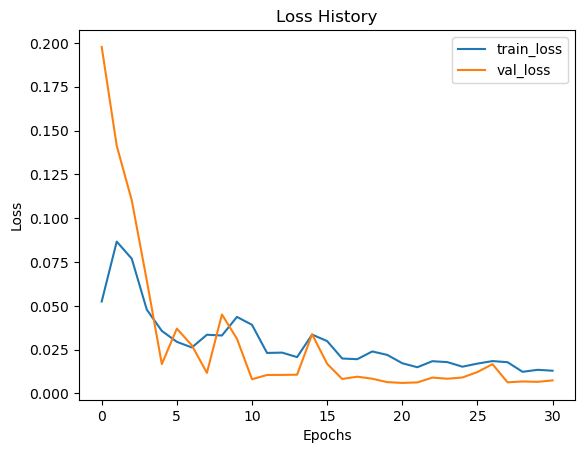

In [42]:
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Loss History')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Loss History.png")
plt.show()

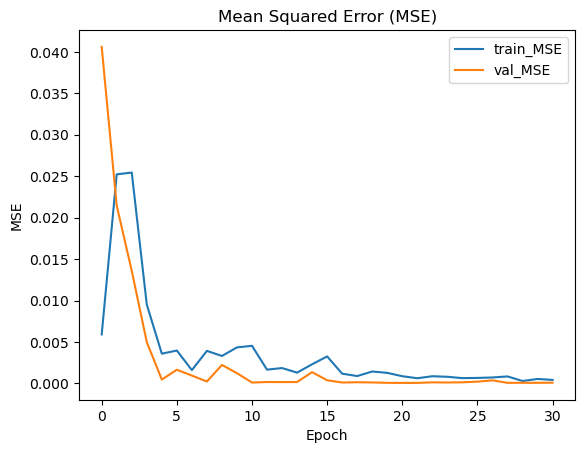

In [43]:
plt.plot(history.history['mean_squared_error'], label='train_MSE')
plt.plot(history.history['val_mean_squared_error'], label='val_MSE')
plt.title('Mean Squared Error (MSE)')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MSE History.png")
plt.show()

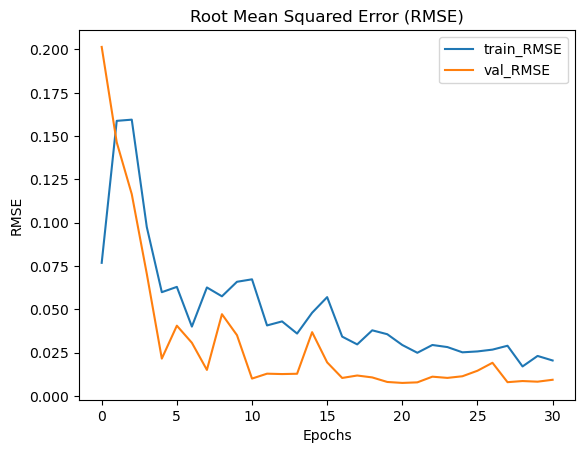

In [44]:
plt.plot(history.history['root_mean_squared_error'], label='train_RMSE')
plt.plot(history.history['val_root_mean_squared_error'], label='val_RMSE')
plt.title('Root Mean Squared Error (RMSE)')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - RMSE History.png")
plt.show()

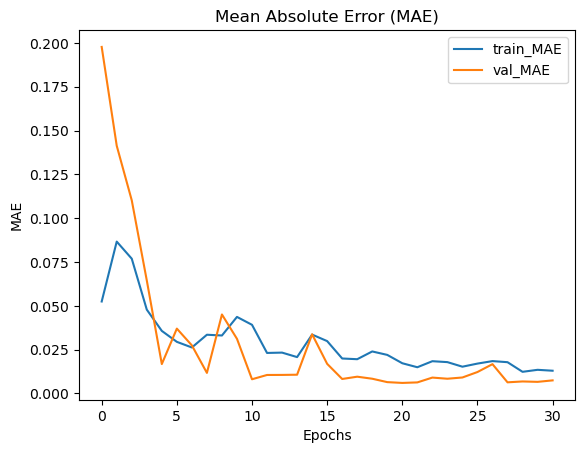

In [45]:
plt.plot(history.history['mean_absolute_error'], label='train_MAE')
plt.plot(history.history['val_mean_absolute_error'], label='val_MAE')
plt.title('Mean Absolute Error (MAE)')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MAE History.png")
plt.show()

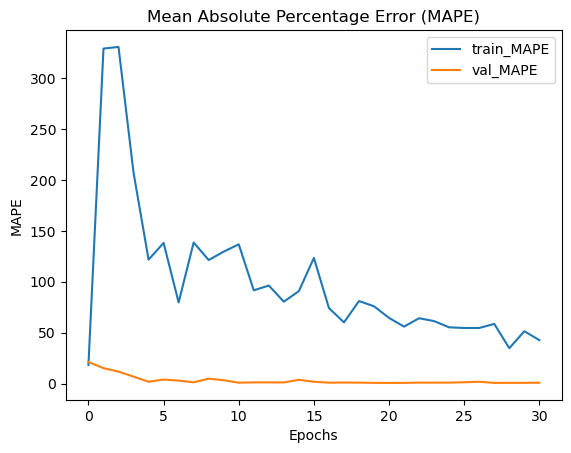

In [46]:
plt.plot(history.history['mean_absolute_percentage_error'], label='train_MAPE')
plt.plot(history.history['val_mean_absolute_percentage_error'], label='val_MAPE')
plt.title('Mean Absolute Percentage Error (MAPE)')
plt.xlabel('Epochs')
plt.ylabel('MAPE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MAPE History.png")
plt.show()

Fazer uma predição

2025-04-14 20:43:26.679971: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Inputs Shape: (7598, 4, 3)
Labels Shape: (7598, 1, 1)
Prediction Shape: (7598, 1, 10)


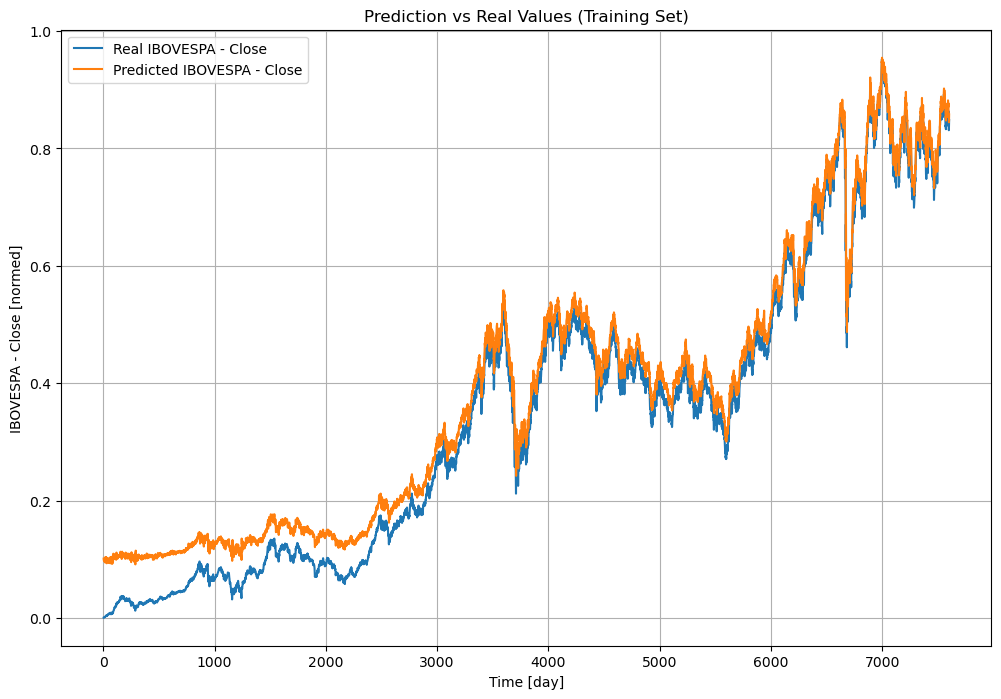

In [47]:
# create inputs and labels
inputs, labels = None, None
for train in iter(multi_window.train):
  if inputs is None:
    inputs = train[0]
    labels = train[1]
  else:
    inputs = np.concatenate((inputs, train[0]), axis=0)
    labels = np.concatenate((labels, train[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# # plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# # plot the labels and predictions
# for i in range(OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)column), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot shifted
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Training Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Training Set).png")
plt.show()

Inputs Shape: (257, 4, 3)
Labels Shape: (257, 1, 1)
Prediction Shape: (257, 1, 10)


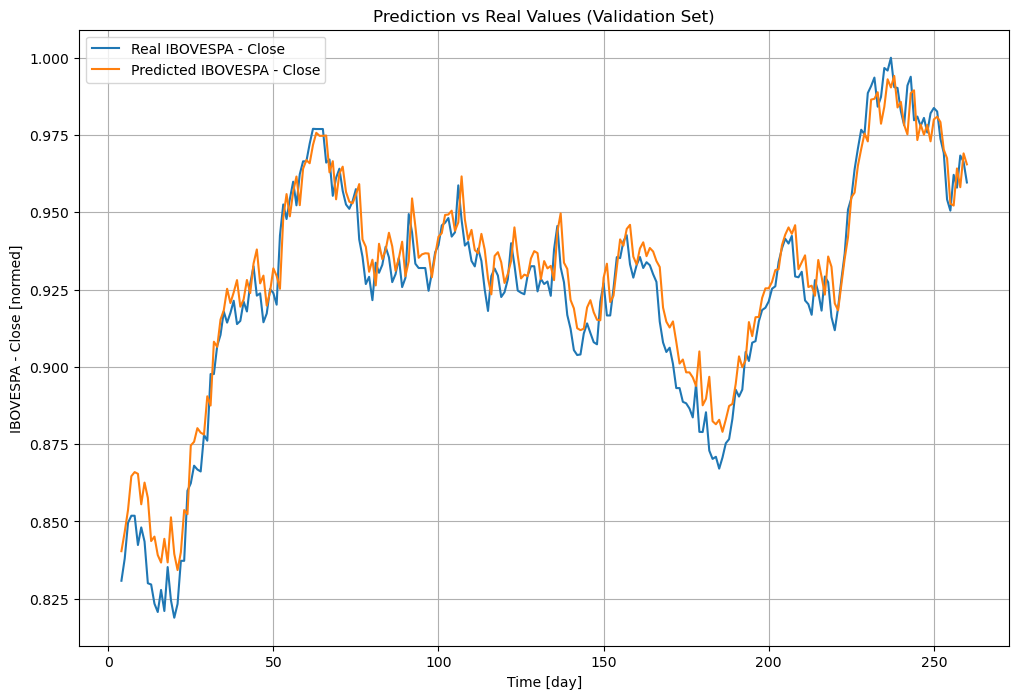

In [48]:
# create inputs and labels
inputs, labels = None, None
for val in iter(multi_window.val):
  if inputs is None:
    inputs = val[0]
    labels = val[1]
  else:
    inputs = np.concatenate((inputs, val[0]), axis=0)
    labels = np.concatenate((labels, val[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# plot the labels and predictions
# for i in range(2):#OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)
#   # add labels, prediction and inputs to the plot shifted
#   if OUTPUT_WINDOW_SIZE == 1:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot, with inputs shifted by the input window size
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Validation Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Validation Set).png")
plt.show()

Inputs Shape: (125, 4, 3)
Labels Shape: (125, 1, 1)
Prediction Shape: (125, 1, 10)


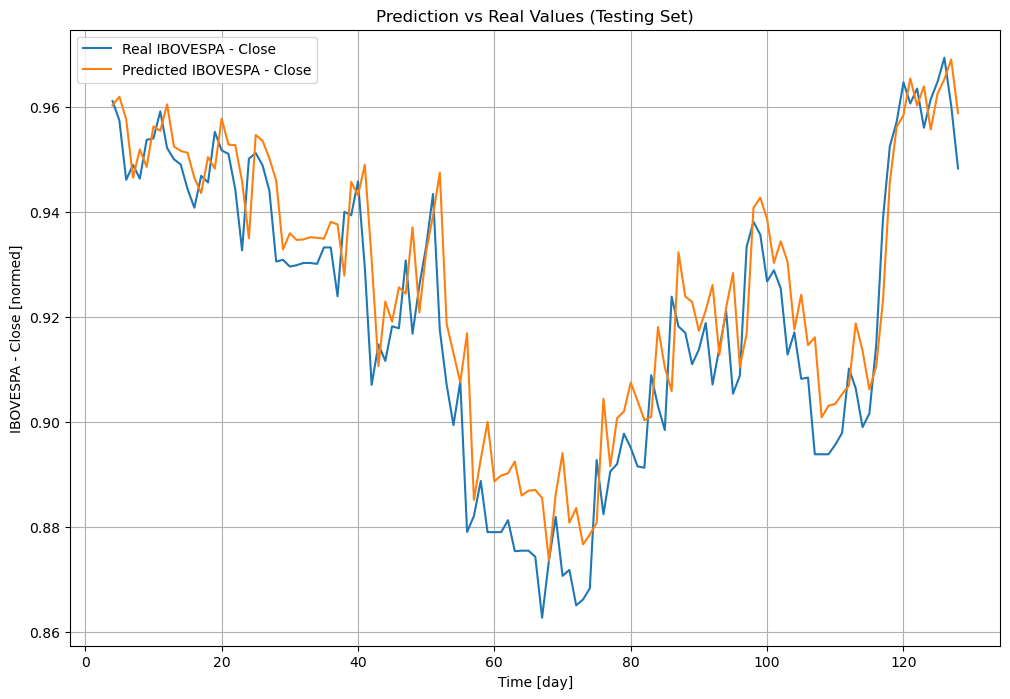

In [49]:
# create inputs and labels
inputs, labels = None, None
for test in iter(multi_window.test):
  if inputs is None:
    inputs = test[0]
    labels = test[1]
  else:
    inputs = np.concatenate((inputs, test[0]), axis=0)
    labels = np.concatenate((labels, test[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# # plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# # plot the labels and predictions
# for i in range(OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)
#   # add labels, prediction and inputs to the plot shifted
#   if OUTPUT_WINDOW_SIZE == 1:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot, with inputs shifted by the input window size
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Testing Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Testing Set).png")
plt.show()

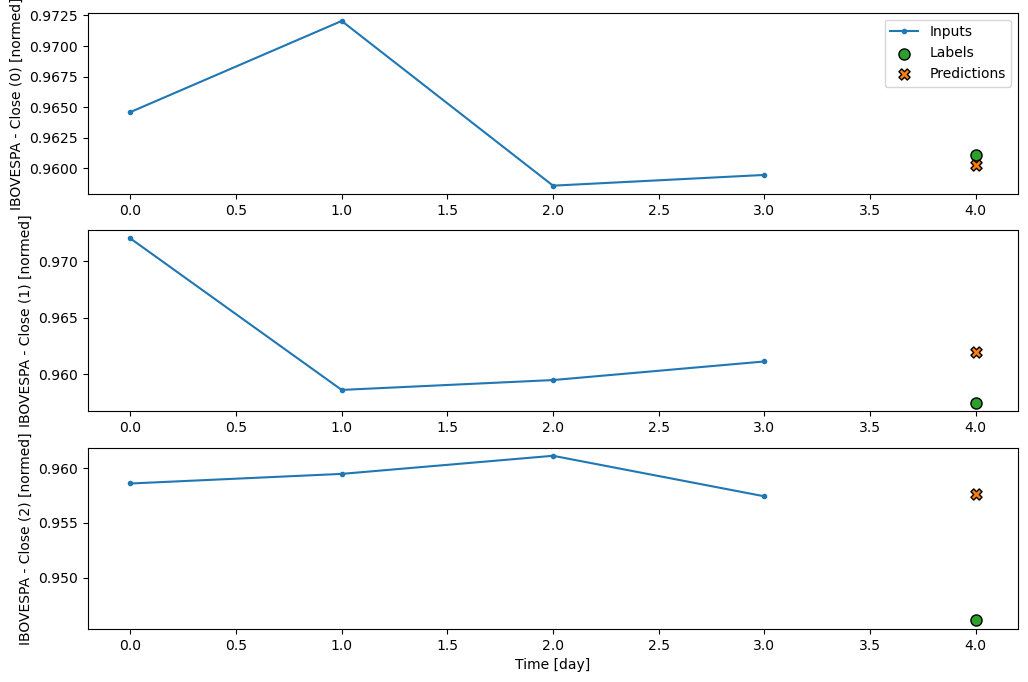

In [50]:
# multi_window.example = next(iter(multi_window.test))
multi_window.plot(model, plot_col=COLUMN_TO_PREDICT)

In [51]:
run_end = time.time()

timeMillisec = (run_end-run_start) * 10**3
# print time in format hh"h":mm"m":ss"s":ms"ms" (like 1h:2m:3s:4ms)
timeStr = str(datetime.timedelta(milliseconds=timeMillisec))
timeStr = timeStr.split(".")[0]
timeStr = timeStr.split(":")
timeStr = f"{int(timeStr[0])}h:{int(timeStr[1])}m:{int(timeStr[2])}s:{int(timeMillisec%1000)}ms"
print(f"Tempo total: {timeStr}")

Tempo total: 0h:1m:24s:991ms


In [52]:
# make a prediction
prediction = model.predict(multi_window.test)
prediction

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 110ms/step


array([[[0.9603142 , 0.9603142 , 0.9603142 , ..., 0.9603142 ,
         0.9603142 , 0.9603142 ]],

       [[0.9619353 , 0.9619353 , 0.9619353 , ..., 0.9619353 ,
         0.9619353 , 0.9619353 ]],

       [[0.9576394 , 0.9576394 , 0.9576394 , ..., 0.9576394 ,
         0.9576394 , 0.9576394 ]],

       ...,

       [[0.9652784 , 0.9652784 , 0.9652784 , ..., 0.9652784 ,
         0.9652784 , 0.9652784 ]],

       [[0.96904385, 0.96904385, 0.96904385, ..., 0.96904385,
         0.96904385, 0.96904385]],

       [[0.9588196 , 0.9588196 , 0.9588196 , ..., 0.9588196 ,
         0.9588196 , 0.9588196 ]]], shape=(125, 1, 10), dtype=float32)

In [53]:
prediction.shape

(125, 1, 10)

Salvar e carregar modelo

In [54]:
# model = ...  # Get model (Sequential, Functional Model, or Model subclass)
# model.save('path/to/location.keras')  # The file needs to end with the .keras extension
# model = keras.models.load_model('path/to/location.keras')